In [387]:
import pandas as pd
import random
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from datetime import datetime
import os
import sys
import numpy as np
import tensorflow as tf
import itertools
import collections
from minisom import MiniSom 
from sklearn import metrics
from nltk.cluster import KMeansClusterer,cosine_distance
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import math

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [899]:
#UK_News2 = pd.read_pickle(r'UK_News_SOM_Bubble_final_bestModel.df')

In [3]:
UK_News = pd.read_pickle(r'UK_News_SOM_Bubble_labels.df')

In [907]:
finalLab_SOM_Kmeans=UK_News2['Topics SOM18_B Kmeans18 Label']

In [908]:
UK_News['finalLab_SOM_Kmeans']=finalLab_SOM_Kmeans

In [3019]:
len(UK_News)

105622

## Frequency of word XXX in all tweets dataset is yy%:

In [1405]:
#Getting all unique words
tfidf_UKNews = TfidfVectorizer(tokenizer=lambda x: x,preprocessor=lambda x: x, min_df=0,max_df=1.0, use_idf=True,smooth_idf=True) 
dtm_UKNews= tfidf_UKNews.fit_transform(UK_News['Tweets_C_tok12'])
all_words=tfidf_UKNews.get_feature_names()

In [1406]:
len(all_words)

4352

In [1407]:
words_list_2=all_words

In [9]:
frequency_all_words=pd.DataFrame(columns =['word', 'present in % of all tweets','present in xx tweets'])
frequency_all_words['word']=words_list_2
for j,jj in zip(list(words_list_2),range(0,len(words_list_2))):
    list_used=[j]
    result_freq_words=[]
    for i in list(UK_News['Tweets_C_tok12']):
        result_freq_words.append((all(item in i for item in list_used)))
    somma=round(sum(result_freq_words)/len(UK_News['Tweets_C_tok12'])*100,2)
    somma2=(sum(result_freq_words))
    #print(j, somma)
    frequency_all_words.iloc[jj,1] =somma
    frequency_all_words.iloc[jj,2] =somma2

In [1408]:
def get_dec_value(x):
    return x/100
def get_log_idf(x):
    return round(math.log(1/x),2) 

In [11]:
frequency_all_words['present in xx of all tweets']=frequency_all_words['present in % of all tweets'].apply(get_dec_value)
frequency_all_words['log inv corpus freq weights']=frequency_all_words['present in xx of all tweets'].apply(get_log_idf)

In [1414]:
frequency_all_words[frequency_all_words['word']=='coronavirus']

word present in % of all tweets present in xx tweets  \
852  coronavirus  15.6                       16478                 

     present in xx of all tweets  log inv corpus freq weights  
852  0.156                        1.86

In [2895]:
frequency_all_words.sort_values(by=['present in % of all tweets'],ascending=False).iloc[0:20]

word present in % of all tweets present in xx tweets  \
852   coronavirus                       15.6                16478   
4031        trump                       8.22                 8681   
4063           uk                        5.1                 5390   
2265     lockdown                       4.98                 5257   
1258     election                       4.87                 5144   
356         biden                       4.41                 4655   
4121          usa                       4.07                 4303   
2809       people                       3.79                 3998   
424         boris                        3.3                 3482   
2077      johnson                       3.25                 3432   
599     celebrity                       3.21                 3389   
1690   government                       3.07                 3242   
2945        pound                       2.95                 3114   
1166       donald                       2.66                 2805   
1309      england                       2.57                 2710   
2074          joe                       2.51                 2650   
4132      vaccine                       2.44                 2576   
4277          win                       2.37                 2502   
2324          man                       2.32                 2451   
1841         home                       2.29                 2424   

      present in xx of all tweets  log inv corpus freq weights  
852                        0.1560                         1.86  
4031                       0.0822                         2.50  
4063                       0.0510                         2.98  
2265                       0.0498                         3.00  
1258                       0.0487                         3.02  
356                        0.0441                         3.12  
4121                       0.0407                         3.20  
2809                       0.0379                         3.27  
424                        0.0330                         3.41  
2077                       0.0325                         3.43  
599                        0.0321                         3.44  
1690                       0.0307                         3.48  
2945                       0.0295                         3.52  
1166                       0.0266                         3.63  
1309                       0.0257                         3.66  
2074                       0.0251                         3.68  
4132                       0.0244                         3.71  
4277                       0.0237                         3.74  
2324                       0.0232                         3.76  
1841                       0.0229                         3.78

# Trained Gensim model -> Embedding

In [372]:
from gensim.models import Word2Vec
# train model
model_gens= Word2Vec(UK_News['Tweets_C_tok12'], min_count=0,size=50,window=8)
print(model_gens)

Word2Vec(vocab=4352, size=50, alpha=0.025)


In [86]:
#Getting top 8 most similar words (along with their similarity cosine score) for some words
top_nr=8
putin=(model_gens.wv.most_similar(positive=['putin'], topn=top_nr))
weather=(model_gens.wv.most_similar(positive=['weather'], topn=top_nr))
company=(model_gens.wv.most_similar(positive=['company'], topn=top_nr))
royal=(model_gens.wv.most_similar(positive=['royal'], topn=top_nr))
sport=(model_gens.wv.most_similar(positive=['sport'], topn=top_nr))
space=(model_gens.wv.most_similar(positive=['space'], topn=top_nr))
war=(model_gens.wv.most_similar(positive=['war'], topn=top_nr))
netflix=(model_gens.wv.most_similar(positive=['netflix'], topn=top_nr))

In [87]:
f = pd.DataFrame(putin, columns=["Putin vs", "CosineSimilarity"])
def round_nr(x):
    return round(x,2)
f['CosineSimilarity']=f['CosineSimilarity'].apply(round_nr)
f

Putin vs  CosineSimilarity
0  vladimir              0.97
1   kremlin              0.91
2      iran              0.88
3   navalny              0.88
4    alexei              0.88
5      nato              0.87
6    russia              0.87
7   russian              0.87

In [373]:
feature_vec_1=model_gens['restriction']
feature_vec_2=model_gens['lockdown']
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]
get_cosine_similarity(feature_vec_1, feature_vec_2)

0.74082255

In [2517]:
model_gens.save("Gensimword2vec.wordvectors")#
model_gens.save("GensimModel.model")

In [ ]:
#From words vectors to tweet vectors by doing the mean of all words vectors for each tweet
def text2vecGens(text):
    return np.mean([model_gens[x] for x in text if x in model_gens.wv.vocab], axis=0).reshape(1,-1)
UK_News['meanWordsGens_tok_12'] = UK_News['Tweets_C_tok12'].apply(text2vecGens)

In [ ]:
# Compare Gensim to Glove on other notebook

In [1001]:
#Get tweets vectors that will be used to fit SOM method next
X_meanWordsGens_tok_12 = np.concatenate(UK_News['meanWordsGens_tok_12'].values)

### Plot tweets vectors -colored according to Best model ->SOM18 + Kmeans on SOM18 nodes vectors
#### The following code for plot were added  (just as personal choice) here after the best clustering model was identified 
##### (The followinf code with several configuration was used to generate plots reported into the Thesis document)

In [1314]:
#Loading and preparing data for plot
UK_News2 = pd.read_pickle(r'UK_News_SOM_Bubble_final_bestModel.df')
final_labels=UK_News2["Topics SOM18_B Kmeans18 Label"]
final_clust=UK_News2["Topics SOM18_B Kmeans18_cos"]
data_vectors=UK_News['meanWordsGens_tok_12'] #

In [1315]:
visualizzaion_df=pd.DataFrame(columns=['vectors','Final Labels','Final clusters'])
visualizzaion_df['vectors']=data_vectors
visualizzaion_df['Final Labels']=final_labels
visualizzaion_df['Final clusters']=final_clust
visualizzaion_df3=visualizzaion_df

In [1322]:
#Tweets were also splitted in 2 gourps, one including Lab1_,Lab1_b,Lab2,Lab3_a,Lab_b,Lab4,Lab5
#and one including the another half of topics in order to have a clearer plots
#First was run the code to plot the first group of topics and then the second group
visualizzaion_df2=visualizzaion_df3.loc[(visualizzaion_df3['Final Labels']=='Label1_a') | 
                                       (visualizzaion_df3['Final Labels']=='Label1_b') | 
                                       (visualizzaion_df3['Final Labels']=='Label2') | 
                                       (visualizzaion_df3['Final Labels']=='Label3_a')|
                                      (visualizzaion_df3['Final Labels']=='Label3_b')|
                                      (visualizzaion_df3['Final Labels']=='Label4')|
                                      (visualizzaion_df3['Final Labels']=='Label5')]

In [1328]:
visualizzaion_df2=visualizzaion_df3.loc[(visualizzaion_df3['Final Labels']=='Label6') | 
                                       (visualizzaion_df3['Final Labels']=='Label7') | 
                                       (visualizzaion_df3['Final Labels']=='Label8') | 
                                       (visualizzaion_df3['Final Labels']=='Label9')|
                                      (visualizzaion_df3['Final Labels']=='Label10')|
                                      (visualizzaion_df3['Final Labels']=='Label11')|
                                      (visualizzaion_df3['Final Labels']=='Label12')]

In [1329]:
Data_vis=np.concatenate(visualizzaion_df2['vectors'].values)
tsne_tweets = TSNE(n_components=2, perplexity=20.0,metric='cosine', n_iter=1000, verbose=1, #perplexity=20
              random_state=11).fit_transform(Data_vis)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 39919 samples in 0.002s...
[t-SNE] Computed neighbors for 39919 samples in 35.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39919
[t-SNE] Computed conditional probabilities for sample 2000 / 39919
[t-SNE] Computed conditional probabilities for sample 3000 / 39919
[t-SNE] Computed conditional probabilities for sample 4000 / 39919
[t-SNE] Computed conditional probabilities for sample 5000 / 39919
[t-SNE] Computed conditional probabilities for sample 6000 / 39919
[t-SNE] Computed conditional probabilities for sample 7000 / 39919
[t-SNE] Computed conditional probabilities for sample 8000 / 39919
[t-SNE] Computed conditional probabilities for sample 9000 / 39919
[t-SNE] Computed conditional probabilities for sample 10000 / 39919
[t-SNE] Computed conditional probabilities for sample 11000 / 39919
[t-SNE] Computed conditional probabilities for sample 12000 / 39919
[t-SNE] Computed conditional probabilities for sa

In [221]:
# pip install plotly==4.14.1

In [1330]:
visualizzaion_df2['tsne-2d-one'] = tsne_tweets[:,0]
visualizzaion_df2['tsne-2d-two'] = tsne_tweets[:,1]
fig = px.scatter(visualizzaion_df2, x="tsne-2d-one", y="tsne-2d-two",
                 color = "Final Labels", size_max=60,color_discrete_map={
               "Label6": "magenta","Label7": '#16FF32',
                "Label8": "#620042","Label9": "#FF6692","Label10": '#FED4C4','Label11': '#990099', "Label12": '#0DF9FF'}) 
fig.update_traces(textposition='top center')
fig.update_layout(height=800)
fig.show()
#Here there is the plot for the second half of topics ->all plots are reported into Thesis pdf file.
#Each dot is a tweet vector into 2 dim and had been colored according to its Model label

# SOM 18x18 on tweets vectors

In [12]:
#pip install minisom

In [403]:
map_dimension=round(math.sqrt(math.sqrt(len(X_meanWordsGens_tok_12 ))))
map_dimension

18

In [1002]:
#The following code was performed to tune SOM 18x18 parameters values(sigma and l.rate)
map_dim=[map_dimension,map_dimension]
max_iter = 10000
#sigma=[0.01,0.1,0.5,0.8,1.5,2]
#learning_rate=[0.005,0.05,0.1,0.5,0.8,1,1.5]
q_error = []
t_error = []
for i in range(0,1):
    som = MiniSom(map_dim[0], map_dim[1], 50, sigma=2, learning_rate=0.5, topology='rectangular',neighborhood_function='bubble',
  activation_distance='cosine',random_seed=11) #topology='rectangular' or'hexagonal'; # 'gaussian', 'mexican_hat', 'bubble', 'triangle'
    som.pca_weights_init(X_meanWordsGens_tok_12 )
    som.train(X_meanWordsGens_tok_12 , max_iter,verbose=False)
    (q_error.append(som.quantization_error(X_meanWordsGens_tok_12)))
    (t_error.append(som.topographic_error(X_meanWordsGens_tok_12)))
# for 18x18 + bubble function -> sigma=2 and lr=0.5 ->lowest error   

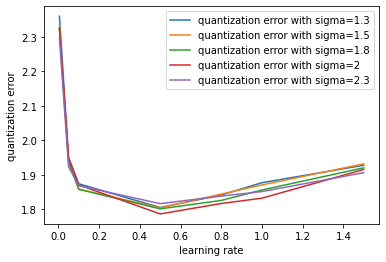

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
learning_rate1=[0.005,0.05,0.1,0.5,0.8,1,1.5]
q_error_sig1=[2.758451796321129, 2.6159526160493134, 2.529177709092031, 2.5457251262627407, 2.561352086469775, 2.56530085306826, 2.641147211920178]
q_error_sig1_5=[2.332775052208355, 1.93889005309826, 1.8585511445656693, 1.8041579929854037, 1.8442018388508588, 1.8707114754548178, 1.9317098795120975]
q_error_sig1_3=[2.359233103561405, 1.9486046365356096, 1.873971661879343, 1.8051879380057623, 1.8414217042034864, 1.8771443953376694, 1.927645079764163]
q_error_sig1_8=[2.325655773134651, 1.9362808529814663, 1.8577950085594137, 1.801311850627799, 1.8257942736937691, 1.8559324100141907, 1.9201933393001562]
q_error_sig2=[2.3235031322366733, 1.948815925221251, 1.8706100139337678, 1.7866540672438915, 1.8167772660307504, 1.8322992050475255, 1.9154531815523428]
q_error_sig2_3=[2.294199192447791, 1.9233605327012901, 1.868262246089957, 1.8164195788119657, 1.8382347303821402, 1.8513628570954506, 1.906116587384333]
#plt.plot( learning_rate1,q_error_sig1, label='quantization error with sigma=1')
plt.plot( learning_rate1,q_error_sig1_3, label='quantization error with sigma=1.3')
plt.plot( learning_rate1,q_error_sig1_5, label='quantization error with sigma=1.5')
plt.plot( learning_rate1,q_error_sig1_8, label='quantization error with sigma=1.8')
plt.plot( learning_rate1,q_error_sig2, label='quantization error with sigma=2')
plt.plot( learning_rate1,q_error_sig2_3, label='quantization error with sigma=2.3')
plt.ylabel('quantization error')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [405]:
# each neuron represents a cluster
som_shape = (map_dim[0], map_dim[1])
winner_coordinates = np.array([som.winner(x) for x in X_meanWordsGens_tok_12]).T
# with np.ravel_multi_index we convert the bidimensional # coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
weights = som.get_weights()

In [2904]:
nodes_som18= list(set(list(cluster_index )))

In [1004]:
(winner_coordinates)

array([[11, 13, 12, ..., 11, 10,  9],
       [17, 14, 12, ...,  0, 17,  8]])

In [2896]:
(weights[0][0]) # -> node 0

array([-0.36510117, -0.36999043, -0.0241214 ,  0.38515275, -0.22831538,
       -0.68915355,  0.67527259,  0.71673735, -0.13337244,  0.36494768,
        0.09521798, -0.12433164, -0.18945739,  0.53028073, -0.17847261,
        0.13179015, -0.02464334,  0.03310016, -0.22566401,  0.52445194,
        0.54597187, -0.15882079, -0.58806664, -0.07208303,  0.38598414,
       -0.57284444, -0.1385742 , -0.06217238,  0.03796197,  0.06378741,
       -0.0314027 ,  0.1340671 , -0.46437705,  0.00615743, -0.28489043,
       -0.21319431,  0.28906091, -0.21505102,  0.2636328 ,  0.78371388,
       -0.37017273, -0.50175693, -0.19438109, -0.13167621,  0.08677646,
       -0.17999229,  0.24191109, -0.13712539,  0.05456214,  0.08232869])

In [1007]:
nodes_vectors[0]

array([-0.36510117, -0.36999043, -0.0241214 ,  0.38515275, -0.22831538,
       -0.68915355,  0.67527259,  0.71673735, -0.13337244,  0.36494768,
        0.09521798, -0.12433164, -0.18945739,  0.53028073, -0.17847261,
        0.13179015, -0.02464334,  0.03310016, -0.22566401,  0.52445194,
        0.54597187, -0.15882079, -0.58806664, -0.07208303,  0.38598414,
       -0.57284444, -0.1385742 , -0.06217238,  0.03796197,  0.06378741,
       -0.0314027 ,  0.1340671 , -0.46437705,  0.00615743, -0.28489043,
       -0.21319431,  0.28906091, -0.21505102,  0.2636328 ,  0.78371388,
       -0.37017273, -0.50175693, -0.19438109, -0.13167621,  0.08677646,
       -0.17999229,  0.24191109, -0.13712539,  0.05456214,  0.08232869])

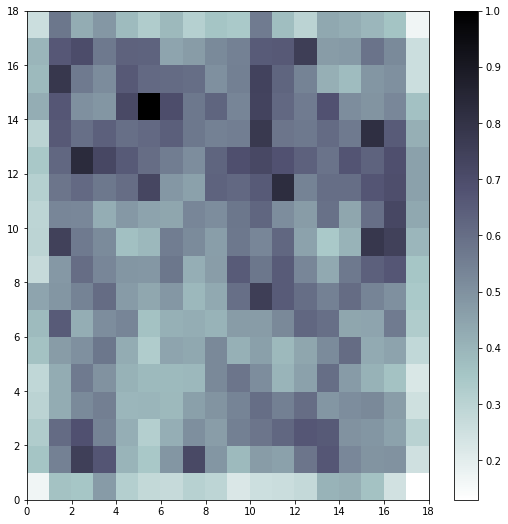

In [1010]:
#To visualize the result of the training we can plot 
#the distance map (U-Matrix) using a pseudocolor 
#where the neurons of the maps are displayed as an array of cells and 
#the color represents the (weights) distance from the neighbour neurons. 
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.show()

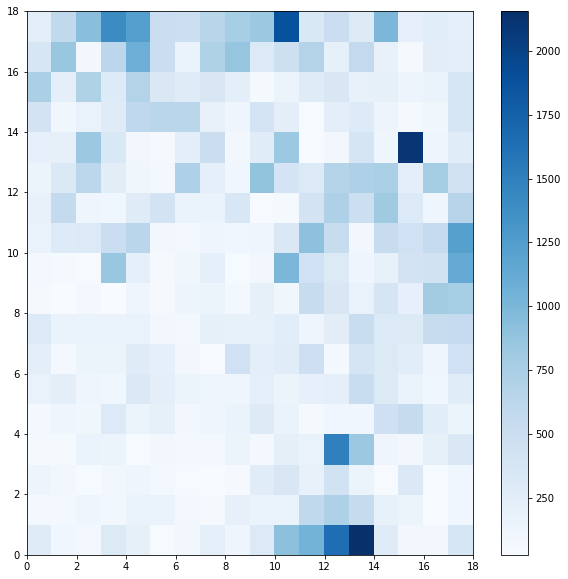

In [2897]:
#To have an idea of which neurons of the map are activated more often we can create 
#another pseudocolor plot that reflects the activation frequencies:
plt.figure(figsize=(10, 10))
frequencies = som.activation_response(X_meanWordsGens_tok_12)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [1003]:
(cluster_index)

array([215, 248, 228, ..., 198, 197, 170])

In [115]:
#Labeling tweets with SOM18x18 clusters labels
UK_News['Topics SOM18 Bubble']=cluster_index

In [407]:
UK_News['Topics SOM18 Bubble']

0         215
1         248
2         228
3         37 
4         264
         ... 
120042    234
120043    71 
120044    198
120045    197
120046    170
Name: Topics SOM18 Bubble, Length: 105622, dtype: int64

In [2902]:
UK_News['Topics SOM18 Bubble'].value_counts()

234    2155
283    2112
197    1883
216    1647
219    1500
       ... 
45       36
62       34
128      33
26       29
289      27
Name: Topics SOM18 Bubble, Length: 324, dtype: int64

In [408]:
#getting SOM18x18 winner nodes vectors used for fit another clustering methods
df_weights= pd.DataFrame(columns=[ 'weights vectors'])
weights_data=[]
for i,j in zip(winner_coordinates[0],winner_coordinates[1]):
    weights_data.append(weights[i][j])
df_weights['weights vectors']=list(weights_data)
X_som18_w =pd.Series.to_numpy(df_weights['weights vectors'])


# SOM18 + SOM on the 30 most frequent SOM18 words

In [2935]:
#Getting the 30 most frequent words for each SOM18 cluster+
nr_words=30
df_freq_topics_words_som18= pd.DataFrame(columns=[ 'Cluster','Freq words'])
www_1=[]
for i in topics_som18:
    words_in_tweet=list(UK_News[UK_News['Topics SOM18 Bubble']==i]['Tweets_C_tok12']) 
    all_words = list(itertools.chain(*words_in_tweet))
    # Create counter
    counts = collections.Counter(all_words)
    ww_5=counts.most_common(nr_words)
    www_2=[j[0] for j in ww_5]
    www_1.append(www_2)
df_freq_topics_words_som18['Freq words']=www_1
topics_som18= list(set(list(UK_News['Topics SOM18 Bubble'])))
df_freq_topics_words_som18['Cluster']=topics_som18 
#getting nodes vectors 
nodes_vectors=[]
for i in range(0,18):
    for j in range(0,18):
        nodes_vectors.append(weights[i][j]) 
df_freq_topics_words_som18['Node vectors']=nodes_vectors
som_clus=[]
final_model_lab=[]
for i in range(0,324):
    a1=UK_News[UK_News['Topics SOM18 Bubble']==i]['finalLab_SOM_Kmeans'].value_counts()
    b1=a1.index[0]
    final_model_lab.append(b1)
    som_clus.append(i)
df_freq_topics_words_som18['ModelG label']=final_model_lab

In [2936]:
df_freq_topics_words_som18.insert(1, "SOM18 Cluster Label", " ")

In [ ]:
# Topics labels description  (for some of SOM 18x18 clusters, from cluster to topic labels)
# Topic 0: covid-health 
# Topic 1: covid-lockdown
# Topic 2: Election, USA Government and politics 
# Topic 3: crimes, bad news
# Topic 4: Celebrities, entertainment, culture  
# Topic 5: royals 
# Topic 6: sport 
# Topic 7: brexit
# Topic 8: life&people&sotries-mixed
# Topic 9: economy-busines-financial-money-company-money -tech-market-
# Topic 11: sciece 
# Topic 10: politics 
# Topic 12: international affairs,conflicts, deals, politics
# Topic 13: Weather, environment conditions/events 

In [2937]:
#Human labeling some SOM18x18 clsuters by examing their more relevant words
labels_som18_0=[53,71,283,197,89,88,193,161,160,174,142,264]
labels_som18_1=[52,69,70,87,122,104,106,107,86,32]
labels_som18_2=[189,227,228,263,246,208,206,262,226]
labels_som18_3=[234,216,180,199,235,241,29,198,28]
labels_som18_5=[59,60,61,58,40,41,42,43,21,22,23,1,2,3,4,5,6,25,20,19,8,44,24,26,39,27]
labels_som18_4=[72,36,37,38,54,55,57]
labels_som18_6=[62,63,64,65,45,46,47,82]
labels_som18_7=[33,287,301.302,303,304,305,319,320,321,322,323]
labels_som18_8=[9,10,11,12]
labels_som18_10=[66,67,48,49,30,16,15,17,18,35,34,68,31,8]
labels_som18_9=[315,316,300,295,296,314,313,317,139,298,179]
labels_som18_11=[274,239]
labels_som18_12=[14,269,214,250,233]
labels_som18_13=[217]

for i in labels_som18_0:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =0
for i in labels_som18_1:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =1
for i in labels_som18_2:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =2

for i in labels_som18_3:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =3
for i in labels_som18_5:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =5
for i in labels_som18_4:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =4
for i in labels_som18_6:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =6
for i in labels_som18_7:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =7
for i in labels_som18_8:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =8

for i in labels_som18_10:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =10
for i in labels_som18_9:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =9
for i in labels_som18_11:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =11
for i in labels_som18_12:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =12
for i in labels_som18_13:
    df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Cluster'] == i, ['SOM18 Cluster Label']] =13


In [2939]:
df_freq_topics_words_som18['SOM18 Cluster Label'].value_counts()

      197
5     25 
10    14 
0     12 
9     11 
7     10 
1     10 
3     9  
2     9  
6     8  
4     7  
12    5  
8     4  
11    2  
13    1  
Name: SOM18 Cluster Label, dtype: int64

### Getting using Gensim model the 30 top Word Vectors mean

In [2940]:
def text2vecGens2(text):
    return np.mean([model_gens[x] for x in text if x in model_gens.wv.vocab], axis=0).reshape(1,-1)
df_freq_topics_words_som18['meanWordsGens'] = df_freq_topics_words_som18['Freq words'].apply(text2vecGens2)
X_meanWordsGens_SOM18 = np.concatenate(df_freq_topics_words_som18['meanWordsGens'].values)

### Computing CountCluster/CountAllTweets % for each word

In [2941]:
result3=[]
for i,zz in zip(df_freq_topics_words_som18['Freq words'],df_freq_topics_words_som18['Cluster']):
    result2=[]
    for j in i:
        list_word=[j]
        
        result=[]
        for g in list(UK_News[UK_News['Topics SOM18 Bubble']==zz]['Tweets_C_tok12']):
            result.append((all(item in g for item in list_word)))
        result2.append(round((sum(result)/list(frequency_all_words[frequency_all_words['word']==list_word[0]].iloc[:,2])[0])*100,2))
        #df_freq_topics_words_som18.loc[df_freq_topics_words_som18['Topic']==(zz),['CountCluster/CountAllTweets %']]=[aa for aa in result2]
    result3.append(result2)

In [2942]:
for i in result3:
    df_freq_topics_words_som18['CountCluster/CountAllTweets %']=[x for x in result3]   

### Getting (using Gensim model and CountCluster/CountAllTweets %) the 30 top Words Vectors Weighted mean

In [2943]:
result0=[]
for i in range(0,len(df_freq_topics_words_som18)):
    result1=[]
    for w,j in zip(df_freq_topics_words_som18['Freq words'].iloc[i],df_freq_topics_words_som18['CountCluster/CountAllTweets %'].iloc[i]):
        result1.append(((model_gens[w]*j/100)))
    result0.append(result1)
results_final=[]
for j in range(0,len(df_freq_topics_words_som18)):
    results_final.append(np.sum([result0[j][i] for i in range(0,nr_words)], axis=0).reshape(1,-1))
sum_Weights=[]
for i in range(0,len(df_freq_topics_words_som18)):
    sum_Weights.append(sum(df_freq_topics_words_som18['CountCluster/CountAllTweets %'].iloc[i])/100)
results_final2=[]
for i in range(0,len(df_freq_topics_words_som18)):
    results_final2.append(results_final[i]/sum_Weights[i])
for i in results_final2:
    df_freq_topics_words_som18['meanWordsGens_Weighted']=[x for x in results_final2]

In [2944]:
X_meanWordsGens_SOM18_Weighted = np.concatenate(df_freq_topics_words_som18['meanWordsGens_Weighted'].values)

In [2907]:
X_meanWordsGens_SOM18_Weighted.shape

(324, 50)

In [1265]:
X_nodesV_SOM18 = (list(df_freq_topics_words_som18['Node vectors'])) #np.concatenate

In [1266]:
(X_nodesV_SOM18)

[array([-0.36510117, -0.36999043, -0.0241214 ,  0.38515275, -0.22831538,
        -0.68915355,  0.67527259,  0.71673735, -0.13337244,  0.36494768,
         0.09521798, -0.12433164, -0.18945739,  0.53028073, -0.17847261,
         0.13179015, -0.02464334,  0.03310016, -0.22566401,  0.52445194,
         0.54597187, -0.15882079, -0.58806664, -0.07208303,  0.38598414,
        -0.57284444, -0.1385742 , -0.06217238,  0.03796197,  0.06378741,
        -0.0314027 ,  0.1340671 , -0.46437705,  0.00615743, -0.28489043,
        -0.21319431,  0.28906091, -0.21505102,  0.2636328 ,  0.78371388,
        -0.37017273, -0.50175693, -0.19438109, -0.13167621,  0.08677646,
        -0.17999229,  0.24191109, -0.13712539,  0.05456214,  0.08232869]),
 array([-4.90098263e-02,  2.09400033e-01, -6.96020790e-02,  6.78473040e-01,
        -1.91834965e-01, -6.77615373e-01,  8.39823626e-01,  6.09945189e-01,
         1.36916874e-02,  6.02244268e-01,  4.99460136e-01, -2.09749901e-02,
        -2.37921970e-01,  5.49115190e-01

In [2946]:
pd.reset_option("^display")

In [2947]:
df_freq_topics_words_som18

Cluster SOM18 Cluster Label  \
0          0                       
1          1                   5   
2          2                   5   
3          3                   5   
4          4                   5   
..       ...                 ...   
319      319                   7   
320      320                   7   
321      321                   7   
322      322                   7   
323      323                   7   

                                            Freq words  \
0    [join, listen, editor, story, crown, coronavir...   
1    [pound, royal, queen, prince, kate, middleton,...   
2    [coronavirus, prince, queen, william, mask, we...   
3    [christmas, queen, prince, harry, royal, phili...   
4    [royal, prince, family, harry, queen, charles,...   
..                                                 ...   
319  [brexit, pound, deal, uk, european, bn, union,...   
320  [brexit, deal, trade, european, union, uk, bri...   
321  [brexit, uk, deal, warn, trade, european, unio...   
322  [european, union, brexit, uk, deal, france, fi...   
323  [european, union, brexit, uk, trade, britain, ...   

                                          Node vectors ModelG label  \
0    [-0.36510117190516633, -0.36999042667643617, -...       Label5   
1    [-0.04900982628673543, 0.20940003297825951, -0...       Label5   
2    [-0.2765499128353584, 0.09664538163891583, 0.0...       Label5   
3    [-0.35502755556998844, -0.43279586343629894, 0...       Label5   
4    [-0.5881960736623966, -0.28400290807355566, 0....       Label5   
..                                                 ...          ...   
319  [0.24883715238606702, -0.15567811456754124, -0...       Label7   
320  [-0.033415629135185414, -1.2371641713630006, -...       Label7   
321  [-0.035801458689729185, -0.6133474301559668, 0...       Label7   
322  [0.03901018177245421, -0.5498091201313254, 0.2...       Label7   
323  [-0.09047010693523011, -0.718450032365394, 0.3...       Label7   

                                         meanWordsGens  \
0    [[0.33929822, 0.2611368, 0.36631536, 0.0636028...   
1    [[0.46045256, -0.7515964, 0.16643494, -0.17686...   
2    [[0.3334804, -0.31068605, 0.54979604, -0.57699...   
3    [[0.71086, -0.45748538, 0.37900904, -0.4063124...   
4    [[0.51274836, -0.21603297, 0.4283413, -0.33769...   
..                                                 ...   
319  [[-0.76090217, -0.45150363, -0.42285326, 0.380...   
320  [[-0.7356398, 0.34299687, -0.23806258, 0.12666...   
321  [[-0.61579514, 0.3296762, 0.011316073, 0.17931...   
322  [[-0.7926441, 0.35502434, 0.17600413, -0.05448...   
323  [[-0.67508906, 0.4210094, 0.096281804, 0.14084...   

                         CountCluster/CountAllTweets %  \
0    [3.63, 6.62, 11.41, 2.53, 4.67, 0.14, 4.82, 6....   
1    [0.93, 2.64, 2.05, 0.92, 1.89, 4.42, 0.45, 1.1...   
2    [0.64, 3.83, 4.45, 6.35, 4.58, 4.42, 2.07, 1.9...   
3    [2.22, 5.02, 1.99, 2.43, 1.89, 6.43, 2.6, 2.18...   
4    [6.79, 4.51, 2.69, 3.31, 1.71, 2.58, 1.79, 1.2...   
..                                                 ...   
319  [4.87, 2.22, 3.16, 0.87, 2.98, 5.71, 2.78, 0.8...   
320  [16.91, 14.7, 24.74, 10.5, 10.41, 1.89, 3.26, ...   
321  [13.22, 2.95, 6.43, 4.31, 10.49, 4.99, 5.09, 2...   
322  [10.95, 9.56, 4.12, 1.17, 2.21, 5.4, 14.0, 3.2...   
323  [16.9, 17.12, 7.12, 0.91, 3.37, 1.6, 1.21, 10....   

                                meanWordsGens_Weighted  
0    [[0.44395626, 0.13342345, 0.21291949, 0.076118...  
1    [[0.7016492, -0.57586354, 0.25772718, -0.33287...  
2    [[0.63160825, -0.20954801, 0.63790655, -0.6844...  
3    [[0.6467537, -0.37788016, 0.25216702, -0.46424...  
4    [[0.77816105, -0.19910935, 0.5072384, -0.33080...  
..                                                 ...  
319  [[-0.8330679, -0.48936298, -0.739524, 0.380131...  
320  [[-0.63295025, 0.49452478, -0.3607364, 0.23561...  
321  [[-0.722137, 0.5817277, -0.33478308, 0.3187236...  
322  [[-0.70658684, 0.29891455, 0.15762849, 0.17108...  
3

In [2951]:
#Getting some SOM18x18 clusters top words and relative frequency clustered by the model model
#with Label7 about brexit and eu issues ->for inspecting prupose
df_brexit=df_freq_topics_words_som18[(df_freq_topics_words_som18['Cluster']==323)|(df_freq_topics_words_som18['Cluster']==322)|(df_freq_topics_words_som18['Cluster']==305)|(df_freq_topics_words_som18['Cluster']==320)|(df_freq_topics_words_som18['Cluster']==321)|(df_freq_topics_words_som18['Cluster']==319)|(df_freq_topics_words_som18['Cluster']==304)|(df_freq_topics_words_som18['Cluster']==303)]#.iloc[:,0:3]
pd.set_option("display.max_colwidth", -1)
df_brexit[['Cluster','Freq words','CountCluster/CountAllTweets %']]

Cluster  \
303  303       
304  304       
305  305       
319  319       
320  320       
321  321       
322  322       
323  323       

                                                                                                                                                                                                                                                Freq words  \
303  [deal, brexit, uk, european, union, trade, agree, percentage, agreement, reach, eu, market, friday, deadline, end, ft, offer, brussels, strike, barni, sign, london, bill, line, secure, usa, hope, michel, key, major]                                 
304  [union, european, law, state, leader, government, usa, country, uk, rule, brexit, bill, break, sanction, legal, member, right, trade, brussels, action, foreign, agreement, threaten, belarus, hungary, poland, report, vote, britain, aid]             
305  [european, union, brexit, boris, johnson, deal, trade, uk, deadline, walk, plan, demand, bill, warn, fishing, pm, britain, brussels, legal, away, agreement, negotiation, post, leader, action, agree, politics, vote, politic, government]             
319  [brexit, pound, deal, uk, european, bn, union, government, britain, boris, johnson, trade, euro, billion, warn, cut, green, bank, business, company, budget, post, plan, job, fund, pay, food, coronavirus, bill, industry]                             
320  [brexit, deal, trade, european, union, uk, britain, post, eu, agreement, michel, negotiator, brussels, barnier, fishing, chief, negotiation, ireland, barni, johnson, reach, deadline, warn, canada, frost, strike, boris, demand, secure, major]       
321  [brexit, uk, deal, warn, trade, european, union, minister, britain, coronavirus, ireland, government, johnson, boris, end, eu, plan, post, northern, risk, prime, transition, agreement, crisis, foreign, country, economic, fear, business, fishing]   
322  [european, union, brexit, uk, deal, france, fishing, trade, british, britain, migrant, water, plan, warn, ban, country, hit, channel, french, ireland, border, macron, fish, demand, lorry, row, agreement, rule, germany, end]                         
323  [european, union, brexit, uk, trade, britain, deal, fishing, brussels, action, demand, legal, bloc, mep, admit, leader, michel, crisis, macron, break, treaty, barnier, hungary, end, state, right, law, warn, government, policy]                      

                                                                                                                                                                       CountCluster/CountAllTweets %  
303  [5.95, 4.01, 1.28, 4.77, 4.55, 5.96, 4.2, 0.96, 5.58, 2.71, 6.67, 1.67, 1.32, 6.16, 0.59, 1.14, 0.93, 5.3, 2.08, 13.73, 1.05, 0.57, 0.98, 1.35, 2.33, 0.14, 0.69, 7.23, 0.9, 1.06]               
304  [12.64, 11.47, 4.29, 1.69, 1.91, 0.59, 0.44, 1.03, 0.33, 0.83, 0.91, 3.34, 0.63, 13.89, 2.8, 2.97, 1.15, 1.81, 8.61, 2.81, 2.65, 5.18, 2.63, 9.16, 22.92, 7.53, 0.65, 0.63, 0.7, 3.69]           
305  [15.71, 15.81, 10.49, 5.51, 4.31, 6.85, 8.55, 0.85, 17.81, 5.62, 1.03, 2.8, 3.93, 0.86, 9.0, 1.15, 1.02, 10.6, 2.99, 2.31, 5.58, 10.24, 1.62, 1.08, 2.59, 3.08, 1.6, 0.57, 0.68, 0.31]           
319  [4.87, 2.22, 3.16, 0.87, 2.98, 5.71, 2.78, 0.86, 1.79, 0.75, 0.76, 2.98, 8.63, 5.42, 0.73, 1.85, 3.5, 2.12, 1.25, 1.99, 5.53, 1.5, 0.57, 1.08, 3.23, 0.91, 1.54, 0.07, 2.16, 2.49]               
320  [16.91, 14.7, 24.74, 10.5, 10.41, 1.89, 3.26, 4.39, 17.95, 12.35, 33.73, 35.53, 16.56, 37.1, 11.0, 1.92, 15.75, 4.06, 37.25, 0.55, 3.49, 11.64, 0.77, 17.0, 20.83, 3.91, 0.4, 1.96, 5.04, 2.29]  
321  [13.22, 2.95, 6.43, 4.31, 10.49, 4.99, 5.09, 2.49, 3.0, 0.27, 7.91, 1.11, 0.99, 0.95, 2.08, 14.87, 1.39, 3.01, 4.9, 1.99, 2.32, 8.19, 6.77, 1.87, 3.47, 0.92, 2.84, 1.37, 1.34, 7.5]             
322  [10.95, 9.56, 4.12, 1.17, 2.21, 5.4, 14.0, 3.24, 2.12, 1.4, 6.23, 4.74, 0.93, 0.82, 1.61, 0.98, 0.92, 4.38, 2.7, 2.35, 4.36, 3.49, 9.4, 1.4, 10.31, 1.63, 3.59, 0.42, 2.46, 0.5

In [1040]:
#Inspecting some SOM18x18 clusters
len(UK_News[(UK_News['Topics SOM18 Bubble']==323)|
            (UK_News['Topics SOM18 Bubble']==322)|
            (UK_News['Topics SOM18 Bubble']==304)|
            (UK_News['Topics SOM18 Bubble']==305)|
            (UK_News['Topics SOM18 Bubble']==319)|
            (UK_News['Topics SOM18 Bubble']==321)|
            (UK_News['Topics SOM18 Bubble']==320)|
           (UK_News['Topics SOM18 Bubble']==303)])/len(UK_News[UK_News['finalLab_SOM_Kmeans']=='Label7'])

0.7318136104592692

In [2953]:
pd.reset_option("^display")
df_freq_topics_words_som18[['Cluster','Freq words','CountCluster/CountAllTweets %']]

Cluster                                         Freq words  \
0          0  [join, listen, editor, story, crown, coronavir...   
1          1  [pound, royal, queen, prince, kate, middleton,...   
2          2  [coronavirus, prince, queen, william, mask, we...   
3          3  [christmas, queen, prince, harry, royal, phili...   
4          4  [royal, prince, family, harry, queen, charles,...   
..       ...                                                ...   
319      319  [brexit, pound, deal, uk, european, bn, union,...   
320      320  [brexit, deal, trade, european, union, uk, bri...   
321      321  [brexit, uk, deal, warn, trade, european, unio...   
322      322  [european, union, brexit, uk, deal, france, fi...   
323      323  [european, union, brexit, uk, trade, britain, ...   

                         CountCluster/CountAllTweets %  
0    [3.63, 6.62, 11.41, 2.53, 4.67, 0.14, 4.82, 6....  
1    [0.93, 2.64, 2.05, 0.92, 1.89, 4.42, 0.45, 1.1...  
2    [0.64, 3.83, 4.45, 6.35, 4.58, 4.42, 2.07, 1.9...  
3    [2.22, 5.02, 1.99, 2.43, 1.89, 6.43, 2.6, 2.18...  
4    [6.79, 4.51, 2.69, 3.31, 1.71, 2.58, 1.79, 1.2...  
..                                                 ...  
319  [4.87, 2.22, 3.16, 0.87, 2.98, 5.71, 2.78, 0.8...  
320  [16.91, 14.7, 24.74, 10.5, 10.41, 1.89, 3.26, ...  
321  [13.22, 2.95, 6.43, 4.31, 10.49, 4.99, 5.09, 2...  
322  [10.95, 9.56, 4.12, 1.17, 2.21, 5.4, 14.0, 3.2...  
323  [16.9, 17.12, 7.12, 0.91, 3.37, 1.6, 1.21, 10....  

[324 rows x 3 columns]

In [ ]:
df_freq_topics_words_som18[['Cluster','Freq words','CountCluster/CountAllTweets %']]

In [2533]:
#df_freq_topics_words_som18.to_pickle('df_freq_topics_words_som18.df')

### SOM on the 30 top relevant SOM18x18 words vectors mean

In [2908]:
# the following code was used to perform the several SOM models with several param values on the SOM18x18 30 top 
#words vectors for the 2 cases in one case using the simple average words vectors in the second case the weighted
#average 

In [136]:
#X_meanWordsGens_SOM18 ->for the simple words vectors mean, X_meanWordsGens_SOM18_Weighted -> for weighted mean
map_dim2=[6,3]
max_iter2 = 10000
#sigma=[]
learning_rate2=[0.005,0.05,0.1,0.5,0.8,1,1.5]
q_error2 = []
t_error2 = []
for i in range(0,1):
    som2 = MiniSom(map_dim2[0], map_dim2[1], 50, sigma=2, learning_rate=0.05, topology='rectangular',neighborhood_function='bubble',
  activation_distance='cosine',random_seed=11) #topology='rectangular' or'hexagonal'; # 'gaussian', 'mexican_hat', 'bubble', 'triangle'
    som2.pca_weights_init(X_meanWordsGens_SOM18 )
    som2.train(X_meanWordsGens_SOM18 , max_iter2,verbose=False)
    (q_error2.append(som2.quantization_error(X_meanWordsGens_SOM18)))
    (t_error2.append(som2.topographic_error(X_meanWordsGens_SOM18)))
# for 4X4 + bubble function -> sigma=2 and lr=0.05 
# for 4X5 + bubble function -> sigma=2 and lr=0.05
# for 6X3 + bubble function -> sigma=2 and lr=0.05
# for 4X4 + bubble function -> sigma=1.5 and lr=0.05 with Weighted input words
# for 6X3 + bubble function -> sigma=1.5 and lr=0.1 with Weighted input words

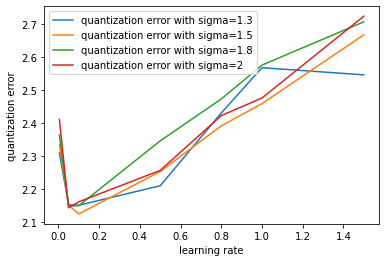

In [79]:
# Plot of: data->X_meanWordsGens_SOM18_Weighted, dim->6x3
import matplotlib.pyplot as plt
%matplotlib inline
learning_rate12=[0.005,0.05,0.1,0.5,0.8,1,1.5]
q_error_sig1_3=[2.3090010975437787, 2.151762717958505, 2.1501512054890863, 2.2093607986905015, 2.4307574354010635, 2.5684613405835073, 2.546728734620643]
q_error_sig1_5=[2.3351715966310187, 2.1498360559835468, 2.1237496543201613, 2.252835677217693, 2.3915941537966847, 2.459234511502112, 2.668419553465674]
q_error_sig1_8=[2.3642045057059136, 2.147546950106696, 2.1487062296942545, 2.345837266302816, 2.4733241167628606, 2.576393700446301, 2.7078741371601702]
q_error_sig2=[2.411281771989069, 2.142712797507291, 2.160395993267348, 2.2561383829676975, 2.4228129576565536, 2.4762633891422823, 2.7249405841854113]
plt.plot( learning_rate12,q_error_sig1_3, label='quantization error with sigma=1.3')
plt.plot( learning_rate12,q_error_sig1_5, label='quantization error with sigma=1.5')
plt.plot( learning_rate12,q_error_sig1_8, label='quantization error with sigma=1.8')
plt.plot( learning_rate12,q_error_sig2, label='quantization error with sigma=2')
plt.ylabel('quantization error')
plt.xlabel('learning rate')
plt.legend()
plt.show()

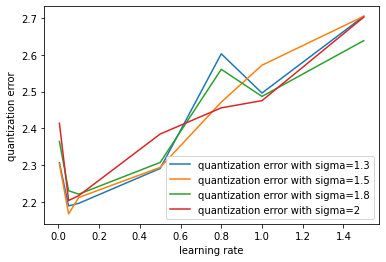

In [70]:
# Plot of: data->X_meanWordsGens_SOM18_Weighted, dim->4x4
%matplotlib inline
learning_rate12=[0.005,0.05,0.1,0.5,0.8,1,1.5]
q_error_sig1_3=[2.305961825199727, 2.1887618677525147, 2.195732082754641, 2.2906107600925414, 2.6027963517194594, 2.49591183329511, 2.7050242808948246]
q_error_sig1_5=[2.3030772936724953, 2.166847688423541, 2.2116667189055135, 2.2934249976152605, 2.4711888924668775, 2.571717185676437, 2.7050242808948246]
q_error_sig1_8=[2.3641038356434723, 2.2299280356986784, 2.2206363329311842, 2.3069854342304192, 2.5605369416890142, 2.486731980386708, 2.6386561066639604]
q_error_sig2=[2.4136336976659774, 2.2032544407206784, 2.2166002618724554, 2.3844331344358523, 2.4555947036396137, 2.4752842266215307, 2.7026344000191718]
plt.plot( learning_rate12,q_error_sig1_3, label='quantization error with sigma=1.3')
plt.plot( learning_rate12,q_error_sig1_5, label='quantization error with sigma=1.5')
plt.plot( learning_rate12,q_error_sig1_8, label='quantization error with sigma=1.8')
plt.plot( learning_rate12,q_error_sig2, label='quantization error with sigma=2')
plt.ylabel('quantization error')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [138]:
# each neuron represents a cluster
som_shape2 = (map_dim2[0], map_dim2[1])
winner_coordinates2 = np.array([som2.winner(x) for x in X_meanWordsGens_SOM18]).T
# with np.ravel_multi_index we convert the bidimensional # coordinates to a monodimensional index
cluster_index2 = np.ravel_multi_index(winner_coordinates2, som_shape2)
weights2 = som2.get_weights()

In [104]:
#silhouette on the 30 top words (X_meanWordsGens_SOM18 )
silhouette_som_som1=metrics.silhouette_score( X_meanWordsGens_SOM18, cluster_index2, metric='cosine') #metric='cosine' euclidean
#4x4 -> score=0.243
#6x3 -> score=0.248
#4x5 -> score=0.239
silhouette_som_som1

0.23939449

In [92]:
#silhouette SOM on the 30 top weighted words (X_meanWordsGens_SOM18_Weighted)
silhouette_som_som2=metrics.silhouette_score( X_meanWordsGens_SOM18_Weighted, cluster_index2, metric='cosine') #metric='cosine' euclidean
#4x4 -> score=0.297
#6x3 -> score=0.315
silhouette_som_som2

0.29777655

In [236]:
#labeling SOM clusters
df_freq_topics_words_som18['New Topic 6x3 W']=cluster_index2

In [1165]:
UK_News.insert(34, "Som18+Som6x3 W", "")

In [ ]:
#Labeling tweets
for j in range(0,20):
    for i in list(df_freq_topics_words_som18[df_freq_topics_words_som18['New Topic 6x3 W']==j]['Topic']):
        UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Som18+Som6x3 W']] =j
 

## Plot SOM 18x18 nodes vectors with dim reduction from 50 to 2

In [2910]:
#Plot  SOM18x18 nodes vectors perfoming 3 different kind of dim redution: Isomap, PCA and TSNE
# Each dot is a SOM18x18 nodes vectors in 2 dim, the text(numbers) plotted above some nodes are human topic labels
# the description of such nr was reported previouslly above

In [742]:
#Isomap
embedding_V = Isomap(n_components=2,metric='cosine',n_neighbors=4)
X_transformed_V = embedding_V.fit_transform(X_nodesV_SOM18)

In [1241]:
df_freq_topics_words_som18['tsne-2d-one'] = X_transformed_V[:,0]
df_freq_topics_words_som18['tsne-2d-two'] = X_transformed_V[:,1]
fig = px.scatter(df_freq_topics_words_som18, x="tsne-2d-one", y="tsne-2d-two",
                  size_max=60,text="Topics SOM18 Bubble Label") 
fig.update_traces(textposition='top center') 
fig.update_layout(height=800)
fig.show()

In [1115]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=11).fit_transform( X_nodesV_SOM18)

In [1242]:
df_freq_topics_words_som18['pca-2d-one'] = pca[:,0]
df_freq_topics_words_som18['pca-2d-two'] = pca[:,1]
fig = px.scatter(df_freq_topics_words_som18, x="pca-2d-one", y="pca-2d-two",
                  size_max=60,text="Topics SOM18 Bubble Label") 
fig.update_traces(textposition='top center')
fig.update_layout(  height=800)
fig.show()

In [1245]:
#TSNE
tsne_em3 = TSNE(n_components=2, perplexity=30,metric='cosine', n_iter=2000, verbose=1,
              random_state=11).fit_transform( X_nodesV_SOM18)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 324 samples in 0.000s...
[t-SNE] Computed neighbors for 324 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 324 / 324
[t-SNE] Mean sigma: 0.242490
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.343903
[t-SNE] KL divergence after 2000 iterations: 0.592392


In [1246]:
df_freq_topics_words_som18['tsne-2d-one'] = tsne_em3[:,0]
df_freq_topics_words_som18['tsne-2d-two'] = tsne_em3[:,1]
fig = px.scatter(df_freq_topics_words_som18, x="tsne-2d-one", y="tsne-2d-two",
                  size_max=60,text="Topics SOM18 Bubble Label") 
fig.update_traces(textposition='top center')
fig.update_layout(  height=800)
fig.show()

In [1311]:
#The same plot reported above but this time each node vectors was colored according to best model
#(SOM18x18 +Kmeans on nodes vectors) topic labels as reported in the legend of the plot
df_freq_topics_words_som18['tsne-2d-one'] = tsne_em3[:,0]
df_freq_topics_words_som18['tsne-2d-two'] = tsne_em3[:,1]
fig = px.scatter(df_freq_topics_words_som18, x="tsne-2d-one", y="tsne-2d-two",
                  size_max=60,color="ModelG label",color_discrete_map={
                "Label1_a": "blue",  "Label1_b": "#1F77B4",
                      "Label2": "grey","Label3_a": "#FF7F0E", "Label3_b": "#F6f926",
                      "Label4": "green", "Label5": "red", "Label6": "magenta","Label7": '#16FF32',
                "Label8": "#620042","Label9": "#FF6692","Label10": '#FED4C4','Label11': '#990099', "Label12": '#0DF9FF',
               }) #text="Topics SOM18 Bubble Label", #color = "New Topic HAC W"   "Topics SOM18 Bubble Label"
fig.update_traces(textposition='top center')
fig.update_layout(height=800)
fig.show()

In [2911]:
# TSNE on X_meanWordsGens_SOM18_Weighted -> Each SOM18x18 cluster is represented by a vector got as described 
#above -> the weighted mean of the top som18 cluster words vectors
tsne_Word_W = TSNE(n_components=2, perplexity=30,metric='cosine', n_iter=2000, verbose=1,
              random_state=11).fit_transform(X_meanWordsGens_SOM18_Weighted)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 324 samples in 0.004s...
[t-SNE] Computed neighbors for 324 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 324 / 324
[t-SNE] Mean sigma: 0.293947
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.651581
[t-SNE] KL divergence after 1900 iterations: 0.627364


In [2912]:
df_freq_topics_words_som18['tsne-2d-one'] = tsne_Word_W[:,0]
df_freq_topics_words_som18['tsne-2d-two'] = tsne_Word_W[:,1]

fig = px.scatter(df_freq_topics_words_som18, x="tsne-2d-one", y="tsne-2d-two",
                  size_max=60,text="Topics SOM18 Bubble Label") 
fig.update_traces(textposition='top center')
fig.update_layout( height=800)
fig.show()

In [2913]:
#The same plot reported above but this time each node vectors was colored according to best model
#(SOM18x18 +Kmeans on nodes vectors) topic labels as reported in the legend of the plot
df_freq_topics_words_som18['tsne-2d-one'] = tsne_Word_W[:,0]
df_freq_topics_words_som18['tsne-2d-two'] = tsne_Word_W[:,1]
fig = px.scatter(df_freq_topics_words_som18, x="tsne-2d-one", y="tsne-2d-two",
                  size_max=60,color="ModelG label",color_discrete_map={
                "Label1_a": "blue",  "Label1_b": "#1F77B4",
                      "Label2": "grey","Label3_a": "#FF7F0E", "Label3_b": "#F6f926",
                      "Label4": "green", "Label5": "red", "Label6": "magenta","Label7": '#16FF32',
                "Label8": "#620042","Label9": "#FF6692","Label10": '#FED4C4','Label11': '#990099', "Label12": '#0DF9FF',
               })    
fig.update_traces(textposition='top center')
fig.update_layout(height=800)
fig.show()

# HAC on SOM18x18 nodes  vectors with dimensionality reduction 

In [898]:
#Tuning HAC with dim reduction using Isomap param values computing silh.socore
HAC0 = AgglomerativeClustering(n_clusters=18, affinity='cosine', linkage='complete')
silh_score=[]
nr1=[2,5,10,15]
for i in nr1:
    embedding_nodes = Isomap(n_components=30,metric='cosine',n_neighbors=i) 
    X_transformed_nodes = embedding_nodes.fit_transform(X_nodesV_SOM18)
    HAC2=HAC0.fit(X_transformed_nodes)
    silhouette_som_hac=metrics.silhouette_score( X_transformed_nodes , HAC2.labels_, metric='cosine') #metric='cosine' euclidean
    silh_score.append(silhouette_som_hac)
silh_score
#n_components=2 & n_neighbors=5 best among n_neighbors=2,5,10,15 ->score 0.716
#n_components=5 & n_neighbors=5 best among n_neighbors=2,5,10,15 ->score 0.51
#n_components=15 & n_neighbors=2 best among n_neighbors=2,5,10,15 ->score 0.41
#n_components=25 & n_neighbors=2 best among n_neighbors=2,5,10,15 ->score 0.43
#n_components=30 & n_neighbors=2 best among n_neighbors=2,5,10,15 ->score 0.45

[0.45667721884988344,
 0.27902754862982737,
 0.2673680676245287,
 0.23019709230712923]

In [ ]:
#n_components=30 & n_neighbors=2 ->score 0.456
#                & n_neighbors=5 ->score 0.279
#                & n_neighbors=10 ->score 0.267
#                & n_neighbors=15 ->score 0.23
0
#n_components=25 & n_neighbors=2 ->score 0.430
#                & n_neighbors=5 ->score 0.340
#                & n_neighbors=10 ->score 0.315
#                & n_neighbors=15 ->score 0.229

#n_components=15 & n_neighbors=2 ->score 0.412
#                & n_neighbors=5 ->score 0.353
#                & n_neighbors=10 ->score 0.350
#                & n_neighbors=15 ->score 0.302

#n_components= 5 & n_neighbors=2 ->score 0.425
#                & n_neighbors=5 ->score 0.513
#                & n_neighbors=10 ->score 0.394
#                & n_neighbors=15 ->score 0.406

#n_components=2  & n_neighbors=2 ->score 0.662
#                & n_neighbors=5 ->score 0.716
#                & n_neighbors=10 ->score 0.60
#                & n_neighbors=15 ->score 0.69

In [ ]:
embedding_nodes = Isomap(n_components=2,metric='cosine',n_neighbors=5) 
X_transformed_nodes = embedding_nodes.fit_transform(X_nodesV_SOM18)
HAC2=HAC0.fit(X_transformed_nodes)

In [835]:
#labeling SOM18x18 cluster with HAC clusters labels
df_freq_topics_words_som18['Topic HAC isomap']=HAC2.labels_

In [838]:
#Labeling Tweets 
#UK_News.insert(25, "Som18 HAC isomap", "")
for j in range(0,18):
    for i in list(df_freq_topics_words_som18[df_freq_topics_words_som18['Topic HAC isomap']==j]['Topic']):
        UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Som18 HAC isomap']] =j
    #print(i)
UK_News['Som18 HAC isomap'].value_counts()

1     17764
7     12243
10    10822
15    8894 
6     8887 
8     6993 
5     6512 
3     5366 
2     4615 
4     4111 
9     3908 
12    3648 
14    3617 
16    3173 
11    1843 
17    1341 
0     1005 
13    880  
Name: Som18 HAC isomap, dtype: int64

# HAC  on SOM18x18 nodes  vectors -> no dim reduction


In [766]:
from sklearn.manifold import Isomap
HAC1 = AgglomerativeClustering(n_clusters=18, affinity='cosine', linkage='complete')

In [767]:
HAC2=HAC1.fit(X_nodesV_SOM18)

In [769]:
silhouette_som_hac=metrics.silhouette_score( X_nodesV_SOM18, HAC2.labels_, metric='cosine')
silhouette_som_hac

0.2812438405592986

In [768]:
#labeling SOM18x18 cluster with HAC clusters labels
df_freq_topics_words_som18['Topic HAC ']=HAC2.labels_

In [771]:
#Labeling Tweets 
#UK_News.insert(25, "Som18 HAC", "")
for j in range(0,18):
    for i in list(df_freq_topics_words_som18[df_freq_topics_words_som18['Topic HAC ']==j]['Topic']):
        UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Som18 HAC']] =j
    #print(i)
UK_News['Som18 HAC'].value_counts()

2     14956
9     14501
11    12709
6     8166 
16    7080 
10    6956 
5     6740 
14    4731 
4     4366 
13    4062 
8     3482 
7     2890 
17    2800 
1     2734 
12    2714 
3     2677 
0     2155 
15    1903 
Name: Som18 HAC, dtype: int64

# DBSCAN on nodes vectors of SOM18


In [497]:
#Tunning DBSCAN param
parm=[3,4,5] #50,70,190,200,220
for nr in parm:
    DBSCAN2_tok1Bis2 = DBSCAN(eps=0.09, min_samples=nr,metric='cosine').fit(X_nodesV_SOM18) 
    silhouette=metrics.silhouette_score(X_nodesV_SOM18, DBSCAN2_tok1Bis2.labels_, metric='cosine')
    my_list=list(DBSCAN2_tok1Bis2.labels_)
    print(max(DBSCAN2_tok1Bis2.labels_),min(DBSCAN2_tok1Bis2.labels_),silhouette,sum(1 for item in my_list if item==-1),sum(1 for item in my_list if item==0),
      sum(1 for item in my_list if item==1),sum(1 for item in my_list if item==2),
      sum(1 for item in my_list if item==3),sum(1 for item in my_list if item==4))

10 -1 -0.034462643989954 160 22 13 9 12 55
8 -1 -0.010720574079613753 174 22 7 12 53 6
7 -1 -0.017707432729430383 185 22 7 11 49 6


In [ ]:
# Meaning of above numbers, for example taking fisrt row: '10'-> (tha maximum of the clusters number) meaning 
#there are 11 clusters;  '-1'-> meaning there is present the 'noise' cluster;  '-0.0344' silh.score;
#'160'-> the nr of SOM18 clusters into DBSCAN 'noise cluster', '22'->the nr of SOM18 clusters into DBSCAN '1 cluster'
#and so on till the DBSCAN cluster 4

In [498]:
#Fit DBSCAN with selected parm values and gettin labels for each SOM18x18 cluster.
DBSCAN2_tok1Bis2 = DBSCAN(eps=0.09, min_samples=3,metric='cosine').fit(X_nodesV_SOM18) 
labels_dbsc=DBSCAN2_tok1Bis2.labels_

In [499]:
df_freq_topics_words_som18['New Topic DBSC W']=labels_dbsc 

### with dimensionatlity reduction
#X_nodesV_SOM18

In [756]:
tsne_em_dbscan = TSNE(n_components=2, perplexity=5,metric='cosine', n_iter=1000, verbose=1,
              random_state=11).fit_transform( X_nodesV_SOM18)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 324 samples in 0.000s...
[t-SNE] Computed neighbors for 324 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 324 / 324
[t-SNE] Mean sigma: 0.130869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.909859
[t-SNE] KL divergence after 1000 iterations: 0.791460


In [757]:
parm=[1,2,3,4,5] #50,70,190,200,220
for nr in parm:
    DBSCAN2_tok1Bis2 = DBSCAN(eps=0.004, min_samples=nr,metric='cosine').fit(tsne_em_dbscan) #euclidean cosine
    silhouette=metrics.silhouette_score(tsne_em_dbscan, DBSCAN2_tok1Bis2.labels_, metric='cosine')
    my_list=list(DBSCAN2_tok1Bis2.labels_)
    print(max(DBSCAN2_tok1Bis2.labels_),min(DBSCAN2_tok1Bis2.labels_),silhouette,sum(1 for item in my_list if item==-1),sum(1 for item in my_list if item==0),
      sum(1 for item in my_list if item==1),sum(1 for item in my_list if item==2),
      sum(1 for item in my_list if item==3),sum(1 for item in my_list if item==4))

11 0 0.5503429 0 46 8 83 26 62
9 -1 0.6910251 2 46 8 83 26 62
9 -1 0.6910251 2 46 8 83 26 62
9 -1 0.6910251 2 46 8 83 26 62
9 -1 0.6910251 2 46 8 83 26 62


In [758]:
DBSCAN2_2 = DBSCAN(eps=0.004, min_samples=3,metric='cosine').fit(tsne_em_dbscan) #euclidean cosine
labels_dbsc2=DBSCAN2_2.labels_
df_freq_topics_words_som18['New Topic DBSC W']=labels_dbsc2

In [765]:
df_freq_topics_words_som18[df_freq_topics_words_som18['New Topic DBSC W']==2]['Freq words']

12     [people, speak, feel, life, don, kay, burley, work, story, return, sky, admit, health, battle, robert]                      
13     [british, fight, minister, speak, uk, child, england, right, force, johnson, mp, speech, role, church, david]               
18     [pier, morgan, coronavirus, dominic, matt, gmb, cumming, hancock, boycott, question, mp, boris, interview, government, host]
30     [corbyn, labour, jeremy, ex, cumming, party, anti, accuse, dominic, mp, chief, antisemitism, patel, tory, civil]            
36     [jeremy, david, britain, clarkson, pier, viewer, morgan, james, interview, gmb, dominic, cumming, talent, star, celebrity]  
                                                                  ...                                                              
306    [celebrity, star, trial, fan, shane, aj, dec, viewer, jordan, richie, pritchard, north, beverley, callard, vernon]          
307    [celebrity, fan, win, winner, favourite, award, series, giovanna, fle

In [762]:
#UK_News.insert(24, "Som18 DBSC tsne", "")
for j in range(-1,18):
    for i in list(df_freq_topics_words_som18[df_freq_topics_words_som18['New Topic DBSC W']==j]['Topic']):
        UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Som18 DBSC tsne']] =j
    #print(i)
UK_News['Som18 DBSC tsne'].value_counts()

 4    29589
 7    27713
 2    20041
 0    7929 
 3    7663 
 1    3797 
 5    3484 
 9    2142 
 6    1962 
-1    651  
 8    651  
Name: Som18 DBSC tsne, dtype: int64

## K means  on Weighted Words Vectors of the most relevant words of 18X18 SOM clusters

In [3011]:
NUM_CLUSTERS=18
kclust_som18_Words= KMeansClusterer(NUM_CLUSTERS, distance=cosine_distance,avoid_empty_clusters=True,repeats=15)

In [3012]:
KMeans_label_som18_Words = kclust_som18_Words.cluster(X_meanWordsGens_SOM18_Weighted , assign_clusters=True)

In [3013]:
silhouette_Kmeans1=metrics.silhouette_score( X_meanWordsGens_SOM18_Weighted, KMeans_label_som18_Words, metric='cosine') #metric='cosine' euclidean
silhouette_Kmeans1

0.31541926

**Plot model means in 2 dim**

In [3017]:
tsne_kmeans_means= TSNE(n_components=2, perplexity=10,metric='cosine', n_iter=2000, verbose=1,
              random_state=11).fit_transform(kclust_som18_Words.means())

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.445251
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.837555
[t-SNE] KL divergence after 2000 iterations: 0.167111


In [3018]:
fig = px.scatter( x=tsne_kmeans_means[:,0], y=tsne_kmeans_means[:,1],
                  size_max=60)    
fig.update_traces(textposition='top center')
fig.update_layout()#height=500
fig.show()

In [354]:
#Labeling SOM18 clusters
df_freq_topics_words_som18['New Topic Kmeans18 Words W']=KMeans_label_som18_Words 

In [146]:
UK_News.insert(22, "Som18 Kmeans218 Words W", "")

In [147]:
#Labeling Tweets
for j in range(0,18):
    for i in list(df_freq_topics_words_som18[df_freq_topics_words_som18['New Topic Kmeans18 Words W']==j]['Topic']):
        UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Som18 Kmeans218 Words W']] =j
    #print(i)
UK_News['Som18 Kmeans218 Words W'].value_counts()

10    11051
0     10049
3      7663
2      7264
1      7213
9      6979
13     6439
12     6089
6      5294
14     5282
17     5123
16     4943
8      4114
7      3783
15     3722
11     3718
4      3647
5      3249
Name: Som18 Kmeans218 Words W, dtype: int64

## K means on  SOM18 Nodes vectors  

In [126]:
NUM_CLUSTERS=17
kclust_som18_w = KMeansClusterer(NUM_CLUSTERS, distance=cosine_distance,avoid_empty_clusters=True)

In [127]:
KMeans_label_som18_w = kclust_som18_w.cluster(X_som18_w, assign_clusters=True)

In [128]:
silhouette_Kmeans2=metrics.silhouette_score(X_som18_w.tolist(), KMeans_label_som18_w, metric='cosine') 
# clusters=15 -> score=0.385
# clusters=16 -> score=0.363
# clusters=17 -> score=0.320
# clusters=18 -> score=0.406
silhouette_Kmeans2

0.32036409535787247

In [539]:
UK_News['Topics SOM18_B Kmeans18_cos']=KMeans_label_som18_w

In [ ]:
####### NO  dim reduction for this because it is shouting always the kernel

#  Labeling - inspecting clusters by examining most frequent clusters words

During the labeling process were used the following labels 
Label1-covid, health
Labe2-election, usa, trump, biden,usa politics
Label3- crimes
Label4-royals
Label4_2-celeb
Label5-not used. Wanted to be used for 'Life&People' topic but because of time consuming of the labeling process at the end it was not used but in the future can be used for such 
topic
Label6- sport
Label7-brexit
Label8-space
Label8_2-tech, digital companies. It has been calles 8_2 instead of just 9 because during 
the labeling process initially there was some indecision if to put it together with Label8
Label9-politics
Label10-economy, financial, markets
Label11-not used, the same as fo Label5 
Label12- international affairs, war, conflicts
Label13- meteo, environment conditions 

In [1458]:
topic_lab0='Label2'
words_list_2=all_words
frequency_all_words2=pd.DataFrame(columns =['word', 'present in % of tweets cluster','present in xx cluster tweets'])
frequency_all_words2['word']=words_list_2
for j,jj in zip(list(words_list_2),range(0,len(words_list_2))):
    list_used=[j]
    result_freq_words=[]
    for i in list(UK_News[UK_News['finalLab_SOM_Kmeans']==topic_lab0]['Tweets_C_tok12']):
        result_freq_words.append((all(item in i for item in list_used)))
    somma=round(sum(result_freq_words)/len(UK_News[UK_News['finalLab_SOM_Kmeans']==topic_lab0]['Tweets_C_tok12'])*100,2)
    somma2=(sum(result_freq_words))
    #print(j, somma)
    frequency_all_words2.iloc[jj,1] =somma
    frequency_all_words2.iloc[jj,2] =somma2
frequency_all_words2['present in xx of tweets cluster']=frequency_all_words2['present in % of tweets cluster'].apply(get_dec_value)

In [1460]:
word='election'
frequency_all_words2[frequency_all_words2['word']==word] 

word present in % of tweets cluster present in xx cluster tweets  \
1258  election  29.88                          4907                          

      present in xx of tweets cluster  
1258  0.2988

In [1461]:
frequency_all_words[frequency_all_words['word']==word]

word present in % of all tweets present in xx tweets  \
1258  election  4.87                       5144                  

      present in xx of all tweets  log inv corpus freq weights  
1258  0.0487                       3.02

In [2894]:
frequency_all_words2.sort_values(by=['present in % of tweets cluster'],ascending=False).iloc[0:60]

word present in % of tweets cluster  \
4031         trump                          50.64   
1258      election                          29.88   
356          biden                           27.1   
4121           usa                          18.44   
1166        donald                          16.64   
2074           joe                          14.93   
2973     president                          11.69   
852    coronavirus                            9.1   
4277           win                           8.44   
4191          vote                           7.69   
3674         state                           6.41   
4257         white                           5.75   
1866         house                           5.74   
988         debate                            5.2   
3248        result                            4.9   
537       campaign                           4.56   
2974  presidential                           4.25   
119        america                           4.13   
4192         voter                           3.57   
4159       victory                           3.17   
2908          poll                           3.07   
3889          test                           3.02   
1770        harris                           2.83   
2804  pennsylvania                            2.5   
3221    republican                           2.39   
870          count                           2.35   
3104         rally                           2.28   
2809        people                           2.27   
2932      positive                           2.27   
2278          lose                           2.25   
882          court                           2.23   
1646       georgia                           2.22   
3772     supporter                            2.2   
2104        kamala                           2.18   
2126           key                           2.18   
1031     democrats                           2.08   
120       american                           2.07   
276         ballot                           2.02   
1257         elect                              2   
2641         obama                           1.92   
1581         fraud                           1.91   
1159        dollar                           1.91   
2903       politic                           1.91   
3090          race                           1.89   
121      americans                           1.88   
1260     electoral                           1.77   
2972    presidency                           1.72   
3455        senate                           1.72   
2773         party                           1.71   
710          close                           1.68   
1539       florida                           1.67   
1496         final                            1.6   
2611         night                           1.58   
2398       melania                           1.55   
71           ahead                           1.53   
2657      official                           1.53   
4048         tweet                           1.52   
547      candidate                           1.52   
4052       twitter                           1.51   
3775       supreme                           1.44   

     present in xx cluster tweets  present in xx of tweets cluster  
4031                         8315                           0.5064  
1258                         4907                           0.2988  
356                          4450                           0.2710  
4121                         3028                           0.1844  
1166                         2732                           0.1664  
2074                         2452                           0.1493  
2973                         1919                           0.1169  
852                          1494                           0.0910  
4277                         1386                           0.0844  
4191                         1263                           0.0769  
3674                 

In [2892]:
topic_lab='Label1_a'
words_in_tweet=list(UK_News[UK_News['finalLab_SOM_Kmeans']==topic_lab]['Tweets_C_tok12'])
counts_words = collections.Counter(list(itertools.chain(*words_in_tweet)))
ww_5=counts_words.most_common(40)
df_ww = pd.DataFrame(ww_5, columns =['Word', 'Cluster absolute Freq']) 
df_ww[df_ww['Cluster absolute Freq']<50000]
df_ww=df_ww.reindex(columns = df_ww.columns.tolist() +[ww_5[0][0],ww_5[1][0],ww_5[2][0],ww_5[3][0],ww_5[4][0],ww_5[5][0],ww_5[6][0],ww_5[7][0],ww_5[8][0],ww_5[9][0],ww_5[10][0],ww_5[11][0],ww_5[12][0],ww_5[13][0],ww_5[14][0], ww_5[15][0],ww_5[16][0],ww_5[17][0],ww_5[18][0],ww_5[19][0],ww_5[20][0],ww_5[21][0],ww_5[22][0],ww_5[23][0],ww_5[24][0],ww_5[25][0],ww_5[26][0],ww_5[27][0],ww_5[28][0],ww_5[29][0],ww_5[30][0],ww_5[31][0],ww_5[32][0],ww_5[33][0],ww_5[34][0],ww_5[35][0],ww_5[36][0],ww_5[37][0],ww_5[38][0],ww_5[39][0]]) 
df_ww=df_ww.fillna('')
for ii in range(0,40):
    for jj in range(0,40):
        word1=ww_5[ii][0]
        word2=ww_5[jj][0]
        list_2words=[word1,word2]
        result=[]
        for i in list(UK_News[UK_News['finalLab_SOM_Kmeans']==topic_lab]['Tweets_C_tok12']):
            result.append((all(item in i for item in list_2words)))
        somma=round(sum(result)/len(UK_News[UK_News['finalLab_SOM_Kmeans']==topic_lab])*100,4) #
        df_ww.loc[df_ww['Word'] == word1, [word2]] =round(somma,2)        
for j in range(0,40):
    for i in range(1+j,40):
        df_ww.loc[df_ww['Word'] == ww_5[0+j][0], [ww_5[i][0]]] =""
top_cluster_words=[]
for i in range(0,40):
    top_cluster_words.append(ww_5[i][0])
df_ww.insert(2,'ClusterFrequency/OverallFrequency(%)', " ")
for j in top_cluster_words:
    list_word=[j]
    result=[]
    for i in list(UK_News[UK_News['finalLab_SOM_Kmeans']==topic_lab]['Tweets_C_tok12']):
        result.append((all(item in i for item in list_word)))
    df_ww.loc[df_ww['Word'] == list_word[0],['ClusterFrequency/OverallFrequency(%)']]=round((sum(result)/list(frequency_all_words[frequency_all_words['word']==list_word[0]].iloc[:,2])[0])*100,2)   

In [2893]:
df_ww.iloc[0:20] 

Word  Cluster absolute Freq ClusterFrequency/OverallFrequency(%)  \
0       vaccine                   2371                                82.26   
1   coronavirus                   1754                                 9.92   
2        pfizer                    377                                92.33   
3            uk                    366                                 6.66   
4        oxford                    299                                76.24   
5         trial                    263                                36.59   
6    percentage                    209                                12.98   
7           jab                    196                                73.21   
8        people                    193                                 4.65   
9          dose                    165                                77.96   
10     biontech                    159                                94.05   
11          nhs                    131                                15.24   
12         hope                    124                                14.24   
13         roll                    121                                38.96   
14      hancock                    117                                19.63   
15      moderna                    117                                88.46   
16      approve                    117                                43.73   
17  astrazeneca                    109                                 93.1   
18        ready                    105                                27.06   
19       health                    104                                 6.99   

   vaccine coronavirus pfizer     uk oxford  trial percentage  ... result  \
0     85.2                                                     ...          
1    60.31        65.7                                         ...          
2    13.99        9.77     15                                  ...          
3    13.35       11.26   3.38  14.44                           ...          
4    10.62         7.4   0.64   1.01  11.74                    ...          
5     9.21        7.64    0.8   1.37   3.22  10.25             ...          
6     7.32        5.79   2.69   0.52   1.45   1.21        7.6  ...          
7     5.63        5.51   1.93   1.21   1.41   0.72       0.84  ...          
8     6.07        4.91   1.05   1.05   0.56   0.92       1.33  ...          
9     5.43        3.34   1.17   1.65   1.05   0.56       0.84  ...          
10    6.07        4.42   5.59   1.97   0.08   0.28       1.25  ...          
11    4.06        3.14   0.56   0.48   0.08   0.12       0.04  ...          
12    4.34        2.77   0.52   0.88    0.4    0.4       0.28  ...          
13    4.58         3.7   1.33   1.05    0.2   0.04        0.2  ...          
14    4.18         2.9   0.84   1.37   0.24   0.12        0.2  ...          
15    4.42         3.3   1.21   0.84   0.28   0.56       1.53  ...          
16     4.3        3.26   2.53   2.33   0.12   0.08       0.12  ...          
17    4.18        2.65    0.4   0.36   2.98   1.49       0.64  ...          
18     3.7        2.73   0.56   0.52    0.4    0.2       0.08  ...          
19    3.82        2.69    0.8    0.8    0.2    0.4        0.2  ...          

   world university virus dr warn country pandemic kay burley  
0                                                              
1                                                              
2                                                              
3                                                              
4                                                              
5                                                              
6                                                              
7                                                              
8                                                              
9                                                              
10                           

In [2613]:
#For the best Model SOM18_B plus Kmeans (cluters=18) on nodes vectors -> for each topic were saved as dataframes
#the top 40 most frequent words (the dataframe above that regards for example topic with Label)
#df_wordsLab1_a=df_ww
#df_wordsLab1_a.to_pickle('Lab1_a_TopWords.df')
#df_wordsLab1_a df_wordsLab1_b df_wordsLab2 df_wordsLab3_a df_wordsLab3_b df_wordsLab4 df_wordsLab5  df_wordsLab6 df_wordsLab7 df_wordsLab8 df_wordsLab9
#df_wordsLab10 df_wordsLab11 df_wordsLab12 

### Labeling  SOM18_B  + HAC on nodes vectors directly-> dimentionality reduction Isomap dim=2

In [886]:
#UK_News.insert(28, "SOM18 HAC isomap Label", " ")
labels_true_hac_iso=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label9','Label10']
labels_hac_iso=[       1,         0,      3  ,       5,    2,          15,       14,      4  ,        13,        7  ]
#cl 5: lab4 and 4_2
#cl 4: lab8 and 8_2
#'Label12' and Label 13-> does not defined
#cl 15: lab6 (but mixed with royal :))
#cl 16: lab6 (but mixed with royal :))
#cl 7: lab1 and 10/9
#cl 6: lab1 and 9 
# Comment-> not clear and also missing clusters -> do not racomend this model
for i, j in zip(labels_hac_iso, labels_true_hac_iso):
    UK_News.loc[UK_News['Som18 HAC isomap'] == i, ['SOM18 HAC isomap Label']] =j
labels_true_hac1_iso=['Label2','Label2','Label1','Label3','Label3','Label3','Label6','Label9']
labels_hac1_iso=[       17,      10,        11,    8,         9,      12,     16,      6 ]
for i, j in zip(labels_hac1_iso, labels_true_hac1_iso):
    UK_News.loc[UK_News['Som18 HAC isomap'] == i, ['SOM18 HAC isomap Label']] =j    

### Labeling  SOM18_B  + HAC on nodes vectors directly-> NO dimentionality reduction 

In [823]:
#UK_News.insert(27, "Topics SOM18 HAC Label", " ")
labels_true_hac=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label12','Label9','Label10,13']
labels_hac=[        11,       9,       5,     4,        6,         13,       14,      7,           8,      12,       10  ]
# Cl 0-> celebrity ->Label4_2 (mix)
# Cl 1-> Label2 (mix)
# Cl 2-> covid-lockdown-politics-economy-> Label1 and 9 and 10
# Cl 10-> Label10 (mix)
# Cl 17-> Label13 plus 10
for i, j in zip(labels_hac, labels_true_hac):
    UK_News.loc[UK_News['Som18 HAC'] == i, ['Topics SOM18 HAC Label']] =j
labels_true_hac1=['Label1','Label3','Label3','Label2','Label4_2','Label10,13','Label1']
labels_hac1=[15,3,16,1,0,17,2]
for i, j in zip(labels_hac1, labels_true_hac1):
    UK_News.loc[UK_News['Som18 HAC'] == i, ['Topics SOM18 HAC Label']] =j
    

## Labeling SOM18_B - labeling the 324 clusters of SOM 18x18 

In [1185]:
#UK_News.insert(26, "Topics SOM18 Bubble Label", " ")
labels_som18_0=[53,71,283,197,89,88,193,161,160,174,142,264]
labels_som18_1=[52,69,70,87,122,104,106,107,86,32]
labels_som18_2=[189,227,228,263,246,208,206,262,226]
labels_som18_3=[234,216,180,199,235,241,29,198,28]
labels_som18_4=[59,60,61,58,40,41,42,43,21,22,23,1,2,3,4,5,6,25,20,19,8,44,24,26,39,27]
labels_som18_5=[72,36,37,38,54,55,57]
labels_som18_6=[62,63,64,65,45,46,47,82]
labels_som18_7=[33,287,301,302,303,305,319,320,321,322,323]
labels_som18_8=[9,10,11,12]
labels_som18_9=[66,67,48,49,30,16,15,17,18,35,34,68,31,8]
labels_som18_10=[315,316,300,295,296,314,313,317,139,298,179]
labels_som18_11=[274,239]
labels_som18_12=[14,269,214,250,233]
labels_som18_13=[217]
for i in labels_som18_0:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =0
for i in labels_som18_1:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =1
for i in labels_som18_2:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =2

for i in labels_som18_3:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =3
for i in labels_som18_4:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =4
for i in labels_som18_5:
    UK_News.loc[UK_News['Topics SOM18 Bubble']== i, ['Topics SOM18 Bubble Label']] =5
for i in labels_som18_6:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =6
for i in labels_som18_7:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =7
for i in labels_som18_8:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =8

for i in labels_som18_9:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =9
for i in labels_som18_10:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =10
for i in labels_som18_11:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =11
for i in labels_som18_12:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =12
for i in labels_som18_13:
    UK_News.loc[UK_News['Topics SOM18 Bubble'] == i, ['Topics SOM18 Bubble Label']] =13  

In [1186]:
 UK_News['Topics SOM18 Bubble Label'].value_counts()

      43274
0     13459
10    8369 
3     8325 
2     6481 
9     5863 
1     4740 
4     3257 
12    3199 
6     2632 
7     2613 
11    1080 
5     1033 
13    716  
8     581  
Name: Topics SOM18 Bubble Label, dtype: int64

In [2890]:
print('Propotion of tweets labeled according to SOM18x18 Clusters top words:',round((len(UK_News)-43274)/len(UK_News)*100,2),'%'
)

Propotion of tweets labeled according to SOM18x18 Clusters top words: 59.03 %


### Labeling SOM18_B + Kmeans 18 on relevant weighted words from 18x18 clusters of som

In [209]:
#UK_News.insert(23, "Som18 Kmeans218 Words W Label", " ")
labels_true10=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8_2','Label9','Label10','Label8,12,13']
labels_lda10=[   0 ,      1  ,       9 ,      7   ,     5     ,  17     ,  4      ,   3   ,    11,        2,        16     ]
# Cl 3 -> lab 8_2 + 10
# Cl 10 -> covid restriction gov
# No lable 8
for i, j in zip(labels_lda10, labels_true10):
    UK_News.loc[UK_News['Som18 Kmeans218 Words W'] == i, ['Som18 Kmeans218 Words W Label']] =j
labels_true101=['Label1','Label4_2','Label1','Label4_2','Label3','Label2','Label2']
labels_lda101=[6,         8,             10,   12,      13,        14,    15]
for i, j in zip(labels_lda101, labels_true101):
    UK_News.loc[UK_News['Som18 Kmeans218 Words W'] == i, ['Som18 Kmeans218 Words W Label']] =j  

### Labeling  SOM18_B + SOM6x3_B Weighted

In [1261]:
#UK_News.insert(35, "Som18+Som6x3 W Label", " ")
labels_true9=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12','Label8,8_2,10','Label9','justice']
labels_lda9=[   3 ,      17  ,      11   ,   15      ,10  ,      8  ,      2     ,      5      ,     0 ,      14  ]
#Lab13 not identified clearly but it is in cluster 5 with lab7 and 1
#Lab7 and 12 together
#Lab8, 8_2  annd 10 together
for i, j in zip(labels_lda9, labels_true9):
    UK_News.loc[UK_News['Som18+Som6x3 W'] == i, ['Som18+Som6x3 W Label']] =j
labels_true99=['Label1','Label1','Label4_2','Label4_2','Label4_2','Label4_2','Label8,8_2,10','Label1']
labels_lda99=[4,7,12,16,13,9,1,6]
for i, j in zip(labels_lda99, labels_true99):
    UK_News.loc[UK_News['Som18+Som6x3 W'] == i, ['Som18+Som6x3 W Label']] =j

### Labeling  SOM18_B + SOM4x4_B Weighted

In [1143]:
#UK_News.insert(33, "Som18+Som4x4 W Label", " ")
labels_true8=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12','Label8,Label8_2','Label10','Label9']
labels_lda8=[   1 ,      15  ,      12   ,   14      , 8 ,      5  ,       11    ,           0        , 4   ,   7     ]
#Lab8 and 8_2 together,
#Lab7 and 12 together
#No lab13
for i, j in zip(labels_lda8, labels_true8):
    UK_News.loc[UK_News['Som18+Som4x4 W'] == i, ['Som18+Som4x4 W Label']] =j

labels_true88=['Label1','Label1','Label1','Label4_2','Label4_2','Label7,12']
labels_lda88=[2,3,6,10,13,9]
for i, j in zip(labels_lda88, labels_true88):
    UK_News.loc[UK_News['Som18+Som4x4 W'] == i, ['Som18+Som4x4 W Label']] =j

### Labeling  SOM18_B + SOM6x3_B

In [907]:
#UK_News.insert(31, "Som18+Som6x3 Label", " ")
labels_true7=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12,13','Label8,Label8_2','Label10','Label9','justice']
labels_lda7=[   2 ,       3  ,      17   ,   12      , 10 ,      15  ,       0    ,           8          , 4   ,   1  ,  9   ]
#Label8, 8_2 togther
#Label7,12, 13 together
for i, j in zip(labels_lda7, labels_true7):
    UK_News.loc[UK_News['Som18+Som6x3'] == i, ['Som18+Som6x3 Label']] =j
labels_true77=['Label1','Label2','Label4','Label4_2','Label4_2','Label4_2','Label10','Label10']
labels_lda77=[5,6,14,12,13,16,7,11]
for i, j in zip(labels_lda77, labels_true77):
    UK_News.loc[UK_News['Som18+Som6x3'] == i, ['Som18+Som6x3 Label']] =j

### Labeling  SOM18_B + SOM4x5_B

In [858]:
#UK_News.insert(29, "Som18+Som4x5 Label", " ")
labels_true6=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8,Label8_2','Label10','Label9','awards']
labels_lda6=[   2 ,       15  ,      9   ,   11      , 12 ,      17  ,       0     ,           4              , 5   ,     1   ,  16    ]
#Label7,Label12 and lab8,lab8_2 together
#lab13 was not identified
for i, j in zip(labels_lda6, labels_true6):
    UK_News.loc[UK_News['Som18+Som4x5'] == i, ['Som18+Som4x5 Label']] =j
labels_true66=['Label1','Label9','Label9','Label10','Label2','Label4','Label4','Label4','Label4']
labels_lda66=[3,6,7,8,10,13,14,18,19]
for i, j in zip(labels_lda66, labels_true66):
    UK_News.loc[UK_News['Som18+Som4x5'] == i, ['Som18+Som4x5 Label']] =j

### Labeling  SOM18_B + SOM4x4_B

In [789]:
#UK_News.insert(27, "Som18+Som4 Label", " ")
labels_true5=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8,Label8_2','Label10','Label9','justice','stories']
labels_lda5=[   2 ,       0  ,      10   ,   15      , 8 ,      12  ,       1     ,           11              , 6   ,     3   ,  4  ,5     ]
#label13 could not be identified
#label7 and 12 together
#label8 and 8_2 together
#cl 14 is a bit mix ambigous
for i, j in zip(labels_lda5, labels_true5):
    UK_News.loc[UK_News['Som18+Som4'] == i, ['Som18+Som4 Label']] =j
labels_true55=['Label1','Label4_2','Label3','Label4_2']
labels_lda55=[7,9,13,14]
for i, j in zip(labels_lda55, labels_true55):
    UK_News.loc[UK_News['Som18+Som4'] == i, ['Som18+Som4 Label']] =j

### Labeling  SOM18_B Kmeans18 on nodes 

In [1380]:
#UK_News.insert(25, "Topics SOM18_B Kmeans18_cos Label", " ")
labels_true4=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,Label8_2','Label10','Label9','Label12,Label13']
labels_lda4=[  3  ,      7  ,      4   ,     6 ,     9,        2  ,    16,         5,              0,           1,              17   ]
#label12 and label13 together
#label8 and 8_2  together
for i, j in zip(labels_lda4, labels_true4):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans18_cos'] == i, ['Topics SOM18_B Kmeans18_cos Label']] =j
labels_true44=['Label1','Label1','Label2','Label3','Label4_2','Label10','Label4_2']
labels_lda44=[10,12,14,8,11,15,13]
for i, j in zip(labels_lda44, labels_true44):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans18_cos'] == i, ['Topics SOM18_B Kmeans18_cos Label']] =j

### Labeling  SOM18_B Kmeans17

In [1400]:
#UK_News.insert(24, "Topics SOM18_B Kmeans17_cos Label", " ")
labels_true3=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label9','Label10','Label12,Label13']
labels_lda3=[    2,      0,         12,      6,     13,         4,       14,           1,            3,        10,      7 ]
for i, j in zip(labels_lda3, labels_true3):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans17_cos'] == i, ['Topics SOM18_B Kmeans17_cos Label']] =j
labels_true33=['Label2','Label1','Label3','Label4_2','Label3','Label8,8_2']
labels_lda33=[5,8,15,16,11,9]
for i, j in zip(labels_lda33, labels_true33):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans17_cos'] == i, ['Topics SOM18_B Kmeans17_cos Label']] =j

### Labeling  SOM18_B Kmeans15

In [460]:
#UK_News.insert(23, "Topics SOM18_B Kmeans15_cos Label", " ")
labels_true2=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label9','Label8,Label12','Label8_2,Label13','Label10']
labels_lda2=[    0,      8,          13,      3,     2,         7,       1,              9,                   10,               11 ]
#label 7 and 9 together
#label 8 and 12 together
#label8_2 and 13 together
#cluster 6 is mix about life, spending, sopping, money were assigned to label 10.
for i, j in zip(labels_lda2, labels_true2):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans15_cos'] == i, ['Topics SOM18_B Kmeans15_cos Label']] =j
labels_true22=['Label1','Label1','Label2','Label3','Label10' ]
labels_lda22=[4,5,12,14,6]
for i, j in zip(labels_lda22, labels_true22):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans15_cos'] == i, ['Topics SOM18_B Kmeans15_cos Label']] =j

### Labeling  SOM18_B Kmeans16

In [395]:
#UK_News.insert(22, "Topics SOM18_B Kmeans16_cos Label", " ")
labels_true1=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8','Label8_2','Label9','Label10','label justice','label life&people']
labels_lda1=[    8,      3,          4,      11,     0 ,       6,       15,               10,     14,         9,      1,        12,             5    ]
#label7 and 12 together
#label 13 about weather could not be identified
for i, j in zip(labels_lda1, labels_true1):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans16_cos'] == i, ['Topics SOM18_B Kmeans16_cos Label']] =j
labels_true11=['Label1','Label4_2','Label4_2' ]
labels_lda11=[7,13 ,2]
for i, j in zip(labels_lda11, labels_true11):
    UK_News.loc[UK_News['Topics SOM18_B Kmeans16_cos'] == i, ['Topics SOM18_B Kmeans16_cos Label']] =j

In [2519]:
#UK_News.to_pickle('UK_News_SOM_Bubble_labels_44.df')

# Accuracy - Human vs Clustering Models Labeled Tweets 

In [889]:
UK_News_V = UK_News.loc[UK_News['True Topic'] != ''] #getting the human labeled tweets

In [1277]:
len(UK_News_V) 

7167

In [ ]:
#UK_News2 = pd.read_pickle(r'UK_News_SOM_Bubble_final_bestModel.df')

In [1300]:
UK_News_V2 = UK_News2.loc[UK_News2['True Topic'] != '']

#### Plot human validated tweets colored according model SOM18x18 + Kmeans on SOM18x18 nodes vectors Labels

In [1301]:
final_labels2=UK_News_V2["Topics SOM18_B Kmeans18 Label"]
true_labels2=UK_News_V2["True Topic"]
data_vectors2=UK_News_V2['meanWordsGens_tok_12'] #
visualizzaion2_df=pd.DataFrame(columns=['vectors','Final Labels']) #'Final clusters'
visualizzaion2_df['vectors']=data_vectors2
visualizzaion2_df['Final Labels']=final_labels2
visualizzaion2_df['True topic']=true_labels2
visualizzaion2_df3=visualizzaion2_df

In [2888]:
visualizzaion2_df.head(3)

vectors Final Labels True topic  \
0  [[-0.28436908, -0.33982915, 0.49206337, -0.467...      Label12         12   
6  [[-0.51587474, -1.3368132, -0.37367895, -0.074...       Label7          7   
8  [[-0.06164818, -0.59506744, -0.08244074, -0.18...       Label7          7   

   tsne-2d-one  tsne-2d-two  
0    -2.574239   -36.171486  
6   -70.479431    12.222183  
8   -58.599369    -4.873777

In [1302]:
labels_1=['Label1','Label2','Label3','Label4_2','Label4','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
labels_2=[1,          2,       3,        4,         5,        6,     7,       8,       9,        10,      11,       12,       13]
for i, j in zip(labels_1, labels_2):
    visualizzaion2_df.loc[visualizzaion2_df['True topic'] == i, ['True topic']] =j

In [1303]:
Data2_vis=np.concatenate(visualizzaion2_df['vectors'].values)
tsne_V = TSNE(n_components=2, perplexity=20.0,metric='cosine', n_iter=1000, verbose=1,
              random_state=11).fit_transform(Data2_vis)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7167 samples in 0.001s...
[t-SNE] Computed neighbors for 7167 samples in 1.600s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7167
[t-SNE] Computed conditional probabilities for sample 2000 / 7167
[t-SNE] Computed conditional probabilities for sample 3000 / 7167
[t-SNE] Computed conditional probabilities for sample 4000 / 7167
[t-SNE] Computed conditional probabilities for sample 5000 / 7167
[t-SNE] Computed conditional probabilities for sample 6000 / 7167
[t-SNE] Computed conditional probabilities for sample 7000 / 7167
[t-SNE] Computed conditional probabilities for sample 7167 / 7167
[t-SNE] Mean sigma: 0.099593
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.746071
[t-SNE] KL divergence after 1000 iterations: 1.358638


In [1309]:
visualizzaion2_df['tsne-2d-one'] = tsne_V[:,0]
visualizzaion2_df['tsne-2d-two'] = tsne_V[:,1]
fig = px.scatter(visualizzaion2_df, x="tsne-2d-one", y="tsne-2d-two",
                 color = "Final Labels", size_max=60,color_discrete_map={
                "Label1_a": "blue",  "Label1_b": "#1F77B4",
                      "Label2": "grey","Label3_a": "#FF7F0E", "Label3_b": "#F6f926",
                      "Label4": "green", "Label5": "red", "Label6": "magenta","Label7": '#16FF32',
                "Label8": "#620042","Label9": "#FF6692","Label10": '#FED4C4','Label11': '#990099', "Label12": '#0DF9FF'
               }) 
fig.update_traces(textposition='top center')
fig.update_layout(height=800)
fig.show()

#### Plot human validated tweets colored according Human Labelling ('True Labels')

In [1308]:
visualizzaion2_df['tsne-2d-one'] = tsne_V[:,0]
visualizzaion2_df['tsne-2d-two'] = tsne_V[:,1]
fig = px.scatter(visualizzaion2_df, x="tsne-2d-one", y="tsne-2d-two",
                 color = "True topic", size_max=60,color_discrete_map={
1: "#1F77B4",2: "grey",3: "#FF7F0E", 4: "green",  5: "red",6: "magenta",7: '#16FF32',8: "#620042",9: "#FF6692",10: '#FED4C4', 11: '#990099', 12: '#0DF9FF',   13: '#19D3F3' #0099C6}) 
fig.update_traces(textposition='top center')
fig.update_layout(height=800)
fig.show()

In [3043]:
#UK_News_V2[['Tweets_C_tok12','True Topic','Topics SOM18_B Kmeans18 Label']]

In [3042]:
# Inspecting the 'True topic' with label nr 4 (about celebrities etc) that by final model 
#labels have been labeld with Label3_b that is about 'bad news with people'
pd.set_option("display.max_colwidth", -1)
Lab4=pd.DataFrame(UK_News_V2[(UK_News_V2['True Topic']=='Label4_2')&
            (UK_News_V2['Topics SOM18_B Kmeans18 Label']=='Label3_b')]['Tweets_C_tok12'])
Lab4

Tweets_C_tok12
27      [celebrity, break, mad, max, fury, road, actor, hugh, die, age]             
817     [celebrity, break, actor, green, cross, code, man, david, die, age, illness]
818     [die, tragic, twist, emmerdale, star, tease]                                
890     [ryan, thomas, soul, singer, father, james, tour, jackson, die]             
908     [break, ryan, thomas, soul, singer, father, james, tour, jackson, die]      
...                                                                        ...      
119119  [billie, bond, theme, song, die]                                            
119163  [pay, archie, star, son, fool, horse, actor, die, age]                      
119201  [chrissy, teigen, john, legend, shock, deep, pain, suffer, miscarriage]     
119912  [game, thrones, star, rise, leslie, kit, reportedly, child]                 
119926  [game, thrones, star, rise, leslie, kit, child]                             

[156 rows x 1 columns]

In [237]:
#UK_News_V = pd.read_pickle(r'UK_News_Acc_SOM_Bubble.df')
#UK_News_V.to_pickle('UK_News_Acc_SOM_Bubble_2.df')

### SOM18 + HAC on SOM18 nodes directly with ISOmap nr=2 dimensionality reduction

In [890]:
hac2_classes_true=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
hac2_classes_true_nr=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,      12,        13]
hac2_d_true= dict(zip(hac2_classes_true, hac2_classes_true_nr))
hac2_labels_true=UK_News_V['True Topic'].map(hac2_d_true, na_action='ignore')
#labels_true_hac_iso=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label9','Label10']
data_classes_som18_hac2=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label9','Label10']
data_classes_som18_hac2_nr=[1,       2,       3,       4,       5,        6,         7,             8,     10,     11]
d_som18_hac2 = dict(zip(data_classes_som18_hac2, data_classes_som18_hac2_nr))
labels_som18_hac2_nr=UK_News_V['SOM18 HAC isomap Label'].map(d_som18_hac2, na_action='ignore')
print("Accuracy SOM + HAM isompa:",round(accuracy_score(list(hac2_labels_true),list(labels_som18_hac2_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(hac2_labels_true),list(labels_som18_hac2_nr),  average='weighted')*100,2),"%")

Accuracy SOM + HAM isompa: 53.82 %
F1 Score: 47.23 %


### SOM18 + HAC on SOM18 nodes directly

In [827]:
hac_classes_true=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
hac_classes_true_nr=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       13,      12,        13]
hac_d_true= dict(zip(hac_classes_true, hac_classes_true_nr))
hac_labels_true=UK_News_V['True Topic'].map(hac_d_true, na_action='ignore')
#labels_true_hac=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label12','Label9','Label10,13']
data_classes_som18_hac=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label9','Label10,13','Label12']
data_classes_som18_hac_nr=[1,       2,       3,       4,       5,        6,         7,             8,     10,       13,         12]
d_som18_hac = dict(zip(data_classes_som18_hac, data_classes_som18_hac_nr))
labels_som18_hac_nr=UK_News_V['Topics SOM18 HAC Label'].map(d_som18_hac, na_action='ignore')
print("Accuracy 16 Clusters:",round(accuracy_score(list(hac_labels_true),list(labels_som18_hac_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(hac_labels_true),list(labels_som18_hac_nr),  average='weighted')*100,2),"%")

Accuracy 16 Clusters: 86.49 %
F1 Score: 86.36 %


### SOM18 + K means on SOM18 vectors nodes

In [825]:
from sklearn.metrics import f1_score, accuracy_score

In [215]:
from sklearn.metrics import f1_score, accuracy_score
data_classes_true1=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr1=[1,       2,       3,      4,        5,         6,       7,        8,     9,         10,       9,      7,        13]
d_true1= dict(zip(data_classes_true1, data_classes_true_nr1))
labels_true_nr1=UK_News_V['True Topic'].map(d_true1, na_action='ignore')
#labels_true1=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8','Label8_2','Label9','Label10','label justice','label life&people']
data_classes_som18K_16=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8','Label8_2','Label9','Label10','label justice','label life&people']
data_classes_som18K_16_nr=[1,       2,       3,       4,       5,        6,         7,             8,         9,        10,       9,      14,              15]
d_som18K_16 = dict(zip(data_classes_som18K_16, data_classes_som18K_16_nr))
labels_som18K_16_nr=UK_News_V['Topics SOM18_B Kmeans16_cos Label'].map(d_som18K_16, na_action='ignore')
print("Accuracy 16 Clusters:",round(accuracy_score(list(labels_true_nr1),list(labels_som18K_16_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr1),list(labels_som18K_16_nr),  average='weighted')*100,2),"%")

Accuracy 16 Clusters: 85.36 %
F1 Score: 83.05 %


In [219]:
data_classes_true2=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr2=[1,       2,       3,      4,        5,         6,       7,        8,     9,         7,       11,       8,        9]
d_true2= dict(zip(data_classes_true2, data_classes_true_nr2))
labels_true_nr2=UK_News_V['True Topic'].map(d_true2, na_action='ignore')
#labels_true2=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label9','Label8,Label12','Label8_2,Label13','Label10']
data_classes_som18K_15=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label9','Label8,Label12','Label8_2,Label13','Label10']
data_classes_som18K_15_nr=[1,       2,       3,       4,       5,        6,         7,             8,                9,                11]
d_som18K_15 = dict(zip(data_classes_som18K_15, data_classes_som18K_15_nr))
labels_som18K_15_nr=UK_News_V['Topics SOM18_B Kmeans15_cos Label'].map(d_som18K_15, na_action='ignore')
print("Accuracy 15 Clusters:",round(accuracy_score(list(labels_true_nr2),list(labels_som18K_15_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr2),list(labels_som18K_15_nr),  average='weighted')*100,2),"%")

Accuracy 15 Clusters: 86.12 %
F1 Score: 85.66 %


In [220]:
data_classes_true3=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr3=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,       12,        12]
d_true3= dict(zip(data_classes_true3, data_classes_true_nr3))
labels_true_nr3=UK_News_V['True Topic'].map(d_true3, na_action='ignore')
#labels_true3=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12,Label13',]
data_classes_som18K_17=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,8_2','Label9','Label10','Label12,Label13']
data_classes_som18K_17_nr=[1,       2,       3,       4,       5,        6,        7,     8,               10,        11,      12 ]
d_som18K_17 = dict(zip(data_classes_som18K_17, data_classes_som18K_17_nr))
labels_som18K_17_nr=UK_News_V['Topics SOM18_B Kmeans17_cos Label'].map(d_som18K_17, na_action='ignore')
print("Accuracy 17 Clusters:",round(accuracy_score(list(labels_true_nr3),list(labels_som18K_17_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr3),list(labels_som18K_17_nr),  average='weighted')*100,2),"%")

Accuracy 17 Clusters: 88.98 %
F1 Score: 88.69 %


In [243]:
data_classes_true4=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr4=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,       12,        12]
d_true4= dict(zip(data_classes_true4, data_classes_true_nr4))
labels_true_nr4=UK_News_V['True Topic'].map(d_true4, na_action='ignore')
#labels_true4=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,Label8_2','Label10','Label9','Label12,Label13','BadNewsPeople']
data_classes_som18K_18=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8,Label8_2','Label10','Label9','Label12,Label13']
data_classes_som18K_18_nr=[1,       2,       3,       4,       5,        6,        7,     8,                   11,      10,             12 ]
d_som18K_18 = dict(zip(data_classes_som18K_18, data_classes_som18K_18_nr))

labels_som18K_18_nr=UK_News_V['Topics SOM18_B Kmeans18_cos Label'].map(d_som18K_18, na_action='ignore')

print("Accuracy 18 Clusters:",round(accuracy_score(list(labels_true_nr4),list(labels_som18K_18_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr4),list(labels_som18K_18_nr),  average='weighted')*100,2),"%")

Accuracy 18 Clusters: 90.74 %
F1 Score: 90.66 %


### SOM18 + SOM on top vector words

In [222]:
data_classes_true5=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr5=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,       7,        13]
d_true5= dict(zip(data_classes_true5, data_classes_true_nr5))
labels_true_nr5=UK_News_V['True Topic'].map(d_true5, na_action='ignore')
#labels_true5=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8,Label8_2','Label10','Label9','justice','stories']
data_classes_som18K_som4=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8,Label8_2','Label10','Label9','justice','stories']
data_classes_som18K_som4_nr=[1,       2,       3,       4,       5,        6,        7,                8,                 11,      10,       14 ,   15]
d_som18K_som4 = dict(zip(data_classes_som18K_som4, data_classes_som18K_som4_nr))
labels_som18K_som4_nr=UK_News_V['Som18+Som4 Label'].map(d_som18K_som4, na_action='ignore')
print("Accuracy SOM18_B SOM4 16 Clusters:",round(accuracy_score(list(labels_true_nr5),list(labels_som18K_som4_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr5),list(labels_som18K_som4_nr),  average='weighted')*100,2),"%")

Accuracy SOM18_B SOM4 16 Clusters: 78.96 %
F1 Score: 76.26 %


In [ ]:
# SOM 18x18 with Bubble function on tweets vectors + SOM 4x4 (that lead to 16 Clusters) on 30 top words vectors got 
# from SOM 18x18 

In [223]:
data_classes_true6=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr6=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,       7,        13]
d_true6= dict(zip(data_classes_true6, data_classes_true_nr6))
labels_true_nr6=UK_News_V['True Topic'].map(d_true6, na_action='ignore')
#labels_true6=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8,Label8_2','Label10','Label9','awards']
data_classes_som18K_som4x5=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,Label12','Label8,Label8_2','Label10','Label9','awards']
data_classes_som18K_som4x5_nr=[1,       2,       3,       4,       5,        6,        7,                8,                 11,      10,       14 ]
d_som18K_som4x5 = dict(zip(data_classes_som18K_som4x5, data_classes_som18K_som4x5_nr))
labels_som18K_som4x5_nr=UK_News_V['Som18+Som4x5 Label'].map(d_som18K_som4x5, na_action='ignore')
print("Accuracy SOM18_B SOM4x5 20 Clusters:",round(accuracy_score(list(labels_true_nr6),list(labels_som18K_som4x5_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr6),list(labels_som18K_som4x5_nr),  average='weighted')*100,2),"%")

Accuracy SOM18_B SOM4x5 20 Clusters: 73.07 %
F1 Score: 66.86 %


In [224]:
data_classes_true7=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr7=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,       7,        7]
d_true7= dict(zip(data_classes_true7, data_classes_true_nr7))
labels_true_nr7=UK_News_V['True Topic'].map(d_true7, na_action='ignore')
#labels_true7=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12,13','Label8,Label8_2','Label10','Label9','justice']
data_classes_som18K_som6x3=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12,13','Label8,Label8_2','Label10','Label9','justice']
data_classes_som18K_som6x3_nr=[1,       2,       3,       4,       5,        6,        7,                8,                 11,      10,       14 ]
d_som18K_som6x3 = dict(zip(data_classes_som18K_som6x3, data_classes_som18K_som6x3_nr))
labels_som18K_som6x3_nr=UK_News_V['Som18+Som6x3 Label'].map(d_som18K_som6x3, na_action='ignore')
print("Accuracy SOM18_B SOM6x3 18 Clusters:",round(accuracy_score(list(labels_true_nr7),list(labels_som18K_som6x3_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr7),list(labels_som18K_som6x3_nr),  average='weighted')*100,2),"%")

Accuracy SOM18_B SOM6x3 18 Clusters: 86.88 %
F1 Score: 86.73 %


In [225]:
data_classes_true8=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr8=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       11,       7,        13]
d_true8= dict(zip(data_classes_true8, data_classes_true_nr8))
labels_true_nr8=UK_News_V['True Topic'].map(d_true8, na_action='ignore')
#labels_true8=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12','Label8,Label8_2','Label10','Label9']
data_classes_som18K_som4x4W=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12','Label8,Label8_2','Label10','Label9']
data_classes_som18K_som4x4W_nr=[1,       2,       3,       4,       5,        6,        7,                8,             11,      10 ]
d_som18K_som4x4W = dict(zip(data_classes_som18K_som4x4W, data_classes_som18K_som4x4W_nr))
labels_som18K_som4x4W_nr=UK_News_V['Som18+Som4x4 W Label'].map(d_som18K_som4x4W, na_action='ignore')
print("Accuracy SOM18_B SOM4x4 W 16 Clusters:",round(accuracy_score(list(labels_true_nr8),list(labels_som18K_som4x4W_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr8),list(labels_som18K_som4x4W_nr),  average='weighted')*100,2),"%")

Accuracy SOM18_B SOM4x4 W 16 Clusters: 81.0 %
F1 Score: 78.13 %


In [ ]:
# 'W' stands to Weighted words

In [226]:
data_classes_true9=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr9=[1,       2,       3,      4,        5,         6,       7,        8,     8,         10,       8,       7,        13]
d_true9= dict(zip(data_classes_true9, data_classes_true_nr9))
labels_true_nr9=UK_News_V['True Topic'].map(d_true9, na_action='ignore')
#labels_true9=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12','Label8,8_2,10','Label9','justice']
data_classes_som18K_som6x3W=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7,12','Label8,8_2,10','Label9','justice']
data_classes_som18K_som6x3W_nr=[1,       2,       3,       4,       5,        6,        7,                8,         10,      14 ]
d_som18K_som6x3W = dict(zip(data_classes_som18K_som6x3W, data_classes_som18K_som6x3W_nr))
labels_som18K_som6x3W_nr=UK_News_V['Som18+Som6x3 W Label'].map(d_som18K_som6x3W, na_action='ignore')
print("Accuracy SOM18_B SOM6x3 W 18 Clusters:",round(accuracy_score(list(labels_true_nr9),list(labels_som18K_som6x3W_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr9),list(labels_som18K_som6x3W_nr),  average='weighted')*100,2),"%")

Accuracy SOM18_B SOM6x3 W 18 Clusters: 84.16 %
F1 Score: 82.16 %


In [ ]:
# 'W' stands to Weighted words

### SOM18_B + Kmeans (clusters=18) on relevant weighted words from SOM 18x18 clusters 

In [211]:
data_classes_true10=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8','Label8_2','Label9','Label10','Label12','Label13']
data_classes_true_nr10=[1,       2,       3,      4,        5,         6,       7,        12,     9,         10,       11,       12,        12]
d_true10= dict(zip(data_classes_true10, data_classes_true_nr10))
labels_true_nr10=UK_News_V['True Topic'].map(d_true10, na_action='ignore')
#labels_true10=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8_2','Label9','Label10','Label8,12,13']
data_classes_som18K_Kmeans18W_W=['Label1','Label2','Label3','Label4','Label4_2','Label6','Label7','Label8_2','Label9','Label10','Label8,12,13']
data_classes_som18K_Kmeans18W_W_nr=[1,       2,       3,       4,       5,        6,        7,         9,         10,     11,      12 ]
d_som18K_Kmeans18W_W = dict(zip(data_classes_som18K_Kmeans18W_W , data_classes_som18K_Kmeans18W_W_nr))
labels_som18K_Kmeans18W_W_nr=UK_News_V['Som18 Kmeans218 Words W Label'].map(d_som18K_Kmeans18W_W , na_action='ignore')
print("Accuracy SOM18_B Kmeans Weighted Words 18 Clusters:",round(accuracy_score(list(labels_true_nr10),list(labels_som18K_Kmeans18W_W_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(labels_true_nr10),list(labels_som18K_Kmeans18W_W_nr),  average='weighted')*100,2),"%")

Accuracy SOM18_B Kmeans W W 18 Clusters: 86.08 %
F1 Score: 86.1 %


In [ ]:
# W W stads for weighted Words

## Summing Up Models Accuracy

In [227]:
#A for SOM18 with K-means on nodes
a_Acc=[round(accuracy_score(list(labels_true_nr2),list(labels_som18K_15_nr),  normalize=True)*100,2),
       round(accuracy_score(list(labels_true_nr1),list(labels_som18K_16_nr),  normalize=True)*100,2),
       round(accuracy_score(list(labels_true_nr3),list(labels_som18K_17_nr),  normalize=True)*100,2),
       round(accuracy_score(list(labels_true_nr4),list(labels_som18K_18_nr),  normalize=True)*100,2),'-']

a_F1=[round(f1_score(list(labels_true_nr2),list(labels_som18K_15_nr),  average='weighted')*100,2),
      round(f1_score(list(labels_true_nr1),list(labels_som18K_16_nr),  average='weighted')*100,2),
      round(f1_score(list(labels_true_nr3),list(labels_som18K_17_nr),  average='weighted')*100,2),
      round(f1_score(list(labels_true_nr4),list(labels_som18K_18_nr),  average='weighted')*100,2),'-']
#B for SOM18 with SOM
b_Acc=['-',round(accuracy_score(list(labels_true_nr5),list(labels_som18K_som4_nr),  normalize=True)*100,2),'-', 
      round(accuracy_score(list(labels_true_nr7),list(labels_som18K_som6x3_nr),  normalize=True)*100,2),
      round(accuracy_score(list(labels_true_nr6),list(labels_som18K_som4x5_nr),  normalize=True)*100,2)]

b_F1=['-',round(f1_score(list(labels_true_nr5),list(labels_som18K_som4_nr),  average='weighted')*100,2),'-',
     round(f1_score(list(labels_true_nr7),list(labels_som18K_som6x3_nr),  average='weighted')*100,2),
     round(f1_score(list(labels_true_nr6),list(labels_som18K_som4x5_nr),  average='weighted')*100,2)]

#C for SOM18 with SOM weighted words  while doing the mean for tweet vector
c_Acc=['-',round(accuracy_score(list(labels_true_nr8),list(labels_som18K_som4x4W_nr),  normalize=True)*100,2),'-',
       round(accuracy_score(list(labels_true_nr9),list(labels_som18K_som6x3W_nr),  normalize=True)*100,2),'-']

c_F1=['-',round(f1_score(list(labels_true_nr8),list(labels_som18K_som4x4W_nr),  average='weighted')*100,2), '-',
      round(f1_score(list(labels_true_nr9),list(labels_som18K_som6x3W_nr),  average='weighted')*100,2),'-']

In [228]:
#D for SOM18 with Kmeans 18 on the most relevant som clusters words weitghting them, (no on nodes weights as in A)
d_Acc=['-','-','-',
       round(accuracy_score(list(labels_true_nr10),list(labels_som18K_Kmeans18W_W_nr),  normalize=True)*100,2),'-']

d_F1=['-','-', '-',
      round(f1_score(list(labels_true_nr10),list(labels_som18K_Kmeans18W_W_nr),  average='weighted')*100,2),'-']


topic=[15,16,17,18,20]
acc_df=pd.DataFrame(columns=['Nr.Topics','A_Accuracy', 'A_F1 Score','B_Accuracy','B_F1 Score', 'C_Accuracy','C_F1 Score', 'D_Accuracy','D_F1 Score'])
acc_df['Nr.Topics']=topic
acc_df['A_Accuracy']=a_Acc
acc_df['A_F1 Score']=a_F1
acc_df['B_Accuracy']=b_Acc
acc_df['B_F1 Score']=b_F1
acc_df['C_Accuracy']=c_Acc
acc_df['C_F1 Score']=c_F1
acc_df['D_Accuracy']=d_Acc
acc_df['D_F1 Score']=d_F1

In [828]:
# E model with SOM18 + HAC 18 on nodes directly
print("Accuracy SOM + HAC:",round(accuracy_score(list(hac_labels_true),list(labels_som18_hac_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(hac_labels_true),list(labels_som18_hac_nr),  average='weighted')*100,2),"%")


Accuracy SOM + HAC: 86.49 %
F1 Score: 86.36 %


In [2885]:
# F model with SOM18 + HAC 18 on nodes directly with Isomap dimentionality reduction
print("Accuracy SOM + HAM isomap:",round(accuracy_score(list(hac2_labels_true),list(labels_som18_hac2_nr),  normalize=True)*100,2),"%")
print("F1 Score:",round(f1_score(list(hac2_labels_true),list(labels_som18_hac2_nr),  average='weighted')*100,2),"%")

Accuracy SOM + HAM isomap: 53.82 %
F1 Score: 47.23 %


In [229]:
acc_df

Nr.Topics A_Accuracy A_F1 Score B_Accuracy B_F1 Score C_Accuracy  \
0         15      86.12      85.66          -          -          -   
1         16      85.36      83.05      78.96      76.26         81   
2         17      88.98      88.69          -          -          -   
3         18      90.74      90.66      86.88      86.73      84.16   
4         20          -          -      73.07      66.86          -   

  C_F1 Score D_Accuracy D_F1 Score  
0          -          -          -  
1      78.13          -          -  
2          -          -          -  
3      82.16      86.08       86.1  
4          -          -          -

In [239]:
acc_df.to_pickle('UK_News_AccuracyTable_SOM_Bubble_2.df')

In [ ]:
# In all models A,B and C best performance with 17,18 clusters. The highest performance(F1 score) 
#with model A with nr.topics=17 and 18

#SOM18 with K-means on nodes ->Model A
#15Clusters: merged Lab7&9, Lab8&12, Lab8_2&13
#16Clusters: merged Lab 7&12 Lab8_2&10 plus 'label justice','label life&people', no lab13

#17Clusters: merged Lab8&8_2, Lab12&13 
#18Clusters: merged Lab8&8_2, Lab12&13 

#SOM+SOM -> model B
#16Clust: merged Lab 7&12, Lab8&8_2 plus 'justice','stories', no lab13
#18Clust: merged Lab 7&12&13, Lab8&8_2 plus 'justice' 
#20Clust: merged Lab 7&12, Lab8&8_2 plus 'awards', no lab13

#SOM+SOM W (W=with weighted words)-> model C
#16Clust: merged Lab 7&12, Lab8&8_2 no lab13
#18Clust: merged Lab 7&12, Lab8&8_2&10 plus 'justice' no lab13

#SOM+Kmeans on the weighted mean of the 30 most relevant word vectors of each cluster of SOM18x18 -> model D
#18Clust: merged Lab8,12,13

#SOM+HAC -> model E
#18Claust: merged Lab8&8_2, Lab10&13
#SOM+HAC with Isomap  -> model F
#18Claust: merged Lab8&8_2 no Lab12 and 13


# By looking at the resul I pick as best option SOM18 + Kmeans on SOM nodes vectors with 18 nr of clusters 

## Note for Labeling and validation process

#### Labeling some of SOM 18x18 clusters

In [ ]:
# Labeling SOM 18x18 some clusters
# Cluster with 500-600 tweets -> 199,35,250,29,313,298,235,274,206,262,226,295,239,241,139,106,64,233,107

#Cl 199: (crime) -> die,kill,dead,hospital,crash,ripper,shoot,horror,attack,killer,inquest
#Cl 35 done
#Cl 29 done
#Cl 64 done
#Cl 250: (usa-china) -> usa, america, government,china,right,democracy,power,climate,political,chinese,accord,economic
#Cl 313: (tech-economy-merket-companies) ->stock, sale, ps, market, technology,launch,tech,company,apple,amazon,playstation,investor,iphone,price, online,bn,sell
#Cl 298: (economy-market) ->dollar, market, bn,stock,milion,economy,investor,business,economic,company,tax,price,fund
#Cl 235: (people bad news-crime)->man, people, police,car,fire,london,street,dead,hit,shoot,hospital,arrest,crash,injure,incident,kill
#Cl 274: (mixed) -> scientist, world, technology,earth,planet,discover,research,climate,develop,research,water
#Cl 206: (biden-usa) -> biden, president, elect,america,climate,policy,obama,precidency,america,harris,victory,cabinet,administration
#Cl 262: (election) -> election, trump, vote,usa,count,result,bide,voter,republican,fraud,senate,democrats,ballot,electoral,poll
#Cl 226: (election, usa) ->trump, president,election,biden,campaign,obama,melania,presidency,ivanka
#Cl 295: (economy) ->company, money,firm,sell,share,buy,customer,store,work,hotel
#Cl 239: (mix-sciece-nature-discovery) -> discover, human, ancient, scientist,study,shark,animal,mystery,bear,discovery,specie,dog,sea,researcher,ice,brain,archaeology	
#Cl 241: (mixed) -> accuse, right, protester,democracy,activist,arrest,hong kong,attack,pope,saudi,conspiracy,racist,vatican
#Cl 139: (economy) -> money, shopper, sale, tesco, buy, aldi, shop, store, sell, food, price,customer,online,asda, supermarket,amazon,balck friday,shopping,delivery,
#Cl 106: (lockdown) -> lockdown, covid, rule,restriction
#Cl 233: (international affairs) -> war, azerbaijan, armenia,karabakh,nagorno,russia, conflict,crime,iran,military,turkey,nuclear,alexei,soldier,saudi,australian,afghanistan
#Cl 107: (covid) -> covid, lockdown, restriction, ban, pub,mask,fine,student,restaurant,indoor,spread

# Cluster with 600-1000 tweets ->  53,180,208,174,160,63,34,193,179,237,49,263,296,300,161,314,15,264,120,227,246,217,142,51,87,214,228,317,143,122,104,82,48,70,86
#Cl 53 done
#Cl 180:(crime)-> murder,charge,abuse,sex,rape,victim,jail,killer,assult,accuse,arrest,guilty,crime,prison,cop
#Cl 208:(trump-biden-debate)->trump,biden,debate,president,election, presidential,usa,campaign,final,elect,transition,victory,poll,democratic,candifate
#Cl 174:(covid)-> covid, test, hospital,positive,patient,nhs,die,care,outbreak,isolate,testing,doctor,contact,cancer,symptom,intensive
#Cl 160: (covid) ->covid, pandemic,risk,rate,study,wave,infection,increse,expert,level,spread,virus,surge,nhs,winter,scientist
#Cl 63 done
#Cl 34 done
#Cl 193: (covid)-> covid,test,trace,testing,contact,nhs,mass,quarantine,app,positive,isolate,airport,
#Cl 179: (economy-world)-> pandemi, china, world, economy,global,climate,crisis,economic,america,scientist,europe,grow,accord,recovery,australia,bank 
#Cl 237: (people-animals-food-mix)->food,eat,help,mum,dog,baby,save,bag,owner,pet,animal,charity,spend,buy
#Cl49 done
#Cl 263: (usa election)-> state, election, usa, vote, win,usa states,ballot,swing, result, count, voter, poll,electoral,race,
#Cl 296: (economy)  ->pound,pay,bn,fund,milion,money,green,tax,arcadia,bilion,cash,fine,spend,company,bill,job,
#               cost,firm,owner,worker,taxpayer,business

#Cl 300: (economy) ->pandemic, government, work,kay burley,economy,business,crisis,economic,recovery,plan,nhs,job,financial,company
#Cl 161: (health-covid) ->health,mental,covid,matt hancock, public,care,nhs,kay burley,pandemic,patient,medical,
#Cl 314: (economy)->pound, bn,money,dollar,sale,deal,price,black friday,buy,cost,bank,company, amazon,sell,firm,worth,business,fund,value,market
#Cl 15 done

#Cl 264: (usa-covid) -> trump, covid, president, usa, hospital,doctor, treatment, white house,virus,diagnosis,drug,fauci,dr,response,melania,biden
#Cl 120:(christmas)-> christmas, tree,festive,gift,menu,dinner,delivery,santa,tesco,money,shopperunveil
#Cl 227:(usa, election) ->trump,election,usa,biden,voter,result,fraud,poll,campaign,court,republican,usa states,ballot,count,democrats
#Cl 246:(trump) -> trump,president, rally, supporter,campaign,fauci,ivanka
#Cl 217:(weather,environment conditions) ->coast,soyth,fire,storm,earthquake,turkey,boat,attack,migrant,north,
#      water,shark,africa,california,sea,hurricane,east
#Cl 51 done
#Cl 142:(covid-europe) -> covid, country, government,warn,level,national,pandemic,france,europe,wave,virus,area,spain,germany,..
#Cl 87:( minister-lockdown-covid)->minister, lockdown,covid,prime minister,christmas,resrtiction,rule,sturgeon,uk,scotland,kay burley,drakeford,cabinet,measure,
#Cl 214:(international affaris/issues) ->china, usa,bejing,war,uk,climate,warn,australia,chinese,threat,power,
#       foreign,hong kong,taiwan,russia,nuclear,military,trade,plan,defence,global,iran,
#Cl 228: ( usa politics,electio ecc) ->white house,trump,president,election,joe,staff,melania,campaign,democrats,pelosi    
#Cl 317: (economy-politics) -> sunak rishi, chanchellor, job, scheme, furlough, spending, pound, review,business,cut,pay,planpublic,worker,aid,spend,wage,bn,sector,tax,budget,green,politis
#Cl 143: (mixed-student) ->student, university, police, covid, home,city,worker,fine,staff,school,center,pupil,drug
#Cl 122: (restriction on public places ecc) -> pub, restaurant, close, bar, lockdown, pm,covid,rule,shut,curfew,shop,gym,owner,ban,restriction,indoor,fine
#Cl 104: (restricrion,lockdown) -> restriction,lockdown,covid,area,london,manchester,liverpool,rule,city,local,region,mayor,lancashire
#Cl 48: done
#Cl 70:done
#Cl 82: (sport) ->manchester united, liverpool,sport,football,vs,legue,cup,goal,player,everton,match,klopp,team,arsenal
#Cl 86: (lockdown-restriction) ->lcokdown,restriction,rule,covid,area,pm,measure,politic



# LET s do the most numerous clusters ->234, 283, 197, 216,219,71,89,316,315,88,198,189,269 (with tweets in range 1000-2000 per cluster)
#Note: for big clusters 20/30 top words are well representing while for small clsuters is enouth 10/20 words
#Cl 234: (crime)->police officer,attack,arrest, shoot,protest,suspect,kill,dead,charge,murder,terror,inquiry,twerrorist,security
#Cl 283: (covid-vaccine)->vaccine,covid,pfizer,oxford,trial,%,jab, dose, biontech, nhs, roll, moderna, approve,astrazeneca,scientist
#Cl 197: (covid)  -> covid,case,death,rise,infection,report,toll,hospital,rate,surge,wave,soar 
#Cl 216: (crime)-> kill,attack,murder,dead,arrest,death,shoot,jail,suspect,charge,rape,terror,victim,prison,injure
#Cl 219:(about people-bad news mostly)->mum,baby,woman,child,girl,family,parent,life,son,boy,die,dad,kill,cancer,help,save
#Cl 71 is done 
#Cl 89:(covid) ->covid, case,lockdown,rise,infection,rate,restriction,hospital,surge,outbreak,virus
#Cl 316: (economy) ->job,scheme,pound,pandemic,government,business,help,covid,pay,work,milion,worker,furlough,cut,money,sector,wage,crisis,lose,risk,cost,loss,nhs,
#Cl 315:(economy)-> pound, milion,pay,worth,money,sell,fine,dollar,buy,steal,sale,save,cost,cash,auction,price
#Cl 88:(covid-restriction) -> covid, restriction,manchester,government,local,kay burley,mayor,area,hancock,liverpool,health,burnham,measure,work,business
#Cl 198:(bad news about people) -> car,crash,rescue,driver,dead,kill,horror,catch,fire,boat,road
#Cl 189:(usa election and politics)->biden, election,president, victory, state,vote,presidency,elect,campaign,result,states,poll,harris
#Cl 269:(internationl issues)->hong kong, protest,force,law,governments, attack,protester,security,bas,anti,democracy,china,right,french,activist,abortion,poland,power,asylum



# Labeling each cluster of SOM 18 Bubble by examining the 40 top words and their frequancies 
# Nr of cluster ----- words to indentify ---- comments

#Cl 0: join,listen,editor,story, crown, letter, pearson, liam,allison, culture, halligan, episode
#Cl 1: (royals) -> royal, queen, prince, kate middelton, princess , diana, duchess, honour, ..
#Cl 2: (royals & covid) -> prince, queen, william, royal, covid(coronavirus, mask, pandemic, lockdown) 
#Cl 3: (royals & christmas) -> queen, harry, prince, royal, philip, windsor,castle,tradition, spend
#Cl 4:(royals)-> royal, prince, harry,charles, remembrance, sophie, weessex,countess
#Cl 5: (royals: harry&meghan)->harry, meghan, prince, markle,royal,wiliam,eugenie, netflix,  cottage:)
#Cl 6: (royals: royal people)->prince,william, harry, royal, charles, philip, kate,george, middelton, camila,edward, duke,charlotte 
#Cl 7: (court-justice): court, supreme, amy barrett coney, justice, judge, law, dunn, ghislaine maxweel, immnity
#Cl 8: (meghan markle and harry)-> meghan markle, harry, freedom, social medium, privacy, wessex, popularity -> comment a bit mix also judge court

#Cl 9: (stories&life) -> meghan, history, listen story, podcast, harry, black life matter, editor, writing, share, opinion
#Cl 10: (people&life) -> woman, job, work, help, man, life, people, book,  black, love, story, share, reader,
#Cl 11: (people&life&stories) -> life, real, story, review, histroy, career, matter, book,reverdale series star life, 
#Cl 12: (people, storie, life) -> people, life, Kay Burley, work, story -> comment: mixe

#Cl 13: (mix) -> british, minister, mp, church,role, speech, child, uk, england, right,   


#Cl 14: (foreign news, international issues)-> emmanuel macron, presidents and leaders, france, french, alexei navalny,
#                 -> attack, putin, russian, belarus, lukashenko, russia, kremlin, security, turkey ..

#Cl 15: (politcs&health) -> secretary, government, matt hancock, health, chief, kay burley, politic, 
#           ->minister, mp. johnson, public, pm,adviser,jenrick,politic, patel priti, ridge
#Cl 16: (politics) -> minister, patel proto, prime, nicola sturgeon, snp, j.boris, scotissh, secretary, independence
#           -> government, foreign, asylum, law, civil, politic, resign, inquiry...
#Cl 17: (politic) --> nicola stugeon, scotland snp, minister, fm, scotish, adams, margaret, mp, ferrier,referendum, restriction,ban, rule

##Cl 18: (politics&interview) -> pier mrogan, covid, dominic cumming, matt, gmb(good morning Britain), hancock, baycott,mp, j.boris, interview, host

#Cl 19: (queen&remembrance) -> queen, remembrance, margaret thatcher, (doorstep,mark,honourcenotph,silence,veteran ->remembrance)

#Cl 20: (royal&chritsmas&otherRoyalEvents) -> royal, queen, christmas, visit, prince, eleizabeth, public, remembrance, travel
#             --> engagement, residence, wiliam , wessex, ban, couple

#Cl 21: (royals) -> prince, queen,royal,charles, philip, wiliam, windsor,camilla, covid,lockdown, castle,palace
#Cl 22: (royals) -> prince, royal, charles, queen, harry, andrew, remebrance, philip, george, duke, camilla,
#Cl 23: (royals) --> princess, prince, diana, royal, crown, charles, wiliam, queen, anne, geroge, charlotte, netflix
#Cl 24: (royals&health): health, kate middeleton, prince, mental,cambridge ,duchess,sophie, wessex, countess,  
#Cl 25: (royals) ->meghan, markle, harry, duchess, sussex, royal, kate, 
#Cl 26: (royals) -> royal, meghan, markle, vote, harry, queen, election,--> comment:royal and a bit of usa, election, poll)
# --> vote and election mainly toeghter with royal,

#Cl 27: (royals&usa) -> (harry, meghan, prince) + (usa, election, trump, biden), royal, quee,

#Cl 28: (life) -> woman, job, man, worker, life, pandemic, help, abuse, 

#Cl 29: (people&criminality-badNews) -> child, abuse, woman, right, accuse, jail, inquiry, law, school, report, help, fail

#Cl 30: (politics) -> corbyn, labour, jeremy, cumming, party,mp, dominic, antisemitism, political, laurence, 
#Cl 31: (politics) -> manchester, andy burnham mayor, government, tory, labour, politic, mps, mp, pm, sadiq khan,-> comment: seems to be about manchester politics mostly

#Cl 32: (lockdown&rules) ->lockdown , rule, party, rita ora, celebrity,accuse/restriction, brithday,star -> comment: a bit mixed 

#Cl 33: (brexit&UEandUK) -> brexit, j.boris, deal, uk, european union, minister, pm, bill,politic ,trade, government,fishing, compromise

#Cl 34: (politics&economy&climate) -> government, j.boris, uk, minister,plan,crisis, climate, pm, politic, aid, foreign, policy, starmer, labour, economy, economic
#Cl 35: (politics&school) --> school, free, meal, child, government, tory, rashford, j.boris, holdiay,student, minister, vote, mp, mps, education

#Cl 36: (??) -> clarkson jeremy, pier morgan, viewer, interview, gmb,talent, star, celeb, ->comment: a bit mixed and unclear
#Cl 37: (??) ->pier morgan, gmb, celebrity, host, viewer, star
#Cl 38: (??) ->meghan markle, prince harry, pier morgan, star, host, celebrity, gmb, sussanna reid ..
#Cl 39: (crown&series) --> crown, queen, season crown, netflix, prince, diana princess, thathcer, royal, charles, margaret, series,gillian, corrin
#Cl 40:  (royal) -> prince, royal, chares, wiliam, crown, saudi prince
#Cl 41: (royals)-> kate middleton duchess wiliam, pregnancy, prince, cambridge, charlotte,duke, sussex
#Cl 42: (royal)-> kate, prince, royal, middleton,wiliam. queen, princess, sophie, wessex,duchess,countess,charlotte, eward
#Cl 43: (royal)-> meghan, harry, royal markle, prince, queen, william,
#Cl 44: (royal&entrateinment)-> harry, meghan, prince, markle, pund, book, royal,potter, netflix, duke, 
 
#Cl 45: (sport)-> harry kane (calciatore), sport, club, football, maguire, jose, mourinho, game,tottenham,
#Cl 46: (sport)-> football, sport, marcus rashgord, play, club, gareth, game, arsenal, cup, player, chelsea..
#Cl 47: (sport)-> football, manchester united, greg clarke, sport, footballer, player, clu, cavani, ole :)

#Cl 48: (politics)->labour, starmer corbyn keir party jeremy antisemitism politic report mp ehrc mps  politics jewish 
#-> comment is a big cluster and quite concentrate on politics Very GOOD
#Cl 49: (politics)-> j.boris, tory, minister, pm, cumming, government, politic, starmer, mps, pmqs, politics, party, conservative, labour, ..

#Cl 50: (lockdown&politicsGovernment)->lockdown, j. boris, keir starmer, tory, pm, labour, pmqs, mps, government, minister,rebelion, restriction, politics 
#Cl 51:(CovidlLockdown&politicsGovernmen)-> j. Boris,covid, lockdown, pm, minister, restriction,rule,mps,tory, politic,measures,politics

#Cl 52: (covid&lockdown&boris&warnPlan) -> boris, covid, lockdown, warn, pm, plan -> comment would put it about covid
#Cl 53: (covid) -> covid, hospital, care, nhs, warn, patient, virus, wave, isolate, doctor, symptom, spread, mask

#Cl 54: (social media)-> social medium, post ,distancing, facebook, twitter, user, account, platform, journalist, instagram, digital
#Cl 55: (badNews&celebrities) -> kate garraway, derek, celebrity, covid, break, hospital, battle, sick, cancer, heartbreak, health

#Cl 56 (mix)-> morgan pier, philip schofield, gmb, announcement, ...-> comment: small cluster
#Cl 57 (celebrity&crown)->celebrity, crown, kate,, princess,diana,gmb,garraway,thatcher, star,aderson, margaret, gilian, ruthies,corrin, carter, netflix
#Cl 58 (crown)-> diana princess (diana in 63% of tweets), crown, interview, prince, bashir martin (journalist), inquiry, charles, netflix, investigation, spancer, margaret, probe,portrayal ,ghislaine, thecrownseason
#Cl 59: (royal) -> royal family, prince, life, king
#Cl 60: (royal) -> queen, royal, kate, wedding, prince, princess, philip, dress,middelton,honour,photo, windsor, anniversary,charlotte,duke..
#Cl 61: (royal) -> princess, diana, royal, eugenie, crown, wedding, queen, anne, beatrice, dress,duchess,secret,pregnant

#Cl 62: (sport)-> harry kane,tottenham, sport,manchester, match,gareth, goal, football, fitness, 
#Cl 63: (sport)-> league, football, premier, sport, club united, arsenal,  cup, match, chelsea, champion, player,vs,europa,efl,goal
#Cl 64: (sport)->sport, football, utd, vs, chelsea,arsenal,match,cup,diego maradona, league, final, villa,aston ,goal, player, everton
#Cl 65: (sport)->football, sport, league,premier,rashford, club,player, ....

#Cl 66: (politics)->party, labour, vote, starmer, politic, conservative,tory,mps,poll,voter
#Cl 67: (politics)->tory, mp, covid, pm, rule, labour, politic, vote, mps, curfew, conservative, ferrier,commons,snp,parliament,corbyn
#Cl 68: (politics)->  lockdown, mps, pm, j.boris, covid, government, rule, tory, restriction, starmer,minister,politic,measure, party,labour


#Cl 69: (covid-lockdown) -> j.boris, covid, lockdown, manchester,pm,restriction, andy, mayor, burnham,tory
#Cl 70: (covid) -> covid,virus, j.boris, lockdown, pm,uk, government,restriction,measures,wave,spread,mps
#Cl 71: (covid-health) ->covid,study,virus,patient, pandemic,risk,help,scientist,disease,cancer,spread,symptom,research,infect,antibody,develop

#Cl 72: (star) ->star,james, tom, martin,role,fan,tv,smith,book,actor,romance,corrie,philip,schofield,scene,hollywood,celebrity
#Cl 72: (star,entratainment mix)

#Cl 320:  (brexit-EU) ->brexit,deal,trade,european union,eu,michel barnier,brussels,negotiator
#Cl 321:  (brexit-EU)->brexit,deal,trade,europenean union
#Cl 319:  (brexit-EU)->brexit,deal,eu,bn,euro,
#Cl 305:  (brexit-EU)->european union,brexit,deal,trade
#Cl 304:  (brexit-EU)->european union,sanction,brussels
#Cl 322:  (brexit-EU)->european union,brexit,deal,trade,fishing,france
#Cl 323:  (brexit-EU)->european union,brexit,deal,trade,brussels,mep
#Cl 287:  (brexit-EU)->brexit,cumming,gove,
#Cl 303:  (brexit-EU)->european union,brexit,deal,trade
#Cl 301:  (brexit-EU)->vaccine,brexit,deal,pifzer,approval
#Cl 302:  (brexit-EU)->brexit,deal,trade

# The following clsuter Were not labeled since they are mixed-sparse topics 
#they need other clusters in oder to decide to conder them as a topic:
#It is just a personal dicision.
#Cl 237: (people-animals-food-mix)->food,eat,help,mum,dog,baby,save,bag,owner,pet,animal,charity,spend,buy
#Cl 120:(christmas)-> christmas, tree,festive,gift,menu,dinner,delivery,santa,tesco,money,shopperunveil
#Cl 143: (mixed-student) ->student, university, police, covid, home,city,worker,fine,staff,school,center,pupil,drug
#Cl 219:(about people-bad news mostly)->mum,baby,woman,child,girl,family,parent,life,son,boy,die,dad,kill,cancer,help,save
#Cl 0: join,listen,editor,story, crown, letter, pearson, liam,allison, culture, halligan, episode
#Cl 7: (court-justice): court, supreme, amy barrett coney, justice, judge, law, dunn, ghislaine maxweel, immnity
#Cl 54: (social media)-> social medium, post ,distancing, facebook, twitter, user, account, platform, journalist, instagram, digital
#Cl 55: (badNews&celebrities) -> kate garraway, derek, celebrity, covid, break, hospital, battle, sick, cancer, heartbreak, health
#Cl 56 (mix)-> morgan pier, philip schofield, gmb, announcement, ...-> comment: small cluster
# Topic assignment
# Topic 0: covid-health ->53,71,283,197,89,88,193,161,160,174,142,264

# Topic 1: covid-lockdown-> 52,69,70,87,122,104,106,107,86,32

# Topic 2: election-usa ->189,227,228,263,246,208,206,262,226

# Topic 3: crime ->234,216,180,199,235,241,29,198,28

# Topic 5: royals ->59,60,61,58,40,41,42,43,21,22,23,1,2,3,4,5,6,25,20,19,8,44,24,26,39,27
# Topic 4: celeb ->72,36,37,38,54,55,57

# Topic 6: sport ->62,63,64,65,45,46,47,82

# Topic 7: brexit -> 33,287,301-305,319-323
#Topic 8: life&people&sotries-mixed->9,10,11,12
# Topic 9: politics ->66,67,48,49,30,16,15,17,18,35,34,68,31,>13,50,51
# Topic 10: economy-busines-financial-money-company-money -tech-market->315,316,300,295,296,314,313,317,139,298,179
# Topic 12: international affairs -> 14,269,214,250,233
# Topic 13: weather, enviroment ->217
# Topic 11: sciece -> 274,239

##### End of ->Labeling some of SOM 18x18 clusters

In [ ]:
# SOM 18x18 with bubble function + 'Som18+Som6x3 W' bubble
#lab 9:     0
#lab 10:    1
#lab 7,12:  2
#Lab 1:     3, 4, 6, 7
#Lab2:      17
#Lab10,8_2: 5 (mostly lab10)
#Lab6:      8
#Lab3:      11,9 (bad news about peopeple and star)
#Lab4_2:    10,12,16, 13(about entratainment, awards)
#Lab4:      15

#Lab8:

#cl 14: justice

# cl 4 mix un clear -> meal, school , pub, food, restaurant, shop, bar

In [ ]:
# SOM 18x18 with bubble function + 'Som18+Som4x4 W' bubble
#lab8,8_2 and 10: 0
#lab1:            1(travel+covid),2,3, 6(plus rules politics)
#lab10:           4
#lab6:            5
#lab9:            7
#lab4_2:          8,10,13
#lab7, 12:        11
#lab3:            12
#lab4:            14
#lab2:            15
#cl 9 mixed ->lab12

In [ ]:
## SOM 18x18 with bubble function + SOM 6x3 bubble
#Label1: 2,5 (restricions, lockdown, gov)
#Label2: 3,6
#Label3: 17
    
#Label4: 12, 14
#Label4_2: 10, 12, 13, 16
#Label6: 15

#Label7,12, 13: 0
#Label8, 8_2: 8

#Label9: 1
#Label10: 4, 7, 11

#justice: 9

In [ ]:
# SOM 18x18 with bubble function + SOM 4x5 bubble
#cl 0: lab7 and 12
#cl 1: politics
#cl 2: covid
#cl 3: lockdown
#cl 4: lab8_2
#cl 5: lab10
#cl 6: politics
#cl 7: mix politics and restrictions
#cl 8: lab10
#cl 9: crime
#cl 10: trump,biden, usa issues
#cl 11: royals
#cl 12: lab4_2
#cl 13: lab4_2
#cl 14: lab4_2
#cl 15: election
#cl 16: awards
#cl 17: sport
#cl 18: lab4_2
#cl 19: lab4_2 + life

In [ ]:
# SOM 18x18 with bubble function + SOM 4x4 bubble
#cl 0: election
#cl 1: brexit and label12
#cl 2,7: covid, vaccine 
#cl 3: politics,lockdown, 
    #cl 4: court, justice, social media,
    #cl 5: pocast, story, editor, kay burley (giornalista)
#cl 6: label10
#cl 8,9: label4_2

#cl 10:crime
#cl 11: label8 and label8_2 
#cl 12: sport
#cl 13:crime
#cl 14: mix label 4_2 and 8_2
#cl 15:royal

In [ ]:
# SOM 18x18 with bubble function + Kmeans with 18 clusters
#cl 0: Label8_2 (maybe also Label10)
#cl 1: lockdown&restriction and politics
#cl 2: sport
#cl 3: vaccine, covid
#cl 10: covid, test, quarantie, patients, #cl 12: covid, heatls, infection, wave
#cl 4: crime #cl 8: crime
#cl 5: space
#cl 6: royals
#cl 7: usa election debate, campagn, trump, biden, obama and others
#cl 14: election us politics
#cl 9: celebrity
#cl 11: entratainment, celeb, tv, seiries, netflix,  nobel, black life matters, book
#cl 13: die, negative events with people
#cl 15: economy
#cl 16: brexit, eu politics and issues
#cl 17: lebel 12 and 13

In [ ]:
# SOM 18x18 with bubble function + Kmeans with 17 clusters
#cluster 0: election #cluster 5: election, usa, politics
#cluster 1: mix: space, but also other topic not clear about negative events mostly
#cluster 2: health, covid, tests #cluster 8: covid
#cluster 3: politics #cluster 14: brexit
#cluster 4: sport
#cluster 6: royals #cluster 13: celeb #cluster 16: celeb
#cluster 7: label12, but also about label13
#cluster 9: label8_2, 
#cluster 10: label 10,
#cluster 11: about justice
#cluster 12: crime #cluster 15: crime

In [420]:
# SOM 18x18 with bubble function + Kmeans with 15 clusters
#cosine distance always
#Cluster 0: lockdown, restricion, covid
#Cluster 1: brexit, european issues, politics
#Cluster 2: celebrty  #Cluster 3: royals
#Cluster 4: vacine covid health  #Cluster 5: covid
#Cluster 6: holidays, christmas, shopping, money, travel
#Cluster 7: sport
#Cluster 8: election  #Cluster 12: election
#Cluster 9: space and international issues
#Cluster 10: label8_2- tech, digital companies, and label13-weather, rain, 
#Cluster 11: economy
#Cluster 13: crime   #Cluster 14: crime


In [291]:
# SOM 18x18 with bubble function + Kmeans with 16 clusters
#cosine distance always
#Label1
# cluster 8: lockdown, coronavirus, restricions, rule, government, pub/travel/christmas
# cluster 7: vaccine, coronavirus, tests, cases, health, pandemic, nhs, patients, virus
#Label2
# cluster 3: election, trump, biden, usa, president, vote, debate, white house, presidential, voter,
#label3
# cluster 4: crimes-> police, kill,attack, murder, dead arrest, shoot,charge, suspect, crash, jail
#label4
# cluster 11: royals, crown
#label4_2
# cluster 13: celebrity, star, fan, film, season/series, netflix, host, tv 
# cluster 0: kay burley, morgan pier, celebrity,story, podcast, 
# cluster 2: about celebrities and people negative news (die, deth,cancer)
#label6
# cluster 6: sport
#label7 and label 12 
# cluster 15: brexit, europenean union, deal,trade, china, war(usa, world,china), france, hong kong
# in clsuter 15 there is also weather topic but it is hard to understand it since it rappresent a small part of the cluster
#label8
# cluster 10: nasa, space, moon, launch, moon, scientit, earth, technology, discover, water.
#label8_2
# cluster 14: shopping-> money, christmas, sale, black friday, price, launch, buy, sell, amazon, tesco, shopper, holiday
#label9
# cluster 9: politics, boris j, labour, minister, tory, stermer keir, mp, mps,jeremy corbyn,nicola sturgeon, 

#label10
# cluster 1: sunak rishi, job, business, money, chancellor, payments, work, plan, economy, crisis

#label justice
# cluster 12 : court, supreme court, social media, amy coney barrett, meghan markle, justice

#label life people
# cluster 5: about life, people, family


### End of notes for labelling and validation process

# SOM 18x18 and Kmeans on SOM nodes vectors ->final best model 

In [2853]:
to_remove=['Topics SOM18_B Kmeans16_cos','Topics SOM18_B Kmeans16_cos Label','Topics SOM18_B Kmeans15_cos Label',
           'Topics SOM18_B Kmeans15_cos','Som18+Som4','Som18+Som4 Label','Som18+Som4x5','Som18+Som4x5 Label',
           'Som18+Som4x4 W','Som18+Som4x4 W Label','Som18+Som6x3','Som18+Som6x3 Label','Som18+Som6x3 W','Som18+Som6x3 W Label',
         'Topics SOM18_B Kmeans17_cos Label','Topics SOM18_B Kmeans17_cos','Topics SOM18_B Kmeans18_cos Label','SOM18 HAC isomap Label','Som18 HAC', 'Som18 DBSC tsne','Topics SOM18 HAC Label','prova','Som18 HAC isomap']

In [2854]:
UK_News2=UK_News
UK_News2=UK_News2.drop(to_remove,axis=1)

In [2856]:
#list(UK_News2.columns.values)

In [ ]:
topic=17 #
words_in_tweet=list(UK_News2[UK_News2['Topics SOM18_B Kmeans18_cos']==topic]['Tweets_C_tok12'])
counts_words = collections.Counter(list(itertools.chain(*words_in_tweet)))
ww_5=counts_words.most_common(50)
df_ww = pd.DataFrame(ww_5, columns =['Word', 'Count ClusterXXcorpus']) 
df_ww[df_ww['Count ClusterXXcorpus']<50000]
df_ww=df_ww.reindex(columns = df_ww.columns.tolist()  
                         +[ww_5[0][0],ww_5[1][0],ww_5[2][0],ww_5[3][0],ww_5[4][0],ww_5[5][0],ww_5[6][0],ww_5[7][0],ww_5[8][0],ww_5[9][0],ww_5[10][0],ww_5[11][0],ww_5[12][0],ww_5[13][0],ww_5[14][0], ww_5[15][0],ww_5[16][0],ww_5[17][0],ww_5[18][0],ww_5[19][0],ww_5[20][0],ww_5[21][0],ww_5[22][0],ww_5[23][0],ww_5[24][0],ww_5[25][0],ww_5[26][0],ww_5[27][0],ww_5[28][0],ww_5[29][0],ww_5[30][0],ww_5[31][0],ww_5[32][0],ww_5[33][0],ww_5[34][0],ww_5[35][0],ww_5[36][0],ww_5[37][0],ww_5[38][0],ww_5[39][0], ww_5[40][0],ww_5[41][0],ww_5[42][0],ww_5[43][0],ww_5[44][0],ww_5[45][0],ww_5[46][0],ww_5[47][0],ww_5[48][0],ww_5[49][0]]) 
df_ww=df_ww.fillna('')
for ii in range(0,50):
    for jj in range(0,50):
        word1=ww_5[ii][0]
        word2=ww_5[jj][0]
        list_2words=[word1,word2]
        #print(list_2words)
        result=[]
        for i in list(UK_News2[UK_News2['Topics SOM18_B Kmeans18_cos']==topic]['Tweets_C_tok12']):
            result.append((all(item in i for item in list_2words)))
        somma=round(sum(result)/len(UK_News2[UK_News2['Topics SOM18_B Kmeans18_cos']==topic])*100,4) #
        df_ww.loc[df_ww['Word'] == word1, [word2]] =round(somma)
        #print(len(UK_News[UK_News['Topics SOM18 Kmeans16_cos']==som_topic]))
for j in range(0,50):
    for i in range(1+j,40):
        df_ww.loc[df_ww['Word'] == ww_5[0+j][0], [ww_5[i][0]]] =""
top_cluster_words=[]
for i in range(0,50):
    top_cluster_words.append(ww_5[i][0])
df_ww.insert(2,'CountClustXX Tweets/ CountAllTweets %', " ")
for j in top_cluster_words:
    list_word=[j]
    result=[]
    for i in list(UK_News2[UK_News2['Topics SOM18_B Kmeans18_cos']==topic]['Tweets_C_tok12']):
        result.append((all(item in i for item in list_word)))
    df_ww.loc[df_ww['Word'] == list_word[0],['CountClustXX Tweets/ CountAllTweets %']]=round((sum(result)/list(frequency_all_words[frequency_all_words['word']==list_word[0]].iloc[:,2])[0])*100,2)   


In [1509]:
df_ww.iloc[40:50,0:18] 

Word  Count ClusterXXcorpus CountClustXX Tweets/ CountAllTweets %  \
40     threat                    148                                  27.1   
41  scientist                    141                                 18.43   
42     macron                    140                                 53.49   
43     people                    139                                  3.38   
44        law                    138                                 17.95   
45    british                    130                                 11.13   
46       iran                    129                                 44.93   
47    nuclear                    124                                 51.27   
48   security                    124                                  25.9   
49     french                    123                                 22.74   

   china uk world war country usa coronavirus britain pandemic climate  \
40     1  0     0   0       0   0           0       0        0       0   
41     0  0     0   0       0   0           0       0        0       0   
42     0  0     0   0       0   0           0       0        0       0   
43     0  0     0   0       0   0           0       0        0       0   
44     0  0     0   0       0   0           0       0        0       0   
45     0  0     0   0       0   0           0       0        0       0   
46     0  0     0   0       0   0           0       0        0       0   
47     0  0     0   0       0   0           0       0        0       0   
48     0  0     0   0       0   0           0       0        0       0   
49     0  0     0   0       0   0           0       0        0       0   

   president state america north south  
40         0     0       0     0     0  
41         0     0       0     0     0  
42         1     0       0     0     0  
43         0     0       0     0     0  
44         0     0       0     0     0  
45         0     0       0     0     0  
46         0     0       0     0     0  
47         0     0       0     0     0  
48         0     0       0     0     0  
49         1     0       0     0     0

In [ ]:
#Label1_a=[coronavirus Vaccine, pfizer,biontech,moderna,astrazeneca, oxford, trial, dose, nhs, virus, doctor] #Cl 3
#Label1_b=[coronavirus test,cases, lockdown, travel, quarantine, rules, hospital, nhs, patient, infection,health, pandemic, scientist, spread] #Cl 10 and 12

#Label2=['election','US politics and public people',vote,ballot,presidential, debate,White House, amministration, senate, republicans, democrats] #Cl 14 and 7

#Label3_a=['crime','police','jail',kill,'terror','arrest',murder, injure, terrorist, shoot,court] #Cl 8 and 4
#Label3_b=[bad news about people, die, death, cancer, care, hospital, doctor] #Cl 13

#Label4=[celebrities, star, fan, social media, actors,entratainment, seasons, film, tv,prizes, history, award, netflix, nobel, book] #Cl 9 and 11
#Label5=[royals, crown, prince, princess, queen,palace] # Cl 6
#Label6=[sport, football, premier league, cup, match, chelsea] #Cl 2
#Label7=['brexit','european deals/issues',politics] #Cl 16

#Label8=[space, nasa, moon, earth, technology, discovery, scientist, asteroid, spaceX, Mars, mission, Elon Musk] #Cl 5
#Label9=['tech/digital companies','Christmas','shopping','sells','free-time',money,business,financials,companies,trade] #Cl 0
#Label10=[coronavirus in terms of lockdown&restrictions rules,J. Boris, minister, pm,government, politics,pm, rules, labour,K.Starmer, government, mps, mp,measures, Surgeon, mayor] #Cl 1
#Label11=[sunak rishi, job, government, business, scheme, chancellor,payments,work,plan, worker,economy,economic, spending,tax,wage,financial,industry,firms,bank,fund] #Cl 15
#Label12=['international affairs/issues politics and conflicts','climate change','war','nuclear','weather','eviroment/climate condtions'] # Cl 17

In [2857]:
UK_News2.insert(22, "Topics SOM18_B Kmeans18 Label", " ")

In [2858]:
labels_trueF=['Label1_a','Label1_b','Label2','Label3_a','Label3_b','Label4','Label5','Label6','Label7','Label8','Label9','Label10','Label11','Label12']
labels_ldaF=[    3,       10 ,         14,      8,         13   ,     9,       6,       2,      16,     5,       0,           1,     15, 17  ]
for i, j in zip(labels_ldaF, labels_trueF):
    UK_News2.loc[UK_News2['Topics SOM18_B Kmeans18_cos'] == i, ['Topics SOM18_B Kmeans18 Label']] =j
labels_trueFF=['Label1_b','Label2','Label3_a','Label4']
labels_ldaFF=[12,7,4,11]
for i, j in zip(labels_ldaFF, labels_trueFF):
    UK_News2.loc[UK_News2['Topics SOM18_B Kmeans18_cos'] == i, ['Topics SOM18_B Kmeans18 Label']] =j

In [2859]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

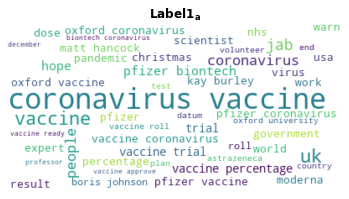

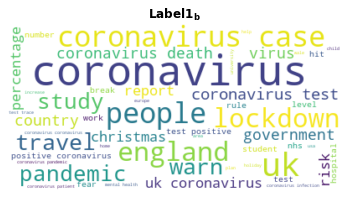

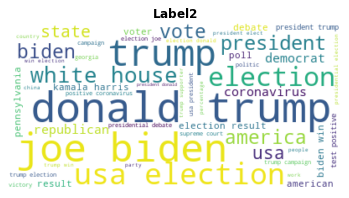

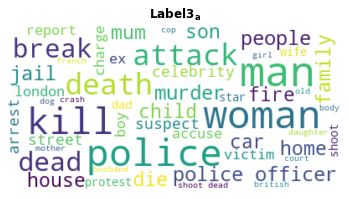

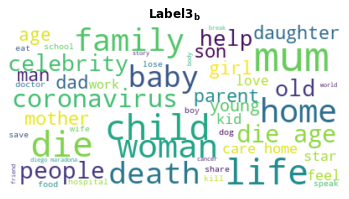

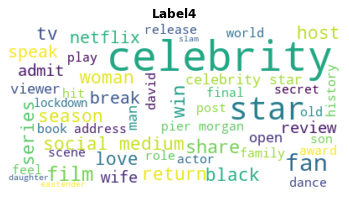

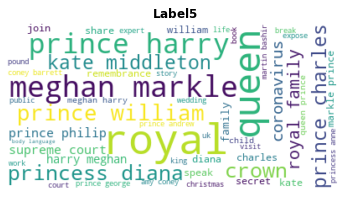

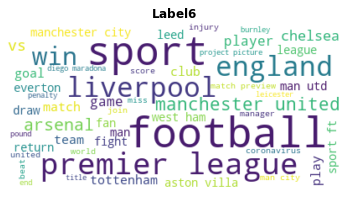

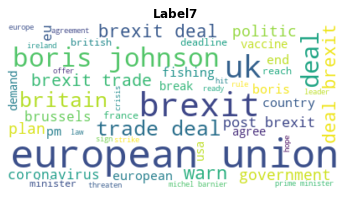

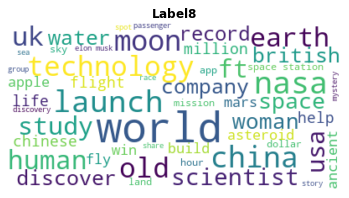

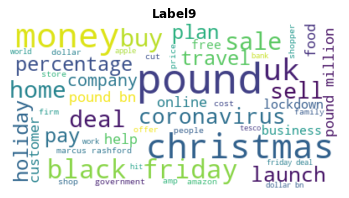

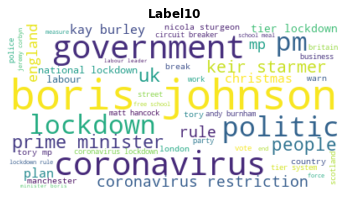

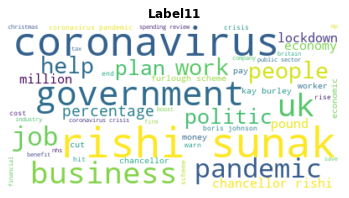

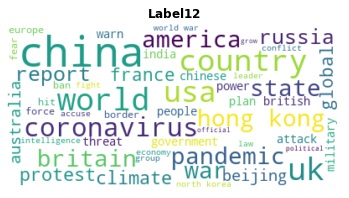

In [3047]:
for i in ['Label1_a','Label1_b','Label2','Label3_a','Label3_b','Label4','Label5','Label6','Label7','Label8','Label9','Label10','Label11','Label12']:
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(" ".join(review for review in UK_News2.loc[UK_News2['Topics SOM18_B Kmeans18 Label']==i]['Merged tok12']))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(r"$\bf{" + str(i) + "}$")
    plt.axis("off")
    plt.show()
    

In [1542]:
UK_News2.to_pickle('UK_News_SOM_Bubble_final_bestModel.df')

In [ ]:
#SOM 18x18 Bubble function + Kmeans with 18 nr of topics
# Cl 15: sunak rishi, job, government, business, scheme, chancellor,payments,work,plan, worker,economy,economic, spending,tax,wage,financial
# Cl 16: brexit, european union, deal, trade, agreement, fishing, brussels, ireland, law, negotiation,market,barnier,foreign,legal
# Cl 17: world countries(China, UK, USA, H.Kong, Russia, France,Australia,Korea,Iran), war, world, climate,military, attack,protest, global,rights,threat,nuclear, security 
#        + weather, economy, crisis, fear
# Cl 0: shopping, spending, money, Christmas, black friday, sale, prices, buy,sell, tech&digital companies, stores/shops

# Cl 1: coronavirus in terms of lockdown&restrictions, J. Boris, minister, pm, rules, labour,K.Starmer, government, mps, mp,measures, Surgeon, mayor
# Cl 3: coronavirus Vaccine, pfizer,biontech,moderna,astrazeneca, oxford, trial, dose, nhs, virus, doctor
# Cl 10: coronavirus test, lockdown, travel, quarantine, rules, hospital, nhs, patient, infection, isolate, outbreak, contact
# Cl 12: coronavirus, cases, death, health, pandemic, infection, patient, wave, hospital, scientist, spread

# Cl 2: sport, football, premier league, cup, match, chelsea, ...

# Cl 4: bad news about people&celebrity: crime, death, die, murder, abuse, court, accuse, kill, jail, rape, victim, shoot
# Cl 13: bed news about people, die, death, cancer, care, hospital, doctor
# Cl 8: crime, police, kill, attack, arrest, shoot, murder, suspect, charge, jail, terror, injure, terrorist

# Cl 5: space, nasa, moon, earth, technology, discovery, scientist, asteroid, spaceX, Mars, mission, Elon Musk

# Cl 6: royals, crown, prince, princess, queen, duchess, harry, meghan, diana, charles, kate, william, philip, palace
# Cl 9: celebrities, star, fan, social media, actors, seasons, film, tv
# Cl 11: prizes, film, series, history, award, netflix, nobel, book, tv, fashion

# Cl 14: election, usa, vote, states, trump, biden, count, poll, ballot,presidential,electoral,republican,senate,democrats,voting
# Cl 7: trump, biden, election, usa, president, debate, campaign, presidential, White House,Harris Kalma,Obama,republican,democrats, amministration 



In [ ]:
# For final best model ->som 18x18 plus Kmeans on SOM nodes vectors with 18 clusters
#Examined the 40 top words per each cluster. Among the 40 top words were selected words which has
# the value of (count into cluster/count in all dataset)% and the % of cluster tweets the word appeared into:

#'Label1_a': vaccine(82.26;85.2),,coronavirus(9.92;65.7), pfizer(92.33;15), oxford(76.24;11.74),trial(36.59;10.25)
# dose(77.96; 5.83),biontech(94.05; 6.35),nhs(15.24; 5.15),moderna (88.46; around 4),astrazeneca(93.1;around 4) 
# scientist (13.33; ), dr (24.4; )

#'Label1_b':coronavirus(45.13;55.43), case (71.12; 11.42), test(60.78; 10.27), lockdown (20.91; 8.19),
#death(42.04, 7.32), health (52.49; 7.32), travel(58.99; 5.21), hospital(56.19; 5.35), pandemic(30.09;4.84)
# infection (79.48; 4.36), patient(80.84; ), nhs(55.6), virus(48.24; ) positive(48.54; ), risk(42.14; )
#restriction(22.51; ), quarantine(78.87; ), care(43.28; ), wave(54.17), student(52.24), university(53.12)

#'Label2: trump(95.78; 50.64), election(95.39; 50.64), biden(95.6; 27.1), usa(70.37; 18.44), donald(97.4;1 6.64)
#joe(92.53; 14.93), president(83.4; 11.69), vote(72.05; 7.69), state (63.4; 6.41); debate(81.49; 5.2), house white(74.64; 5.75)
#campaign(64.82;), presidential(94.71; ), voter(90.17;), poll(70.39), harris kamala (91.16),pennsylvania(97.85;), count(78.94)
#republican(96.32), georgia(85.25), democrats (93.44), ballot(97.65), elect(90.11)

#'Label3_a': police(71.61; 13.72), kill(71.27; 7.84), attack(53.19; 6.08), murder(87.99;5.28), dead(75.9;5.28)
#die(28.06; 5.08), death(25.09; 4.91), arrest(72.79; 4.62), shoot(80.91;4.3), officer(71.51; 4.16), charge(54.61)
#jail(67.54; ), man(58.14; 11.53), woman(39.72; 7.71), fire(42.78; ), crash(64.23; ), suspect(80.31; )
#abuse(60.09; ), vicitim(61.75; ), accuse(27.68; )
#'Label3_b': die(43.52; 16.78), mum(5.44;11.1), home(23.8;10.3), life(27.79;8.48), woman(18.91;7.82), baby(18.91; 7.82)
#child(26.21; 7.18), age(46.96), death(14.34;5.98),family(19.24;5.75) cancer(56.55; 4.62), care(29.23; ), son(23.96;), girl(32.99; )
#daughter(33.92;), parent(38.66; ), star(9.64;),  help(11.56;),dad(35.38;), mother(34.9;), boy(25.21;)
#kif(30.12;), hospital(11.29; ), lose(10.49;), share(11.57;), love(18.75;), brain(55.56;), save(13.9), dog(20.4)


#'Label4': celebrity(78.55; 22.53), star(68.68; 12.12),fan(58.83; 6.48), black(35.95; 4.19), film(50; 3.05),
# share(31.83;3.1 ),social(41,4; 2.45),season(52.42,2.47), host(53.82; 2.51), series(55.24;2,45), james(56.45;2.37),
# tv(40.09; 2.26), love(37.36; ), viewer(74.3;), medium(45.4;), netflix(55,24)

#'Label5': prince(94.87;30.75), royal(83.51;21.97), harry(80.04; 18), meghan markle(96.37; 16.44), queen(68.26; 14.83), 
#princess(88.25; 13.22), crown(73.61; 10.17), , william (87.9;10.98), diana(89.05;10.89), 
# kate(67.24;9.72), charles(82.99; 7.98), middleton(93.98; 5.8), philip(63.05;), duchess(82.56;), 
#court(27.45;7.36), supreme(32.67; ), george(27.21;),remembrance(50;), wedding(26.8;), duke(73.91;), palace(52.52;)
#heartbreak(48.97;)

#'Label6': sport(73.19;24.91), football(76.89; 24.17), league(92.32; 17.94), premier(88.89; 10.1), united(57.95;8.78)
#manchester (27.13; 8.67), liverpool(43.68; ), city(17.89; 5.88), club(56.61; 5.65), vs(71.59;5.42 ), arsenal(78.48;5.02 )
#cup(61.54; 4.82 ), match(59.25), player(50.17;), goal(58.08;), chelsea(72.63; ), tottenham(85.47;), utd(86.14;)
#everton(95.45;), champion(43.58;),  ham(94.87;), villa(71.13;), gareth(78.89;)

#'Label7': brexit(85.45; 53.54), european union (84.29; 37.95), deal (50.9; 32.38), trade(71.37; 18.47),
#agreement(54.58; 4.59), boris(14.33; 16.73), government(4.6), minister(7.23), eu(69.74; ), fishing(63;), brussels(73.51;), ireland(20.3;), 
#law(11.83;), politic(6.15), negotiation(68.5)

#'Label8': world(16.15; 9.36), space(66.58; 6.29), nasa(90.09; 4.94), launch(16.73; 4.58), moon(79.62;4.35),
#earth(69.12; 3.65), technology(29.09;3.72), china(9.94; 3.62), scientist(15.95; 3.16), discover(35.28;3.13)
#water(25.12;),human(25.12;),flight(21.4;), company(13.19), chinese(18.58;),station(29.63), asteroid(89.36)
#sea(26.97), fly(26.99), spacex(91.57), mars(77.78), ancient(54.88), apple(25.35), mission(51.58)

#'Label9': 'pound(65.96;26.18), christmas(39.35;11.28), money(65.61;10.77), sale(73.06;6.12), deal(24.34;5.89),
#bn(63.97;5.14), pay(28.17;4.75), friday(49.87;4.82), million(22.83;4.55), black(26.07;4.58), launch(31.95;4.31), 
#price(56.03;4.21), buy(59.71;4.19), sell(51.62;), dollar(33.79;)
#holiday(37.55), amazon(70.8), travel(18.14), tesco(82.89), company(29.65), amp(37.89),meal(38.59), 
#shopper(73.21), online(35.35), customer(75.78), worth(56.51),lewis(42.46)
#'customer', 'bank', 'worth', 'lewis', 'government', 'lockdown', 'offer'

#'Label10': lockdown(63.38;26.28), coronavirus(20.48;26.82), boris(71.51;19.64); johnson(70.57;19.1),tier(88.68;13.54)
#government(43.53;11.13),restriction(70.11;10.34), minister(65.84;10.2),pm(69.55;8.12),rule(45.95;7.82),
#labour(80.16;7.01), tory (79.89;5.77), politic(46.11;5.38),starmer(94.21), prime(65.27), 
#school(41.85), party(41.49), mps(73.01), keir(95), mp(73.68), local(60.81), pub(70.74), measure(58.95)
# bigrams-> coronavirus and lockdown 7.23, coronavirus and rule 3.11, coronavirus and restriction 5.83, c
#coronavirus and government 2.93; coronavirus and minister 2.89; coronavirus and pm 2.25; 
#boris and johnson 17.71, 

#'Label11':Sunak (93.04;22.24), Rishi(94.24;19.66), coronavirus(4.92;24.95), job(45.02; 16.73), government(13.11;13.09)
#business(31.66; 10.91), scheme(60.34;9.98), chanellor(71.1;9.4),pound(8.8;8.44), pay(19.56;7.98), help(16.04;8.04)
#work(13.33;7.46), furlough(76.73), milion(12.4), cut(22.36), plan(9.83), worker(21.83),crisis(19.71), economy(24.26)
#economic(27.66), spending(55.43), sector(47.08), money(8.62), wage(58.18), tax(27.84), 

#'Label12': china(59.66; 14.44), uk(9.33; 8.65) world(22.12; 8.53), war(49.29; 7.8), usa(8.3; 6.14)
# coronavirus(2.06; 5.83), britain(16.48; 4.44), pandemic(10.94;4.06), climate(36.68;3.76), president(9.53;3.82)
#america(19.12; 3.64), north(26.04;3.66), south(33.76;3.63), hong(67.01),kong(67.94), force(14.93)
#government(5.83), protest(24.97),global(31.37),russia(48.38), france(28.81), power(21.46), military(45.31)
#right(15.47), chinese(32.02), bejing(74.42), australia(30.64), wather(52.71),economy(22.5),korea(66.96),
#crisis(16.52)

# Best Model ->  Top cluster Words vectors algebra->Similarity

# Among 40 Top words selected the most relevant one

In [3219]:
label1a_words=['vaccine','coronavirus','pfizer', 'oxford','trial','dose','biontech','nhs','moderna','astrazeneca',
               'scientist', 'dr']
label1a_weights=[82.26, 9.92,   92.33,     76.24,   36.59,         77.96,   94.05,   15.24,  88.46,    93.1,   
                13.33,   24.4]
label1b_words=['coronavirus','case','test','lockdown','death','health', 'travel', 'hospital','pandemic',
               'infection','patient','nhs', 'virus','positive', 'risk','restriction','quarantine', 'care', 
               'wave', 'student', 'university']
label1b_weights=[45.13,        71.12,60.78,  20.91,    42.04,  52.49,    58.99,     56.19,     30.09,79.48,      80.84,   55.6,   48.24,   48.54,   42.14,     22.51,      78.87,        43.28,54.17,   52.24,      53.12]
label2_words=['trump','election','biden','usa','donald','joe','president','vote','state','debate','house','white',
             'campaign','presidential','voter','poll','harris','kamala','pennsylvania','count','republican',
              'georgia','democrats','ballot','elect']
label2_weights=[95.78,  95.39,    95.6,  70.37,  97.4,   92.53,  83.4,    72.05,  63.4,   81.49,   74.64,  74.64,
               64.82,     94.71,         90.17, 70.39,  91.16,  91.16,    97.85,       78.94,      96.32,
               85.25,    93.44,     97.65,    90.11]
label3a_words=['police','kill','attack','murder','dead','die','death','arrest','shoot','officer','charge','jail',
               'man','woman','fire','crash','suspect','abuse','victim','accuse']
label3a_weights=[71.61,  71.27,  53.19,   87.99,  75.9,  28.06, 25.09,  72.79,   80.91,  71.51,   54.61, 67.54,
                8.14,  39.72, 42.78, 64.23,   80.31,   60.09,   61.75,  27.68]
label3b_words=['die','life','woman','child','age','death','family','cancer','care','son','girl',
            'daughter','parent','help','dad','mother','boy','knife','hospital','lose','share','love','brain',
               'save'] #,'home'-23.8,,'mum'-5.44,,'star'- 9.64,,'dog'-,20.4,'baby'-18.91,
label3b_weights=[43.52,  27.79, 18.91,   26.21,  46.96, 14.34, 19.24,   56.55,  29.23, 23.96,32.99,
             33.92,    38.66,      11.56, 35.38, 34.9,  25.21,30.12, 11.29,    10.49,  11.57,  18.75, 55.56, 13.9]
label4_words=['celebrity','star','fan','film','season','host','series','tv',
              'viewer','netflix'] #,'james'-56.45,'black'-35.95,,'medium'-45.4,'share','social',-31.83,41.4,'love'-37.36,
label4_weights=[78.55,68.68,58.83,50,52.42,53.82,55.24,40.09,74.3,55.24]
label5_words=['prince','royal','harry','meghan','queen', 'princess','crown','william','diana','kate',
              'charles','philip','duchess', 'court','supreme','remembrance','duke',
              'palace'] #'heartbreak'-48.97;,'wedding'-26.8,'george'-27.21,,'markle'-96.37,'middleton'-93.98,
label5_weights=[94.87,83.51,80.04,96.37,68.26,88.25,73.61,87.9,89.05,67.24,82.99,63.05,82.56,27.45,
                32.67,50,73.91,52.52 ]
label6_words=['sport','football','league','premier','united','manchester','liverpool','city','club','vs','arsenal',
'cup','match','player','goal','chelsea','tottenham','utd','everton','champion','ham','villa','gareth']
label6_weights=[73.19,76.89,92.32,88.89,57.95,27.13,43.68,17.89,56.61,71.59,78.48,61.54,59.25,50.17,58.08,72.63,85.47,86.14,95.45,43.58,94.87,71.13,78.89]

label7_words=['brexit','european','union','deal','trade','agreement','boris','government','minister','eu','fishing',
              'brussels','ireland', 'law','politic','negotiation']
label7_weights=[85.45,84.29,84.29,50.9,71.37,54.58,14.33,4.6,7.23,69.74,63,73.51,20.3, 11.83,6.15,68.5]
label8_words=['world','space','nasa','launch','moon','earth','technology','china','scientist','discover','water',
              'human','flight','company','chinese','station','asteroid','sea','fly','spacex','mars','ancient',
              'apple','mission']
label8_weights=[16.15,66.58,90.09,16.73,79.62,69.12,29.09,9.94,15.95,35.28,25.12,25.12,21.4,13.19,18.58,29.63,89.36,26.97,26.99,91.57,77.78,54.88,25.35,51.58]
label9_words=['pound','christmas','money','sale','deal','bn','pay','friday','million','black','launch', 'price',
              'buy','sell','dollar', 'holiday','amazon','travel','tesco','company','amp','meal', 'shopper',
              'online','customer','worth','lewis']
label9_weights=[65.96,39.35,65.61,73.06,24.34,63.97,28.17,49.87,22.83,26.07,31.95,56.03,59.71,51.62,33.79,
                37.55,70.8,18.14,82.89,29.65,37.89,38.59, 73.21,35.35,75.78,56.51,42.46]
label10_words=['lockdown','coronavirus','boris','johnson','tier','government','restriction','minister','pm','rule',
'labour','tory','politic','starmer','prime', 'school','party','mps','keir','mp','local','pub','measure']
label10_weights=[63.38,20.48,71.51,70.57,88.68,43.53,70.11,65.84,69.55,45.95,80.16,79.89,46.11,94.21,65.27,41.85,41.49,73.01,95,73.68,60.81,70.74,58.95]
label11_words=['sunak','rishi','coronavirus','job','government','business','scheme','chancellor','pound','pay','help',
'work','furlough','million','cut','plan','worker','crisis','economy','economic','spending','sector','money','wage','tax']
label11_weights=[93.04,94.24,4.92,45.02,13.11,31.66,60.34,71.1,8.8,19.56,16.04,13.33,76.73,12.4,22.36,9.83,21.83,19.71,24.26,27.66,55.43,47.08,8.62,58.18,27.84 ]

label12_words=['china','uk','world','war','usa','coronavirus','britain','pandemic','climate','president',
               'america','north','south','hong','kong','force','government','protest','global','russia','france',
               'power','military','right','chinese','beijing','australia','weather','economy','korea','crisis']
label12_weights=[59.66,9.33,22.12,49.29,8.3,2.06,16.48,10.94,36.68,9.53,19.12,26.04,33.76,67.01,67.94,14.93,5.83,24.97,31.37,48.38,28.81,21.46,45.31,15.47,32.02,74.42,30.64,52.71,22.5,66.96,16.52]    

In [3220]:
List_words1=[label1a_words,label1b_words,label2_words,label3a_words,label3b_words,label4_words,label5_words,label6_words,label7_words,label8_words,label9_words,label10_words,label11_words,label12_words]
List_weights1=[label1a_weights,label1b_weights,label2_weights,label3a_weights,label3b_weights,label4_weights,label5_weights,label6_weights,label7_weights,label8_weights,label9_weights,label10_weights,label11_weights,label12_weights]
df_finalModel_words= pd.DataFrame(columns=[ 'Words1','Weights1'])
df_finalModel_words[ 'Words1']=List_words1
df_finalModel_words[ 'Weights1']=List_weights1
df_finalModel_words[ 'Topic']=['label1_a','label1_b','label2','label3_a','label3_b','label4','label5','label6','label7','label8','label9','label10','label11','label12']

In [3215]:
words_len=[]
for i in List_words1:
    words_len.append(len(i))
print(min(words_len),max(words_len))

10 31


In [3204]:
pd.set_option("display.max_colwidth", -1)
pd.DataFrame(df_finalModel_words[[ 'Words1', 'Topic']])

Words1  \
0   [vaccine, coronavirus, pfizer, oxford, trial, dose, biontech, nhs, moderna, astrazeneca, scientist, dr]                                                                                                                                                         
1   [coronavirus, case, test, lockdown, death, health, travel, hospital, pandemic, infection, patient, nhs, virus, positive, risk, restriction, quarantine, care, wave, student, university]                                                                        
2   [trump, election, biden, usa, donald, joe, president, vote, state, debate, house, white, campaign, presidential, voter, poll, harris, kamala, pennsylvania, count, republican, georgia, democrats, ballot, elect]                                               
3   [police, kill, attack, murder, dead, die, death, arrest, shoot, officer, charge, jail, man, woman, fire, crash, suspect, abuse, victim, accuse]                                                                                                                 
4   [die, life, woman, child, age, death, family, cancer, care, son, girl, daughter, parent, help, dad, mother, boy, knife, hospital, lose, share, love, brain, save]                                                                                               
5   [celebrity, star, fan, film, season, host, series, tv, viewer, netflix]                                                                                                                                                                                         
6   [prince, royal, harry, meghan, queen, princess, crown, william, diana, kate, charles, philip, duchess, court, supreme, remembrance, duke, palace]                                                                                                               
7   [sport, football, league, premier, united, manchester, liverpool, city, club, vs, arsenal, cup, match, player, goal, chelsea, tottenham, utd, everton, champion, ham, villa, gareth]                                                                            
8   [brexit, european, union, deal, trade, agreement, boris, government, minister, eu, fishing, brussels, ireland, law, politic, negotiation]                                                                                                                       
9   [world, space, nasa, launch, moon, earth, technology, china, scientist, discover, water, human, flight, company, chinese, station, asteroid, sea, fly, spacex, mars, ancient, apple, mission]                                                                   
10  [pound, christmas, money, sale, deal, bn, pay, friday, million, black, launch, price, buy, sell, dollar, holiday, amazon, travel, tesco, company, amp, meal, shopper, online, customer, worth, lewis]                                                           
11  [lockdown, coronavirus, boris, johnson, tier, government, restriction, minister, pm, rule, labour, tory, politic, starmer, prime, school, party, mps, keir, mp, local, pub, measure]                                                                            
12  [sunak, rishi, coronavirus, job, government, business, scheme, chancellor, pound, pay, help, work, furlough, million, cut, plan, worker, crisis, economy, economic, spending, sector, money, wage, tax]                                                         
13  [china, uk, world, war, usa, coronavirus, britain, pandemic, climate, president, america, north, south, hong, kong, force, government, protest, global, russia, france, power, military, right, chinese, beijing, australia, weather, economy, korea, crisis]   

       Topic  
0   label1_a  
1   label1_b  
2   label2    
3   label3_a  
4   label3_b  
5   label4    
6   label5    
7   label6    
8   label7    
9   label8    
10  label9    
11  label10   
12  label11   
13  label12

In [3095]:
pd.reset_option("^display")

In [3216]:
df_finalModel_words
# here weights are in % format but in computation have been used in decimal forma

Words1  \
0   [vaccine, coronavirus, pfizer, oxford, trial, ...   
1   [coronavirus, case, test, lockdown, death, hea...   
2   [trump, election, biden, usa, donald, joe, pre...   
3   [police, kill, attack, murder, dead, die, deat...   
4   [die, life, woman, child, age, death, family, ...   
5   [celebrity, star, fan, film, season, host, ser...   
6   [prince, royal, harry, meghan, queen, princess...   
7   [sport, football, league, premier, united, man...   
8   [brexit, european, union, deal, trade, agreeme...   
9   [world, space, nasa, launch, moon, earth, tech...   
10  [pound, christmas, money, sale, deal, bn, pay,...   
11  [lockdown, coronavirus, boris, johnson, tier, ...   
12  [sunak, rishi, coronavirus, job, government, b...   
13  [china, uk, world, war, usa, coronavirus, brit...   

                                             Weights1     Topic  
0   [82.26, 9.92, 92.33, 76.24, 36.59, 77.96, 94.0...  label1_a  
1   [45.13, 71.12, 60.78, 20.91, 42.04, 52.49, 58....  label1_b  
2   [95.78, 95.39, 95.6, 70.37, 97.4, 92.53, 83.4,...    label2  
3   [71.61, 71.27, 53.19, 87.99, 75.9, 28.06, 25.0...  label3_a  
4   [43.52, 27.79, 18.91, 26.21, 46.96, 14.34, 19....  label3_b  
5   [78.55, 68.68, 58.83, 50, 52.42, 53.82, 55.24,...    label4  
6   [94.87, 83.51, 80.04, 96.37, 68.26, 88.25, 73....    label5  
7   [73.19, 76.89, 92.32, 88.89, 57.95, 27.13, 43....    label6  
8   [85.45, 84.29, 84.29, 50.9, 71.37, 54.58, 14.3...    label7  
9   [16.15, 66.58, 90.09, 16.73, 79.62, 69.12, 29....    label8  
10  [65.96, 39.35, 65.61, 73.06, 24.34, 63.97, 28....    label9  
11  [63.38, 20.48, 71.51, 70.57, 88.68, 43.53, 70....   label10  
12  [93.04, 94.24, 4.92, 45.02, 13.11, 31.66, 60.3...   label11  
13  [59.66, 9.33, 22.12, 49.29, 8.3, 2.06, 16.48, ...   label12

In [3221]:
#get words vectros from gensim model
def get_vectors(words):
    return [model_gens[word] for word in words]
#multiply each word vectros by its decimal weight
def vectors_with_W1(x):
    result=[]
    for i, j in zip(x[3],x[1]):
        result.append([(i*((j)/100))])
    return result
#sum of vectros 
def sum_vec(x):
    return sum(x)
def sum_vec2(x):
    return sum(np.concatenate(x))
#get most 25 similar words according to cosine similarity 
def get_top_similar_words(x):
    return model_gens.wv.similar_by_vector(x, topn=25)
#applying some matematical transofrmation to weights
def modif_weights(labelx_weights):
    for i in range(0,len(labelx_weights)):
        labelx_weights[i]=math.log(labelx_weights[i])*(labelx_weights[i]/(i+1)/100)
    return labelx_weights
#multiply each word vectros by its transformed weights
def vectors_with_W1_b(x):
    result=[]
    for i, j in zip(x[3],x[8]):
        result.append([(i*(j))])
    return result

In [3206]:
def from_tuple_to_list(tuples):
    lists = [list(x) for x in tuples]
    return lists
def get_n_top_words(x):
    words=[]
    for i in x[0:10]:
        words.append(i[0])
    return words       

In [3222]:
#words vectros
df_finalModel_words['Vectors1']=df_finalModel_words['Words1'].apply(get_vectors)
#word vectors mulitplied per their respetive weight
df_finalModel_words['Vectors1 W1']=df_finalModel_words.apply(vectors_with_W1, axis=1)
#simple sum of all words vectros
df_finalModel_words['Sum Vec1']=df_finalModel_words['Vectors1'].apply(sum_vec)
#simple sum of all word vectros previously multiplied per their respective weights
df_finalModel_words['Sum Vec1 W1']=df_finalModel_words['Vectors1 W1'].apply(sum_vec2)
#25 most similar words according cosine similarity of the vectors 'Sum Vec1 W1'
df_finalModel_words['TopWords Vec1 W1']=df_finalModel_words['Sum Vec1 W1'].apply(get_top_similar_words)

In [3223]:
pd.reset_option("^display")
df_finalModel_words

Words1  \
0   [vaccine, coronavirus, pfizer, oxford, trial, ...   
1   [coronavirus, case, test, lockdown, death, hea...   
2   [trump, election, biden, usa, donald, joe, pre...   
3   [police, kill, attack, murder, dead, die, deat...   
4   [die, life, woman, child, age, death, family, ...   
5   [celebrity, star, fan, film, season, host, ser...   
6   [prince, royal, harry, meghan, queen, princess...   
7   [sport, football, league, premier, united, man...   
8   [brexit, european, union, deal, trade, agreeme...   
9   [world, space, nasa, launch, moon, earth, tech...   
10  [pound, christmas, money, sale, deal, bn, pay,...   
11  [lockdown, coronavirus, boris, johnson, tier, ...   
12  [sunak, rishi, coronavirus, job, government, b...   
13  [china, uk, world, war, usa, coronavirus, brit...   

                                             Weights1     Topic  \
0   [82.26, 9.92, 92.33, 76.24, 36.59, 77.96, 94.0...  label1_a   
1   [45.13, 71.12, 60.78, 20.91, 42.04, 52.49, 58....  label1_b   
2   [95.78, 95.39, 95.6, 70.37, 97.4, 92.53, 83.4,...    label2   
3   [71.61, 71.27, 53.19, 87.99, 75.9, 28.06, 25.0...  label3_a   
4   [43.52, 27.79, 18.91, 26.21, 46.96, 14.34, 19....  label3_b   
5   [78.55, 68.68, 58.83, 50, 52.42, 53.82, 55.24,...    label4   
6   [94.87, 83.51, 80.04, 96.37, 68.26, 88.25, 73....    label5   
7   [73.19, 76.89, 92.32, 88.89, 57.95, 27.13, 43....    label6   
8   [85.45, 84.29, 84.29, 50.9, 71.37, 54.58, 14.3...    label7   
9   [16.15, 66.58, 90.09, 16.73, 79.62, 69.12, 29....    label8   
10  [65.96, 39.35, 65.61, 73.06, 24.34, 63.97, 28....    label9   
11  [63.38, 20.48, 71.51, 70.57, 88.68, 43.53, 70....   label10   
12  [93.04, 94.24, 4.92, 45.02, 13.11, 31.66, 60.3...   label11   
13  [59.66, 9.33, 22.12, 49.29, 8.3, 2.06, 16.48, ...   label12   

                                             Vectors1  \
0   [[0.1513721, -0.24967842, -1.4908072, -0.85035...   
1   [[0.16252866, -0.18996447, 0.7417573, 1.126552...   
2   [[-1.953547, -0.51644725, 0.18823895, -0.61761...   
3   [[-1.760007, 0.43727845, 2.755605, -1.809311, ...   
4   [[-1.8005345, -0.048139196, 0.6681597, -0.0951...   
5   [[-0.014123709, -3.5700617, -1.1406821, -1.332...   
6   [[2.0587287, -0.037210096, 0.9065166, -0.44580...   
7   [[-0.6136264, 1.5872618, -0.30777478, 0.169244...   
8   [[-1.2095904, 0.54104143, -1.4710929, 0.981258...   
9   [[0.13331191, -0.060956102, -0.89768535, 1.577...   
10  [[-2.245338, -1.8280911, -0.52445775, -0.99491...   
11  [[0.8448419, -1.8570935, 2.9122915, -2.44492, ...   
12  [[-1.6412473, 0.44380245, 2.8280623, -1.126996...   
13  [[-0.49895185, 1.2752743, -0.48707598, 0.99852...   

                                          Vectors1 W1  \
0   [[[0.12451869, -0.20538546, -1.226338, -0.6995...   
1   [[[0.073349185, -0.08573096, 0.33475506, 0.508...   
2   [[[-1.8711072, -0.49465317, 0.18029526, -0.591...   
3   [[[-1.260341, 0.3131351, 1.9732887, -1.2956476...   
4   [[[-0.78359264, -0.020950178, 0.2907831, -0.04...   
5   [[[-0.011094173, -2.8042834, -0.89600575, -1.0...   
6   [[[1.9531159, -0.03530122, 0.8600123, -0.42293...   
7   [[[-0.44911316, 1.1617168, -0.22526036, 0.1238...   
8   [[[-1.033595, 0.4623199, -1.257049, 0.8384854,...   
9   [[[0.021529876, -0.009844411, -0.14497618, 0.2...   
10  [[[-1.481025, -1.205809, -0.34593233, -0.65624...   
11  [[[0.5354608, -1.1770259, 1.8458104, -1.549590...   
12  [[[-1.5270165, 0.4129138, 2.6312292, -1.048557...   
13  [[[-0.2976747, 0.7608286, -0.29058954, 0.59571...   

                                             Sum Vec1  \
0   [6.362075, -5.777792, -6.6489835, 2.3460763, -...   
1   [-6.9468093, -7.676617, 22.467272, -23.390182,...   
2   [-15.719769, 28.844933, -17.158836, -19.135984...   
3   [-21.97424, -10.269632, 27.591898, -14.10312, ...   
4   [3.7587833, -31.039984, 12.618058, -0.7723147,...   
5   [3.2078156, -7.10839, -6.7368765, -6.603734, -...   
6   [30.52254, -3.48129, 12.304359, -9.320773, -12...   
7   [-17.29316, 2

In [3224]:
print(df_finalModel_words['Words1'].iloc[7])

['sport', 'football', 'league', 'premier', 'united', 'manchester', 'liverpool', 'city', 'club', 'vs', 'arsenal', 'cup', 'match', 'player', 'goal', 'chelsea', 'tottenham', 'utd', 'everton', 'champion', 'ham', 'villa', 'gareth']


In [3225]:
#Weigts in decimals for Label 1a
def from_perc_to_dec(x):
    return [round(i/100,3) for i in x]
weigts_1=df_finalModel_words['Weights1'].iloc[7]
list_of_weights=from_perc_to_dec(weigts_1)
print(list_of_weights)

[0.732, 0.769, 0.923, 0.889, 0.58, 0.271, 0.437, 0.179, 0.566, 0.716, 0.785, 0.615, 0.593, 0.502, 0.581, 0.726, 0.855, 0.861, 0.955, 0.436, 0.949, 0.711, 0.789]


In [3226]:
# Modified Weigts  for Label 1a
list_of_weights2=modif_weights(weigts_1)
print([round(x,2) for x in list_of_weights2] )

[3.14, 1.67, 1.39, 1.0, 0.47, 0.15, 0.24, 0.06, 0.25, 0.31, 0.31, 0.21, 0.19, 0.14, 0.16, 0.19, 0.22, 0.21, 0.23, 0.08, 0.21, 0.14, 0.15]


In [3228]:
print(df_finalModel_words['Words1'].iloc[8])
weigts_2=df_finalModel_words['Weights1'].iloc[8]
list_of_weights2=from_perc_to_dec(weigts_2)
print(list_of_weights2)
list_of_weights22=modif_weights(weigts_2)
print([round(x,2) for x in list_of_weights22] )

['brexit', 'european', 'union', 'deal', 'trade', 'agreement', 'boris', 'government', 'minister', 'eu', 'fishing', 'brussels', 'ireland', 'law', 'politic', 'negotiation']
[0.855, 0.843, 0.843, 0.509, 0.714, 0.546, 0.143, 0.046, 0.072, 0.697, 0.63, 0.735, 0.203, 0.118, 0.062, 0.685]
[3.8, 1.87, 1.25, 0.5, 0.61, 0.36, 0.05, 0.01, 0.02, 0.3, 0.24, 0.26, 0.05, 0.02, 0.01, 0.18]


In [3229]:
#computed the 'second kind of weights' by transofming the first weights of column 'Weights1'
df_finalModel_words['Weights1_b']=df_finalModel_words['Weights1'].apply(modif_weights)
#word vectors mulitplied per their respetive 'second kind if weight'
df_finalModel_words['Vectors1 W1_b']=df_finalModel_words.apply(vectors_with_W1_b, axis=1)
#simple sum of all word vectros previously multiplied per their respective 'second kind of weights'
df_finalModel_words['Sum Vec1 W1_b']=df_finalModel_words['Vectors1 W1_b'].apply(sum_vec2)
#25 most similar words according cosine similarity of the vectors 'Sum Vec1 W1'
df_finalModel_words['TopWords Vec1 W1_b']=df_finalModel_words['Sum Vec1 W1_b'].apply(get_top_similar_words)

In [3230]:
pd.reset_option("^display")
df_finalModel_words[['Words1','Topic','TopWords Vec1 W1','Weights1_b','Vectors1 W1_b','Sum Vec1 W1_b','TopWords Vec1 W1_b']]

Words1     Topic  \
0   [vaccine, coronavirus, pfizer, oxford, trial, ...  label1_a   
1   [coronavirus, case, test, lockdown, death, hea...  label1_b   
2   [trump, election, biden, usa, donald, joe, pre...    label2   
3   [police, kill, attack, murder, dead, die, deat...  label3_a   
4   [die, life, woman, child, age, death, family, ...  label3_b   
5   [celebrity, star, fan, film, season, host, ser...    label4   
6   [prince, royal, harry, meghan, queen, princess...    label5   
7   [sport, football, league, premier, united, man...    label6   
8   [brexit, european, union, deal, trade, agreeme...    label7   
9   [world, space, nasa, launch, moon, earth, tech...    label8   
10  [pound, christmas, money, sale, deal, bn, pay,...    label9   
11  [lockdown, coronavirus, boris, johnson, tier, ...   label10   
12  [sunak, rishi, coronavirus, job, government, b...   label11   
13  [china, uk, world, war, usa, coronavirus, brit...   label12   

                                     TopWords Vec1 W1  \
0   [(pfizer, 0.9794822931289673), (jab, 0.9740887...   
1   [(outbreak, 0.8931201696395874), (transmission...   
2   [(democrat, 0.9385728240013123), (uselection, ...   
3   [(suspect, 0.9621351957321167), (murder, 0.943...   
4   [(sick, 0.9099607467651367), (breast, 0.900287...   
5   [(viewer, 0.9294372797012329), (rumour, 0.9265...   
6   [(charles, 0.9469160437583923), (duke, 0.93702...   
7   [(arsenal, 0.9859693050384521), (player, 0.951...   
8   [(eu, 0.964586615562439), (brussels, 0.9539214...   
9   [(nasa, 0.9778151512145996), (mars, 0.96432548...   
10  [(discount, 0.9534296989440918), (buy, 0.94204...   
11  [(backbench, 0.9084749817848206), (common, 0.9...   
12  [(chancellor, 0.9539014101028442), (furlough, ...   
13  [(beijing, 0.9597998857498169), (china, 0.9148...   

                                           Weights1_b  \
0   [3.627571370401154, 0.11380982489632036, 1.392...   
1   [1.7192486576055002, 1.516409471032729, 0.8321...   
2   [4.369535220549072, 2.1739255806143865, 1.4531...   
3   [3.0586311894503972, 1.5203585378374351, 0.704...   
4   [1.6421056062287536, 0.4619637640696756, 0.185...   
5   [3.4277141289731303, 1.4523958895724531, 0.799...   
6   [4.318963896941121, 1.8476447141257037, 1.1692...   
7   [0.03597341145345841, 0.004277738900404002, 0....   
8   [0.050747726342779555, 0.00584293510390003, 0....   
9   [0.44928008802148944, 1.3976487688816959, 1.35...   
10  [2.763096389077246, 0.7225635830543764, 0.9149...   
11  [2.629730226931747, 0.3091915571375419, 1.0177...   
12  [4.217530654438965, 2.1420020320184237, 0.0261...   
13  [2.439295617403067, 0.10418041344318413, 0.228...   

                                        Vectors1 W1_b  \
0   [[[0.5491131, -0.90572625, -5.4080095, -3.0847...   
1   [[[0.2794272, -0.32659617, 1.2752652, 1.936823...   
2   [[[-8.536093, -2.2566345, 0.82251674, -2.69868...   
3   [[[-5.3832126, 1.3374735, 8.428379, -5.534015,...   
4   [[[-2.9566677, -0.07904964, 1.0971888, -0.1561...   
5   [[[-0.048412036, -12.237151, -3.9099321, -4.56...   
6   [[[8.891575, -0.16070907, 3.9152126, -1.925402...   
7   [[[-0.022074236, 0.05709922, -0.011071709, 0.0...   
8   [[[-0.061383963, 0.027456623, -0.074654624, 0....   
9   [[[0.059894387, -0.027386362, -0.40331215, 0.7...   
10  [[[-6.204085, -5.051192, -1.4491273, -2.749040...   
11  [[[2.2217064, -4.8836546, 7.658541, -6.42948, ...   
12  [[[-6.922011, 1.8717505, 11.92744, -4.7531414,...   
13  [[[-1.217091, 3.110771, -1.1881223, 2.4356897,...   

                                        Sum Vec1 W1_b  \
0   [3.4874134, -2.916686, -9.9434395, -1.912931, ...   
1   [-5.905646, -4.239755, 3.8732727, -8.09563, 3....   
2   [-15.752694, 11.90474, -6.4720035, -7.9442706,...   
3   [-13.928765, -0.76941484, 18.852465, -8.76956,...   
4   [-1.3016992, -3.6243505, 1.9334763, 0.31625044...   
5   [0.8108034, -16.600307, -6.5389285, -7.490351,...   
6   [26.168226, -2.445359, 10.796603, -7.153332, -...   
7   [-0.025124233

In [2752]:
df_finalModel_words['TopWords Vec1 W1_b2']=df_finalModel_words['TopWords Vec1 W1_b'].apply(from_tuple_to_list)
df_finalModel_words['TopWords Vec1 W1_b2']=df_finalModel_words['TopWords Vec1 W1_b2'].apply(get_n_top_words)
df_finalModel_words['TopWords Vec1 W1_2']=df_finalModel_words['TopWords Vec1 W1'].apply(from_tuple_to_list)
df_finalModel_words['TopWords Vec1 W1_2']=df_finalModel_words['TopWords Vec1 W1_2'].apply(get_n_top_words)

#### Plot the top selected words of all topics into 2-dim 

In [2833]:
#preparing dataframe used for plotting word vectors
import itertools
#getting the list containign all top selected words mainting the order: the first words related to topic
#with Label 1_a and so on till the last words related to the topic with Label 12
words_list= list(itertools.chain(*df_finalModel_words['Words1']))
df_finalModel_words_Visual= pd.DataFrame(columns=[ 'Words1'])
df_finalModel_words_Visual[ 'Words1']=words_list
#getting labels 
from itertools import repeat
l1a=list(repeat('Label1_a', len(label1a_words)))
l1b=list(repeat('Label1_b', len(label1b_words)))
l2=list(repeat('Label2', len(label2_words)))
l3a=list(repeat('Label3_a', len(label3a_words)))
l3b=list(repeat('Label3_b', len(label3b_words)))
l4=list(repeat('Label4', len(label4_words)))
l5=list(repeat('Label5', len(label5_words)))
l6=list(repeat('Label6', len(label6_words)))
l7=list(repeat('Label7', len(label7_words)))
l8=list(repeat('Label8', len(label8_words)))
l9=list(repeat('Label9', len(label9_words)))
l10=list(repeat('Label10', len(label10_words)))
l11=list(repeat('Label11', len(label11_words)))
l12=list(repeat('Label12', len(label12_words)))
list_lab=l1a+l1b+l2+l3a+l3b+l4+l5+l6+l7+l8+l9+l10+l11+l12
df_finalModel_words_Visual[ 'Topic Label']=list_lab
df_finalModel_words_Visual.head(2)

Words1 Topic Label
0  vaccine    Label1_a
1   pfizer    Label1_a

In [2834]:
len(df_finalModel_words_Visual) #-> there are in total 299 words

299

In [2356]:
#getting the vector for each word
Data_word=(np.concatenate((df_finalModel_words['Vectors1'].values))) #np.concatenate
#fitting TSNE for dimensionality reduction from 50 to 2 dim.
tsne_words = TSNE(n_components=2, perplexity=20.0,metric='cosine', n_iter=1000, verbose=1,
              random_state=11).fit_transform(Data_word)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 299 samples in 0.000s...
[t-SNE] Computed neighbors for 299 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 299 / 299
[t-SNE] Mean sigma: 0.324855
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.297073
[t-SNE] KL divergence after 1000 iterations: 0.632535


In [2835]:
len(Data_word) # 299 vectors, one per each word

299

In [2357]:
#Plot of word vectors, each dot is a word that was colored according to which topic it belongs to (see the legend)
df_finalModel_words_Visual['tsne-2d-one'] = tsne_words[:,0]
df_finalModel_words_Visual['tsne-2d-two'] = tsne_words[:,1]
fig = px.scatter(df_finalModel_words_Visual, x="tsne-2d-one", y="tsne-2d-two",
                 color = "Topic Label", size_max=60,color_discrete_map={
                "Label1_a": "blue",  "Label1_b": "#1F77B4",
                      "Label2": "grey","Label3_a": "#FF7F0E", "Label3_b": "#F6f926",
                      "Label4": "green", "Label5": "red", "Label6": "magenta","Label7": '#16FF32',
                "Label8": "#620042","Label9": "#FF6692","Label10": '#FED4C4','Label11': '#990099', "Label12": '#0DF9FF'
               }) #text='Words1',
fig.update_traces(textposition='top center')
fig.update_layout(height=800)
fig.show()

In [3231]:
#prepare data to create dataframes containing the 25 most similar words for each topic 
nr_top_w=25
ww1a_1=df_finalModel_words['TopWords Vec1 W1'][0][0:nr_top_w]
ww1a_2=df_finalModel_words['TopWords Vec1 W1_b'][0][0:nr_top_w]

ww1b_1=df_finalModel_words['TopWords Vec1 W1'][1][0:nr_top_w]
ww1b_2=df_finalModel_words['TopWords Vec1 W1_b'][1][0:nr_top_w]

ww2_1=df_finalModel_words['TopWords Vec1 W1'][2][0:nr_top_w]
ww2_2=df_finalModel_words['TopWords Vec1 W1_b'][2][0:nr_top_w]

ww3a_1=df_finalModel_words['TopWords Vec1 W1'][3][0:nr_top_w]
ww3a_2=df_finalModel_words['TopWords Vec1 W1_b'][3][0:nr_top_w]

ww3b_1=df_finalModel_words['TopWords Vec1 W1'][4][0:nr_top_w]
ww3b_2=df_finalModel_words['TopWords Vec1 W1_b'][4][0:nr_top_w]

ww4_1=df_finalModel_words['TopWords Vec1 W1'][5][0:nr_top_w]
ww4_2=df_finalModel_words['TopWords Vec1 W1_b'][5][0:nr_top_w]

ww5_1=df_finalModel_words['TopWords Vec1 W1'][6][0:nr_top_w]
ww5_2=df_finalModel_words['TopWords Vec1 W1_b'][6][0:nr_top_w]

ww6_1=df_finalModel_words['TopWords Vec1 W1'][7][0:nr_top_w]
ww6_2=df_finalModel_words['TopWords Vec1 W1_b'][7][0:nr_top_w]

ww7_1=df_finalModel_words['TopWords Vec1 W1'][8][0:nr_top_w]
ww7_2=df_finalModel_words['TopWords Vec1 W1_b'][8][0:nr_top_w]

ww8_1=df_finalModel_words['TopWords Vec1 W1'][9][0:nr_top_w]
ww8_2=df_finalModel_words['TopWords Vec1 W1_b'][9][0:nr_top_w]

ww9_1=df_finalModel_words['TopWords Vec1 W1'][10][0:nr_top_w]
ww9_2=df_finalModel_words['TopWords Vec1 W1_b'][10][0:nr_top_w]

ww10_1=df_finalModel_words['TopWords Vec1 W1'][11][0:nr_top_w]
ww10_2=df_finalModel_words['TopWords Vec1 W1_b'][11][0:nr_top_w]

ww11_1=df_finalModel_words['TopWords Vec1 W1'][12][0:nr_top_w]
ww11_2=df_finalModel_words['TopWords Vec1 W1_b'][12][0:nr_top_w]

ww12_1=df_finalModel_words['TopWords Vec1 W1'][13][0:nr_top_w]
ww12_2=df_finalModel_words['TopWords Vec1 W1_b'][13][0:nr_top_w]

In [3232]:
df1a_1 = pd.DataFrame(ww1a_1, columns =['Words1 L_1a', 'Simil1_1a']) 
df1a_2 = pd.DataFrame(ww1a_2, columns =['Words2 L_1a', 'Simil2_1a']) 

df1b_1 = pd.DataFrame(ww1b_1, columns =['Words1 L_1b', 'Simil1_1b']) 
df1b_2 = pd.DataFrame(ww1b_2, columns =['Words2 L_1b', 'Simil2_1b']) 

df2_1 = pd.DataFrame(ww2_1, columns =['Words1 L_2', 'Simil1_2']) 
df2_2 = pd.DataFrame(ww2_2, columns =['Words2 L_2', 'Simil2_2']) 

df3a_1 = pd.DataFrame(ww3a_1, columns =['Words1 L_3a', 'Simil1_3a']) 
df3a_2 = pd.DataFrame(ww3a_2, columns =['Words2 L_3a', 'Simil2_3a']) 

df3b_1 = pd.DataFrame(ww3b_1, columns =['Words1 L_3b', 'Simil1_3b']) 
df3b_2 = pd.DataFrame(ww3b_2, columns =['Words2 L_3b', 'Simil2_3b']) 

df4_1 = pd.DataFrame(ww4_1, columns =['Words1 L_4', 'Simil1_4']) 
df4_2 = pd.DataFrame(ww4_2, columns =['Words2 L_4', 'Simil2_4']) 

df5_1 = pd.DataFrame(ww5_1, columns =['Words1 L_5', 'Simil1_5']) 
df5_2 = pd.DataFrame(ww5_2, columns =['Words2 L_5', 'Simil2_5']) 

df6_1 = pd.DataFrame(ww6_1, columns =['Words1 L_6', 'Simil1_6']) 
df6_2 = pd.DataFrame(ww6_2, columns =['Words2 L_6', 'Simil2_6']) 

df7_1 = pd.DataFrame(ww7_1, columns =['Words1 L_7', 'Simil1_7']) 
df7_2 = pd.DataFrame(ww7_2, columns =['Words2 L_7', 'Simil2_7']) 

df8_1 = pd.DataFrame(ww8_1, columns =['Words1 L_8', 'Simil1_8']) 
df8_2 = pd.DataFrame(ww8_2, columns =['Words2 L_8', 'Simil2_8']) 

df9_1 = pd.DataFrame(ww9_1, columns =['Words1 L_9', 'Simil1_9']) 
df9_2 = pd.DataFrame(ww9_2, columns =['Words2 L_9', 'Simil2_9']) 

df10_1 = pd.DataFrame(ww10_1, columns =['Words1 L_10', 'Simil1_10']) 
df10_2 = pd.DataFrame(ww10_2, columns =['Words2 L_10', 'Simil2_10']) 

df11_1 = pd.DataFrame(ww11_1, columns =['Words1 L_11', 'Simil1_11']) 
df11_2 = pd.DataFrame(ww11_2, columns =['Words2 L_11', 'Simil2_11']) 

df12_1 = pd.DataFrame(ww12_1, columns =['Words1 L_12', 'Simil1_12']) 
df12_2 = pd.DataFrame(ww12_2, columns =['Words2 L_12', 'Simil2_12'])
df1a_1b_3a_3b= pd.concat([df1a_1, df1a_2, df1b_1, df1b_2,df3a_1, df3a_2,df3b_1, df3b_2   ], axis=1)
df4_5_6= pd.concat([df4_1, df4_2, df5_1, df5_2,df6_1, df6_2  ], axis=1)
df2_7_12= pd.concat([df2_1, df2_2, df7_1, df7_2,df12_1, df12_2  ], axis=1)
df8_9_10_11= pd.concat([df8_1, df8_2, df9_1, df9_2, df10_1, df10_2,df11_1, df11_2  ], axis=1)

In [3233]:
# functions to format cell color according to condition: if a word of the most similar words is not present into
#the list of top selected words for the respective clsuter then that word cell is colored
def color(word,words_list):
    if not word in words_list:
        color = 'lightgreen'
    else:
        color=None
    return 'background-color: %s' % color
def color2(word,words_list):
    if not word in words_list:
        color = 'lightblue'
    else:
        color=None
    return 'background-color: %s' % color
def color3(word,words_list):
    if not word in words_list:
        color = 'lightpink'
    else:
        color=None
    return 'background-color: %s' % color
def color4(word,words_list):
    if not word in words_list:
        color = 'lightyellow'
    else:
        color=None
    return 'background-color: %s' % color

In [3234]:
df1a_1b_3a_3b=df1a_1b_3a_3b.style.applymap(color,words_list=label1a_words, subset=['Words2 L_1a','Words1 L_1a'])
df1a_1b_3a_3b=df1a_1b_3a_3b.applymap(color2,words_list=label1b_words, subset=['Words2 L_1b','Words1 L_1b'])
df1a_1b_3a_3b=df1a_1b_3a_3b.applymap(color3,words_list=label3a_words, subset=['Words2 L_3a','Words1 L_3a'])
df1a_1b_3a_3b=df1a_1b_3a_3b.applymap(color4,words_list=label3b_words, subset=['Words2 L_3b','Words1 L_3b'])
df4_5_6=df4_5_6.style.applymap(color,words_list=label6_words, subset=['Words2 L_6','Words1 L_6'])
df4_5_6=df4_5_6.applymap(color2,words_list=label5_words, subset=['Words2 L_5','Words1 L_5'])
df4_5_6=df4_5_6.applymap(color3,words_list=label4_words, subset=['Words2 L_4','Words1 L_4'])
df2_7_12=df2_7_12.style.applymap(color,words_list=label2_words, subset=['Words2 L_2','Words1 L_2'])
df2_7_12=df2_7_12.applymap(color2,words_list=label7_words, subset=['Words2 L_7','Words1 L_7'])
df2_7_12=df2_7_12.applymap(color3,words_list=label12_words, subset=['Words2 L_12','Words1 L_12'])
df8_9_10_11=df8_9_10_11.style.applymap(color,words_list=label8_words, subset=['Words2 L_8','Words1 L_8'])
df8_9_10_11=df8_9_10_11.applymap(color2,words_list=label9_words, subset=['Words2 L_9','Words1 L_9'])
df8_9_10_11=df8_9_10_11.applymap(color3,words_list=label10_words, subset=['Words2 L_10','Words1 L_10'])
df8_9_10_11=df8_9_10_11.applymap(color4,words_list=label11_words, subset=['Words2 L_11','Words1 L_11'])

In [ ]:
# Meaning of col names-> Words1 means that the most simalr words have been got by using the weigths of first 'type'
#when had been performed the sum of topic top selected words vectors. 
#-> Words1 means that the most simalr words have been got by using the weigths of second 'type' 
# first 'type' weights =cluster_frequency/overall_freq of a word
#second 'type weight'= log(cluster_frequency/overall_freq of a word)x
#                        (cluster_frequency/overall_freq of a word)/'the top cluster frequency ranking position' 
#                          of a word
#-> Simil1 and Simil2 the same as for Words1 and Words2 respectively
#->'L_1a' and '1a' stands for the Label 1_a and so on per each label

In [ ]:
def modif_weights(labelx_weights):
    for i in range(0,len(labelx_weights)):
        labelx_weights[i]=math.log(labelx_weights[i])*(labelx_weights[i]/(i+1)/100)
    return labelx_weights 

In [3237]:
#Formating cosine similairty score from decimals to % and ruonding
df4_5_6=df4_5_6.format({'Simil1_4': "{:.0%}",'Simil2_4': "{:.0%}", 
                        'Simil1_5': "{:.0%}",'Simil2_5': "{:.0%}",
                        'Simil1_6': "{:.0%}",'Simil2_6': "{:.0%}"})
df2_7_12=df2_7_12.format({'Simil1_2': "{:.0%}",'Simil2_2': "{:.0%}",
                          'Simil1_7': "{:.0%}",'Simil2_7': "{:.0%}", 'Simil1_12': "{:.0%}",'Simil2_12': "{:.0%}"})
df1a_1b_3a_3b=df1a_1b_3a_3b.format({'Simil1_1a': "{:.0%}",'Simil2_1a': "{:.0%}",
                                    'Simil1_1b': "{:.0%}",'Simil2_1b': "{:.0%}",'Simil1_3a': "{:.0%}",'Simil2_3a': "{:.0%}",'Simil1_3b': "{:.0%}",'Simil2_3b': "{:.0%}"})
df8_9_10_11=df8_9_10_11.format({'Simil1_8': "{:.0%}",'Simil2_8': "{:.0%}",
                          'Simil1_9': "{:.0%}",'Simil2_9': "{:.0%}",
                         'Simil1_10': "{:.0%}",'Simil2_10': "{:.0%}",
                                     'Simil1_11': "{:.0%}",'Simil2_11': "{:.0%}"})

In [3238]:
df1a_1b_3a_3b

In [3239]:
df4_5_6

In [3240]:
df2_7_12

In [3241]:
df8_9_10_11

# Among 40 Top words selected 
### the most relevant and for  some topics: 
####        1) keeping only not 'commonly' known words  (Topics with labels 1_a, 2, 5, 6, 10,12)
####        2) keeping only some words and expeting that using them will be obtained some words that have been removed (Topics with labels 1_b , 3a, 4, 7, 8, 9,)

In [3086]:
label1a_words_2=['pfizer', 'oxford','trial','dose','biontech','nhs','moderna','astrazeneca',
               'scientist', 'dr']# no vaccine and coronavirus words 
label1a_weights_2=[ 92.33,     76.24,   36.59,          77.96,   94.05,   15.24,  88.46,    93.1,   13.33,   24.4]
label1b_words_2=['case','test','lockdown','death','health', 'travel', 'hospital','pandemic','infection','patient','nhs', 'virus','positive', 'risk','restriction','quarantine', 'care', 
  'wave', 'student', 'university'] # no 'coronavirus' word
label1b_weights_2=[ 71.12,60.78,  20.91,    42.04,  52.49,    58.99,     56.19,     30.09,79.48,      80.84,   55.6,   48.24,   48.54,   42.14,     22.51,      78.87,        43.28,54.17,   52.24,      53.12]
label2_words_2=['trump','biden','usa','donald','joe','president','state','debate','house','white', 'campaign','presidential','voter','poll','harris','kamala','pennsylvania','count','republican','georgia','democrats','ballot'] 
#no election ,'elect','vote' words
label2_weights_2=[95.78,  95.6,  70.37,  97.4,   92.53,  83.4,   63.4,   81.49,   74.64,  74.64, 64.82,     94.71,         90.17, 70.39,  91.16,  91.16,    97.85,       78.94,      96.32, 85.25,    93.44,     97.65]
label3a_words_2=['kill','attack','murder','dead','die','death','arrest','shoot','officer','charge','jail',
               'man','woman','fire','crash','suspect','abuse','victim','accuse'] # no 'police',
label3a_weights_2=[ 71.27,  53.19,   87.99,  75.9,  28.06, 25.09,  72.79,   80.91,  71.51,   54.61, 67.54, 8.14,  39.72, 42.78, 64.23,   80.31,   60.09,   61.75,  27.68]
label3b_words_2=['die','life','age','death','family','cancer','care','parent','help','dad','mother','knife','hospital','lose','share','love','brain',
'save'] #no 'woman','child','son','girl' ,'daughter','boy' words
label3b_weights_2=[43.52,  27.79, 46.96, 14.34, 19.24,   56.55,  29.23, 38.66, 11.56, 35.38, 34.9, 30.12, 11.29,    10.49,  11.57,  18.75, 55.56, 13.9]
label4_words_2=['fan','film','season','host','series','tv','viewer','netflix'] #no 'celebrity','star',
label4_weights_2=[58.83,50,52.42,53.82,55.24,40.09,74.3,55.24]
label5_words_2=['harry','meghan','markle','william','diana','kate','middleton','charles','philip', 'court','supreme','remembrance',
              'palace'] # no 'prince','royal','queen', 'princess','crown','duchess','duke', words
label5_weights_2=[80.04,96.37,96.37,87.9,89.05,67.24,93.98,82.99,63.05,27.45, 32.67,50,52.52 ]
label6_words_2=['league','premier','united','manchester','liverpool','city','club','vs','arsenal','cup','match','chelsea','tottenham','utd','everton','champion','ham','villa','gareth']
# no 'sport','football','player','goal',
label6_weights_2=[92.32,88.89,57.95,27.13,43.68,17.89,56.61,71.59,78.48,61.54,59.25,72.63,85.47,86.14,95.45,43.58,94.87,71.13,78.89]
label7_words_2=['european','union','deal','trade','agreement','boris','government','minister','eu','fishing',
              'brussels','ireland', 'law','politic','negotiation']# no 'brexit',
label7_weights_2=[84.29,84.29,50.9,71.37,54.58,14.33,4.6,7.23,69.74,63,73.51,20.3, 11.83,6.15,68.5]
label8_words_2=['nasa','launch','moon','earth','china','water','human','flight','company','station','asteroid','sea','fly','spacex','mars','ancient',
              'apple','mission']#no 'world','space','technology','chinese','scientist','discover',
label8_weights_2=[90.09,16.73,79.62,69.12,9.94,15.95,25.12,21.4,13.19,29.63,89.36,26.97,26.99,91.57,77.78,54.88,25.35,51.58]
label9_words_2=['pound','christmas','sale','deal','bn','friday','black','launch', 'price','dollar', 'holiday','amazon','travel','tesco','amp','meal', 'shopper',
              'online','worth','lewis']#no 'money','pay','million','buy','sell','company','customer'
label9_weights_2=[65.96,39.35,65.61,24.34,63.97,49.87,26.07,31.95,56.03,33.79, 37.55,70.8,18.14,82.89,37.89,38.59, 73.21,35.35,56.51,42.46]
label10_words_2=['boris','johnson','tier','restriction','minister','pm','labour','tory','starmer','prime','party','mps','keir','mp']
#no 'lockdown','coronavirus','government','politic','local','pub','measure,'school','rule',
label10_weights_2=[71.51,70.57,88.68,70.11,65.84,69.55,80.16,79.89,94.21,65.27,41.49,73.01,95,73.68]
label11_words_2=['sunak','rishi','job','government','business','scheme','chancellor','pound','pay','help',
'work','furlough','million','cut','plan','worker','crisis','economy','economic','spending','sector','money','wage','tax']
#no 'coronavirus'
label11_weights_2=[93.04,94.24,45.02,13.11,31.66,60.34,71.1,8.8,19.56,16.04,13.33,76.73,12.4,22.36,9.83,21.83,19.71,24.26,27.66,55.43,47.08,8.62,58.18,27.84 ]
label12_words_2=['china','uk','usa','britain','climate','america','north','south','hong','kong','force','protest','global','russia','france','power','military','right','chinese','beijing','australia','korea','crisis']
                #no 'world','war',,'coronavirus','pandemic','president','weather','economy',
label12_weights_2=[59.66,9.33,8.3,16.48,36.68,19.12,26.04,33.76,67.01,67.94,14.93,24.97,31.37,48.38,28.81,21.46,45.31,15.47,32.02,74.42,30.64,66.96,16.52]    

In [3087]:
List_words2=[label1a_words_2,label1b_words_2,label2_words_2,label3a_words_2,label3b_words_2,label4_words_2,label5_words_2,label6_words_2,label7_words_2,label8_words_2,label9_words_2,label10_words_2,label11_words_2,label12_words_2]
List_weights2=[label1a_weights_2,label1b_weights_2,label2_weights_2,label3a_weights_2,label3b_weights_2,label4_weights_2,label5_weights_2,label6_weights_2,label7_weights_2,label8_weights_2,label9_weights_2,label10_weights_2,label11_weights_2,label12_weights_2]
df_finalModel_words2= pd.DataFrame(columns=[ 'Words1','Weights1'])
df_finalModel_words2[ 'Words1']=List_words2
df_finalModel_words2[ 'Weights1']=List_weights2
df_finalModel_words2[ 'Topic']=['label1_a','label1_b','label2','label3_a','label3_b','label4','label5','label6','label7','label8','label9','label10','label11','label12']
df_finalModel_words2.head(2)

Words1  \
0  [pfizer, oxford, trial, dose, biontech, nhs, moderna, astrazeneca, scientist, dr]                                                                                             
1  [case, test, lockdown, death, health, travel, hospital, pandemic, infection, patient, nhs, virus, positive, risk, restriction, quarantine, care, wave, student, university]   

                                                                                                                                      Weights1  \
0  [92.33, 76.24, 36.59, 77.96, 94.05, 15.24, 88.46, 93.1, 13.33, 24.4]                                                                          
1  [71.12, 60.78, 20.91, 42.04, 52.49, 58.99, 56.19, 30.09, 79.48, 80.84, 55.6, 48.24, 48.54, 42.14, 22.51, 78.87, 43.28, 54.17, 52.24, 53.12]   

      Topic  
0  label1_a  
1  label1_b

In [3088]:
pd.set_option("display.max_colwidth", -1)
pd.DataFrame(df_finalModel_words2[[ 'Words1', 'Topic']])

Words1  \
0   [pfizer, oxford, trial, dose, biontech, nhs, moderna, astrazeneca, scientist, dr]                                                                                                            
1   [case, test, lockdown, death, health, travel, hospital, pandemic, infection, patient, nhs, virus, positive, risk, restriction, quarantine, care, wave, student, university]                  
2   [trump, biden, usa, donald, joe, president, state, debate, house, white, campaign, presidential, voter, poll, harris, kamala, pennsylvania, count, republican, georgia, democrats, ballot]   
3   [kill, attack, murder, dead, die, death, arrest, shoot, officer, charge, jail, man, woman, fire, crash, suspect, abuse, victim, accuse]                                                      
4   [die, life, age, death, family, cancer, care, parent, help, dad, mother, knife, hospital, lose, share, love, brain, save]                                                                    
5   [fan, film, season, host, series, tv, viewer, netflix]                                                                                                                                       
6   [harry, meghan, markle, william, diana, kate, middleton, charles, philip, court, supreme, remembrance, palace]                                                                               
7   [league, premier, united, manchester, liverpool, city, club, vs, arsenal, cup, match, chelsea, tottenham, utd, everton, champion, ham, villa, gareth]                                        
8   [european, union, deal, trade, agreement, boris, government, minister, eu, fishing, brussels, ireland, law, politic, negotiation]                                                            
9   [nasa, launch, moon, earth, china, water, human, flight, company, station, asteroid, sea, fly, spacex, mars, ancient, apple, mission]                                                        
10  [pound, christmas, sale, deal, bn, friday, black, launch, price, dollar, holiday, amazon, travel, tesco, amp, meal, shopper, online, worth, lewis]                                           
11  [boris, johnson, tier, restriction, minister, pm, labour, tory, starmer, prime, party, mps, keir, mp]                                                                                        
12  [sunak, rishi, job, government, business, scheme, chancellor, pound, pay, help, work, furlough, million, cut, plan, worker, crisis, economy, economic, spending, sector, money, wage, tax]   
13  [china, uk, usa, britain, climate, america, north, south, hong, kong, force, protest, global, russia, france, power, military, right, chinese, beijing, australia, korea, crisis]            

       Topic  
0   label1_a  
1   label1_b  
2   label2    
3   label3_a  
4   label3_b  
5   label4    
6   label5    
7   label6    
8   label7    
9   label8    
10  label9    
11  label10   
12  label11   
13  label12

In [2804]:
df_finalModel_words2['Vectors1']=df_finalModel_words2['Words1'].apply(get_vectors)
df_finalModel_words2['Vectors1 W1']=df_finalModel_words2.apply(vectors_with_W1, axis=1)
df_finalModel_words2['Sum Vec1']=df_finalModel_words2['Vectors1'].apply(sum_vec)
df_finalModel_words2['Sum Vec1 W1']=df_finalModel_words2['Vectors1 W1'].apply(sum_vec2)
df_finalModel_words2['TopWords Vec1 W1']=df_finalModel_words2['Sum Vec1 W1'].apply(get_top_similar_words)
df_finalModel_words2['Weights1_b']=df_finalModel_words2['Weights1'].apply(modif_weights)
df_finalModel_words2['Vectors1 W1_b']=df_finalModel_words2.apply(vectors_with_W1_b, axis=1)
df_finalModel_words2['Sum Vec1 W1_b']=df_finalModel_words2['Vectors1 W1_b'].apply(sum_vec2)
df_finalModel_words2['TopWords Vec1 W1_b']=df_finalModel_words2['Sum Vec1 W1_b'].apply(get_top_similar_words)

In [2807]:
#df_finalModel_words2[['Words1','TopWords Vec1 W1','TopWords Vec1 W1_b']]
df_finalModel_words2.iloc[0:2,2:15]

Topic                                           Vectors1  \
0  label1_a  [[0.5100533, -0.4508538, -1.5162977, 0.4118685...   
1  label1_b  [[-1.9009618, -1.2898884, 0.25072235, -3.65081...   

                                         Vectors1 W1  \
0  [[[0.47093222, -0.41627333, -1.3999977, 0.3802...   
1  [[[-1.351964, -0.9173686, 0.17831373, -2.59645...   

                                            Sum Vec1  \
0  [6.048174, -5.338149, -5.899934, 2.0698786, -3...   
1  [-7.1093383, -7.486653, 21.725515, -24.516735,...   

                                         Sum Vec1 W1  \
0  [3.5632794, -2.5858247, -5.1766524, 1.2942998,...   
1  [-4.8659034, -3.8084145, 10.080519, -12.721211...   

                                    TopWords Vec1 W1  \
0  [(astrazeneca, 0.9865206480026245), (pfizer, 0...   
1  [(outbreak, 0.8993947505950928), (transmission...   

                                          Weights1_b  \
0  [4.178273304603862, 1.6520774420626747, 0.4390...   
1  [3.032818942065458, 1.2481965533177999, 0.2119...   

                                       Vectors1 W1_b  \
0  [[[2.131142, -1.8837904, -6.335506, 1.7208992,...   
1  [[[-5.765273, -3.911998, 0.7603955, -11.072257...   

                                       Sum Vec1 W1_b  \
0  [5.8832197, -4.006853, -10.168613, 2.3003592, ...   
1  [-10.540983, -6.413982, 2.5352404, -16.611483,...   

                                  TopWords Vec1 W1_b  
0  [(pfizer, 0.9879795908927917), (biontech, 0.97...  
1  [(case, 0.8882618546485901), (infection, 0.841...

In [2809]:
nr_top_w=20
w2w1a_1=df_finalModel_words2['TopWords Vec1 W1'][0][0:nr_top_w]
w2w1a_2=df_finalModel_words2['TopWords Vec1 W1_b'][0][0:nr_top_w]

w2w1b_1=df_finalModel_words2['TopWords Vec1 W1'][1][0:nr_top_w]
w2w1b_2=df_finalModel_words2['TopWords Vec1 W1_b'][1][0:nr_top_w]

w2w2_1=df_finalModel_words2['TopWords Vec1 W1'][2][0:nr_top_w]
w2w2_2=df_finalModel_words2['TopWords Vec1 W1_b'][2][0:nr_top_w]

w2w3a_1=df_finalModel_words2['TopWords Vec1 W1'][3][0:nr_top_w]
w2w3a_2=df_finalModel_words2['TopWords Vec1 W1_b'][3][0:nr_top_w]

w2w3b_1=df_finalModel_words2['TopWords Vec1 W1'][4][0:nr_top_w]
w2w3b_2=df_finalModel_words2['TopWords Vec1 W1_b'][4][0:nr_top_w]

w2w4_1=df_finalModel_words2['TopWords Vec1 W1'][5][0:nr_top_w]
w2w4_2=df_finalModel_words2['TopWords Vec1 W1_b'][5][0:nr_top_w]

w2w5_1=df_finalModel_words2['TopWords Vec1 W1'][6][0:nr_top_w]
w2w5_2=df_finalModel_words2['TopWords Vec1 W1_b'][6][0:nr_top_w]

w2w6_1=df_finalModel_words2['TopWords Vec1 W1'][7][0:nr_top_w]
w2w6_2=df_finalModel_words2['TopWords Vec1 W1_b'][7][0:nr_top_w]

w2w7_1=df_finalModel_words2['TopWords Vec1 W1'][8][0:nr_top_w]
w2w7_2=df_finalModel_words2['TopWords Vec1 W1_b'][8][0:nr_top_w]

w2w8_1=df_finalModel_words2['TopWords Vec1 W1'][9][0:nr_top_w]
w2w8_2=df_finalModel_words2['TopWords Vec1 W1_b'][9][0:nr_top_w]

w2w9_1=df_finalModel_words2['TopWords Vec1 W1'][10][0:nr_top_w]
w2w9_2=df_finalModel_words2['TopWords Vec1 W1_b'][10][0:nr_top_w]

w2w10_1=df_finalModel_words2['TopWords Vec1 W1'][11][0:nr_top_w]
w2w10_2=df_finalModel_words2['TopWords Vec1 W1_b'][11][0:nr_top_w]

w2w11_1=df_finalModel_words2['TopWords Vec1 W1'][12][0:nr_top_w]
w2w11_2=df_finalModel_words2['TopWords Vec1 W1_b'][12][0:nr_top_w]

w2w12_1=df_finalModel_words2['TopWords Vec1 W1'][13][0:nr_top_w]
w2w12_2=df_finalModel_words2['TopWords Vec1 W1_b'][13][0:nr_top_w]

d2f1a_1 = pd.DataFrame(w2w1a_1, columns =['Words1 L_1a', 'Simil1_1a']) 
d2f1a_2 = pd.DataFrame(w2w1a_2, columns =['Words2 L_1a', 'Simil2_1a']) 

d2f1b_1 = pd.DataFrame(w2w1b_1, columns =['Words1 L_1b', 'Simil1_1b']) 
d2f1b_2 = pd.DataFrame(w2w1b_2, columns =['Words2 L_1b', 'Simil2_1b']) 

d2f2_1 = pd.DataFrame(w2w2_1, columns =['Words1 L_2', 'Simil1_2']) 
d2f2_2 = pd.DataFrame(w2w2_2, columns =['Words2 L_2', 'Simil2_2']) 

d2f3a_1 = pd.DataFrame(w2w3a_1, columns =['Words1 L_3a', 'Simil1_3a']) 
d2f3a_2 = pd.DataFrame(w2w3a_2, columns =['Words2 L_3a', 'Simil2_3a']) 

d2f3b_1 = pd.DataFrame(w2w3b_1, columns =['Words1 L_3b', 'Simil1_3b']) 
d2f3b_2 = pd.DataFrame(w2w3b_2, columns =['Words2 L_3b', 'Simil2_3b']) 

d2f4_1 = pd.DataFrame(w2w4_1, columns =['Words1 L_4', 'Simil1_4']) 
d2f4_2 = pd.DataFrame(w2w4_2, columns =['Words2 L_4', 'Simil2_4']) 

d2f5_1 = pd.DataFrame(w2w5_1, columns =['Words1 L_5', 'Simil1_5']) 
d2f5_2 = pd.DataFrame(w2w5_2, columns =['Words2 L_5', 'Simil2_5']) 

d2f6_1 = pd.DataFrame(w2w6_1, columns =['Words1 L_6', 'Simil1_6']) 
d2f6_2 = pd.DataFrame(w2w6_2, columns =['Words2 L_6', 'Simil2_6']) 

d2f7_1 = pd.DataFrame(w2w7_1, columns =['Words1 L_7', 'Simil1_7']) 
d2f7_2 = pd.DataFrame(w2w7_2, columns =['Words2 L_7', 'Simil2_7']) 

d2f8_1 = pd.DataFrame(w2w8_1, columns =['Words1 L_8', 'Simil1_8']) 
d2f8_2 = pd.DataFrame(w2w8_2, columns =['Words2 L_8', 'Simil2_8']) 

d2f9_1 = pd.DataFrame(w2w9_1, columns =['Words1 L_9', 'Simil1_9']) 
d2f9_2 = pd.DataFrame(w2w9_2, columns =['Words2 L_9', 'Simil2_9']) 

d2f10_1 = pd.DataFrame(w2w10_1, columns =['Words1 L_10', 'Simil1_10']) 
d2f10_2 = pd.DataFrame(w2w10_2, columns =['Words2 L_10', 'Simil2_10']) 

d2f11_1 = pd.DataFrame(w2w11_1, columns =['Words1 L_11', 'Simil1_11']) 
d2f11_2 = pd.DataFrame(w2w11_2, columns =['Words2 L_11', 'Simil2_11']) 

d2f12_1 = pd.DataFrame(w2w12_1, columns =['Words1 L_12', 'Simil1_12']) 
d2f12_2 = pd.DataFrame(w2w12_2, columns =['Words2 L_12', 'Simil2_12'])

d2f1a_1b_3a_3b= pd.concat([d2f1a_1, d2f1a_2, d2f1b_1, d2f1b_2,d2f3a_1, d2f3a_2,d2f3b_1, d2f3b_2   ], axis=1)
d2f4_5_6= pd.concat([d2f4_1, d2f4_2, d2f5_1, d2f5_2,d2f6_1, d2f6_2  ], axis=1)
d2f2_7_12= pd.concat([d2f2_1, d2f2_2, d2f7_1, d2f7_2, d2f12_1, d2f12_2  ], axis=1)
d2f8_9_10_11= pd.concat([d2f8_1, d2f8_2, d2f9_1, d2f9_2, d2f10_1, d2f10_2,d2f11_1, d2f11_2  ], axis=1)


In [2810]:
def round_nr(x):
    return(round(x,2))
d2f1a_1b_3a_3b = d2f1a_1b_3a_3b.apply(lambda x: round_nr(x) if x.name in ['Simil1_1a','Simil2_1a','Simil1_1b','Simil2_1b','Simil1_3a','Simil2_3a','Simil1_3b','Simil2_3b'] else x)
d2f4_5_6 = d2f4_5_6.apply(lambda x: round_nr(x) if x.name in ['Simil1_4','Simil2_4','Simil1_5','Simil2_5','Simil1_6','Simil2_6'] else x)
d2f2_7_12 = d2f2_7_12 .apply(lambda x: round_nr(x) if x.name in ['Simil1_2','Simil2_2','Simil1_7','Simil2_7','Simil1_12','Simil2_12'] else x)
d2f8_9_10_11 = d2f8_9_10_11.apply(lambda x: round_nr(x) if x.name in ['Simil1_8','Simil2_8','Simil1_9','Simil2_9','Simil1_10','Simil2_10','Simil1_1','Simil2_11'] else x)

In [2811]:
#Formating by coloring the cells that contains words (the top most similar words from cosine similarity)that
#there were not among the selected top topic words. 
d2f1a_1b_3a_3b=d2f1a_1b_3a_3b.style.applymap(color,words_list=label1a_words_2, subset=['Words2 L_1a','Words1 L_1a'])
d2f1a_1b_3a_3b=d2f1a_1b_3a_3b.applymap(color2,words_list=label1b_words_2, subset=['Words2 L_1b','Words1 L_1b'])
d2f1a_1b_3a_3b=d2f1a_1b_3a_3b.applymap(color3,words_list=label3a_words_2, subset=['Words2 L_3a','Words1 L_3a'])
d2f1a_1b_3a_3b=d2f1a_1b_3a_3b.applymap(color4,words_list=label3b_words_2, subset=['Words2 L_3b','Words1 L_3b'])
d2f4_5_6=d2f4_5_6.style.applymap(color,words_list=label6_words_2, subset=['Words2 L_6','Words1 L_6'])
d2f4_5_6=d2f4_5_6.applymap(color2,words_list=label5_words_2, subset=['Words2 L_5','Words1 L_5'])
d2f4_5_6=d2f4_5_6.applymap(color3,words_list=label4_words_2, subset=['Words2 L_4','Words1 L_4'])

d2f2_7_12=d2f2_7_12.style.applymap(color,words_list=label2_words_2, subset=['Words2 L_2','Words1 L_2'])
d2f2_7_12=d2f2_7_12.applymap(color2,words_list=label7_words_2, subset=['Words2 L_7','Words1 L_7'])
d2f2_7_12=d2f2_7_12.applymap(color3,words_list=label12_words_2, subset=['Words2 L_12','Words1 L_12'])

d2f8_9_10_11=d2f8_9_10_11.style.applymap(color,words_list=label8_words_2, subset=['Words2 L_8','Words1 L_8'])
d2f8_9_10_11=d2f8_9_10_11.applymap(color2,words_list=label9_words_2, subset=['Words2 L_9','Words1 L_9'])
d2f8_9_10_11=d2f8_9_10_11.applymap(color3,words_list=label10_words_2, subset=['Words2 L_10','Words1 L_10'])
d2f8_9_10_11=d2f8_9_10_11.applymap(color4,words_list=label11_words_2, subset=['Words2 L_11','Words1 L_11'])

In [3242]:
#Formating cosine similairty score from decimals to % and ruonding
d2f4_5_6=d2f4_5_6.format({'Simil1_4': "{:.0%}",'Simil2_4': "{:.0%}", 
                        'Simil1_5': "{:.0%}",'Simil2_5': "{:.0%}",
                        'Simil1_6': "{:.0%}",'Simil2_6': "{:.0%}"})
d2f2_7_12=d2f2_7_12.format({'Simil1_2': "{:.0%}",'Simil2_2': "{:.0%}",
                          'Simil1_7': "{:.0%}",'Simil2_7': "{:.0%}", 'Simil1_12': "{:.0%}",'Simil2_12': "{:.0%}"})
d2f1a_1b_3a_3b=d2f1a_1b_3a_3b.format({'Simil1_1a': "{:.0%}",'Simil2_1a': "{:.0%}",
                                    'Simil1_1b': "{:.0%}",'Simil2_1b': "{:.0%}",'Simil1_3a': "{:.0%}",'Simil2_3a': "{:.0%}",'Simil1_3b': "{:.0%}",'Simil2_3b': "{:.0%}"})
d2f8_9_10_11=d2f8_9_10_11.format({'Simil1_8': "{:.0%}",'Simil2_8': "{:.0%}",
                          'Simil1_9': "{:.0%}",'Simil2_9': "{:.0%}",
                         'Simil1_10': "{:.0%}",'Simil2_10': "{:.0%}",
                                     'Simil1_11': "{:.0%}",'Simil2_11': "{:.0%}"})

In [3243]:
d2f1a_1b_3a_3b

In [3244]:
d2f4_5_6

In [3245]:
d2f2_7_12

In [3246]:
d2f8_9_10_11

# ALL 40 TOP WORDS PER TOPIC -> NO HUMAN SELECTION 

In [2795]:
# getting 40 top words into list for each topic
Lab1a_top40=list(df_wordsLab1_a.iloc[:,0])
Lab1b_top40=list(df_wordsLab1_b.iloc[:,0])
Lab2_top40=list(df_wordsLab2.iloc[:,0])
Lab3a_top40=list(df_wordsLab3_a.iloc[:,0])
Lab3b_top40=list(df_wordsLab3_b.iloc[:,0])
Lab4_top40=list(df_wordsLab4.iloc[:,0])
Lab5_top40=list(df_wordsLab5.iloc[:,0])
Lab6_top40=list(df_wordsLab6.iloc[:,0])
Lab7_top40=list(df_wordsLab7.iloc[:,0])
Lab8_top40=list(df_wordsLab8.iloc[:,0])
Lab9_top40=list(df_wordsLab9.iloc[:,0])
Lab10_top40=list(df_wordsLab10.iloc[:,0])
Lab11_top40=list(df_wordsLab11.iloc[:,0])
Lab12_top40=list(df_wordsLab12.iloc[:,0])
# getting the cluster_freq/overall_freq for each of 40 top words for each topic into respective lists
W_Lab1a_top40=list(df_wordsLab1_a.iloc[:,2])
W_Lab1b_top40=list(df_wordsLab1_b.iloc[:,2])
W_Lab2_top40=list(df_wordsLab2.iloc[:,2])
W_Lab3a_top40=list(df_wordsLab3_a.iloc[:,2])
W_Lab3b_top40=list(df_wordsLab3_b.iloc[:,2])
W_Lab4_top40=list(df_wordsLab4.iloc[:,2])
W_Lab5_top40=list(df_wordsLab5.iloc[:,2])
W_Lab6_top40=list(df_wordsLab6.iloc[:,2])
W_Lab7_top40=list(df_wordsLab7.iloc[:,2])
W_Lab8_top40=list(df_wordsLab8.iloc[:,2])
W_Lab9_top40=list(df_wordsLab9.iloc[:,2])
W_Lab10_top40=list(df_wordsLab10.iloc[:,2])
W_Lab11_top40=list(df_wordsLab11.iloc[:,2])
W_Lab12_top40=list(df_wordsLab12.iloc[:,2])


In [2796]:
len(Lab1a_top40)

40

In [2797]:
# creating a dataframe: a row for each topic, first col with the 40 top words, 
#second col with weitght for each word, third col with topic label, 
List_words3=[Lab1a_top40,Lab1b_top40,Lab2_top40,Lab3a_top40,Lab3b_top40,Lab4_top40,Lab5_top40,Lab6_top40,Lab7_top40,Lab8_top40,Lab9_top40,Lab10_top40,Lab11_top40,Lab12_top40]
List_weights3=[W_Lab1a_top40,W_Lab1b_top40,W_Lab2_top40,W_Lab3a_top40,W_Lab3b_top40,W_Lab4_top40,W_Lab5_top40,W_Lab6_top40,W_Lab7_top40,W_Lab8_top40,W_Lab9_top40,W_Lab10_top40,W_Lab11_top40,W_Lab12_top40]
df_finalModel_words3= pd.DataFrame(columns=[ 'Words1','Weights1'])
df_finalModel_words3[ 'Words1']=List_words3
df_finalModel_words3[ 'Weights1']=List_weights3
df_finalModel_words3[ 'Topic']=['label1_a','label1_b','label2','label3_a','label3_a','label4','label5','label6','label7','label8','label9','label10','label11','label12']
df_finalModel_words3.head(2)

Words1  \
0  [vaccine, coronavirus, pfizer, uk, oxford, tri...   
1  [coronavirus, uk, case, test, people, lockdown...   

                                            Weights1     Topic  
0  [82.26, 9.92, 92.33, 6.66, 76.24, 36.59, 12.98...  label1_a  
1  [45.13, 30.06, 71.12, 60.79, 32.39, 20.91, 37....  label1_b

In [2798]:
def get_top_similar_word40(x):
    return model_gens.wv.similar_by_vector(x, topn=40)
def vectors_with_W1_b40(x):
    result=[]
    for i, j in zip(x[3],x[9]):
        result.append([(i*(j))])
    return result

In [2799]:
df_finalModel_words3['Vectors1']=df_finalModel_words3['Words1'].apply(get_vectors)
df_finalModel_words3['Vectors1 W1']=df_finalModel_words3.apply(vectors_with_W1, axis=1)
df_finalModel_words3['Sum Vec1']=df_finalModel_words3['Vectors1'].apply(sum_vec)
df_finalModel_words3['Sum Vec1 W1']=df_finalModel_words3['Vectors1 W1'].apply(sum_vec2)
df_finalModel_words3['TopWords Vec1 W1']=df_finalModel_words3['Sum Vec1 W1'].apply(get_top_similar_word40)
df_finalModel_words3['TopWords Vec1']=df_finalModel_words3['Sum Vec1'].apply(get_top_similar_word40)
df_finalModel_words3['Weights1_b']=df_finalModel_words3['Weights1'].apply(modif_weights)
df_finalModel_words3['Vectors1 W1_b']=df_finalModel_words3.apply(vectors_with_W1_b40, axis=1)
df_finalModel_words3['Sum Vec1 W1_b']=df_finalModel_words3['Vectors1 W1_b'].apply(sum_vec2)
df_finalModel_words3['TopWords Vec1 W1_b']=df_finalModel_words3['Sum Vec1 W1_b'].apply(get_top_similar_word40)

In [2801]:
#the dataframe with the new col added applying and performing the functions
df_finalModel_words3.iloc[0:2,2:15]

Topic                                           Vectors1  \
0  label1_a  [[0.1513721, -0.24967842, -1.4908072, -0.85035...   
1  label1_b  [[0.16252866, -0.18996447, 0.7417573, 1.126552...   

                                         Vectors1 W1  \
0  [[[0.12451869, -0.20538546, -1.226338, -0.6995...   
1  [[[0.073349185, -0.08573096, 0.33475506, 0.508...   

                                            Sum Vec1  \
0  [7.657607, -4.7979093, -0.33202446, 2.6180878,...   
1  [-16.28485, -13.985922, 29.303087, -41.402374,...   

                                         Sum Vec1 W1  \
0  [4.2022467, -3.2917175, -6.598014, 1.0313746, ...   
1  [-7.035893, -6.0369596, 12.3342905, -18.634787...   

                                    TopWords Vec1 W1  \
0  [(jab, 0.9783635139465332), (pfizer, 0.9742805...   
1  [(infection, 0.9158142805099487), (transmissio...   

                                       TopWords Vec1  \
0  [(vaccination, 0.926842451095581), (vaccinate,...   
1  [(transmission, 0.9084211587905884), (infectio...   

                                          Weights1_b  \
0  [3.627571370401154, 0.11380982489632036, 1.392...   
1  [1.7192486576055002, 0.5115002662640217, 1.010...   

                                       Vectors1 W1_b  \
0  [[[0.5491131, -0.90572625, -5.4080095, -3.0847...   
1  [[[0.2794272, -0.32659617, 1.2752652, 1.936823...   

                                       Sum Vec1 W1_b  \
0  [3.0594401, -2.7851148, -9.4838085, -2.0681033...   
1  [-4.3331275, -3.3778238, 2.9538052, -6.558505,...   

                                  TopWords Vec1 W1_b  
0  [(vaccine, 0.9752957820892334), (jab, 0.942301...  
1  [(infection, 0.8878700137138367), (transmissio...

In [3247]:
# Getting data from previous dataframe -> getting the most similar words (words and similarity score) for each
#topic in order to create another dataframes as can be seen below 
nr_top_w=40
w3w1a_1=df_finalModel_words3['TopWords Vec1 W1'][0][0:nr_top_w]
w3w1a_2=df_finalModel_words3['TopWords Vec1 W1_b'][0][0:nr_top_w]
w3w1a_3=df_finalModel_words3['TopWords Vec1'][0][0:nr_top_w]

w3w1b_1=df_finalModel_words3['TopWords Vec1 W1'][1][0:nr_top_w]
w3w1b_2=df_finalModel_words3['TopWords Vec1 W1_b'][1][0:nr_top_w]
w3w1b_3=df_finalModel_words3['TopWords Vec1'][1][0:nr_top_w]

w3w2_1=df_finalModel_words3['TopWords Vec1 W1'][2][0:nr_top_w]
w3w2_2=df_finalModel_words3['TopWords Vec1 W1_b'][2][0:nr_top_w]
w3w2_3=df_finalModel_words3['TopWords Vec1'][2][0:nr_top_w]

w3w3a_1=df_finalModel_words3['TopWords Vec1 W1'][3][0:nr_top_w]
w3w3a_2=df_finalModel_words3['TopWords Vec1 W1_b'][3][0:nr_top_w]
w3w3a_3=df_finalModel_words3['TopWords Vec1'][3][0:nr_top_w]

w3w3b_1=df_finalModel_words3['TopWords Vec1 W1'][4][0:nr_top_w]
w3w3b_2=df_finalModel_words3['TopWords Vec1 W1_b'][4][0:nr_top_w]
w3w3b_3=df_finalModel_words3['TopWords Vec1'][4][0:nr_top_w]

w3w4_1=df_finalModel_words3['TopWords Vec1 W1'][5][0:nr_top_w]
w3w4_2=df_finalModel_words3['TopWords Vec1 W1_b'][5][0:nr_top_w]
w3w4_3=df_finalModel_words3['TopWords Vec1'][5][0:nr_top_w]

w3w5_1=df_finalModel_words3['TopWords Vec1 W1'][6][0:nr_top_w]
w3w5_2=df_finalModel_words3['TopWords Vec1 W1_b'][6][0:nr_top_w]
w3w5_3=df_finalModel_words3['TopWords Vec1'][6][0:nr_top_w]

w3w6_1=df_finalModel_words3['TopWords Vec1 W1'][7][0:nr_top_w]
w3w6_2=df_finalModel_words3['TopWords Vec1 W1_b'][7][0:nr_top_w]
w3w6_3=df_finalModel_words3['TopWords Vec1'][7][0:nr_top_w]

w3w7_1=df_finalModel_words3['TopWords Vec1 W1'][8][0:nr_top_w]
w3w7_2=df_finalModel_words3['TopWords Vec1 W1_b'][8][0:nr_top_w]
w3w7_3=df_finalModel_words3['TopWords Vec1'][8][0:nr_top_w]

w3w8_1=df_finalModel_words3['TopWords Vec1 W1'][9][0:nr_top_w]
w3w8_2=df_finalModel_words3['TopWords Vec1 W1_b'][9][0:nr_top_w]
w3w8_3=df_finalModel_words3['TopWords Vec1'][9][0:nr_top_w]

w3w9_1=df_finalModel_words3['TopWords Vec1 W1'][10][0:nr_top_w]
w3w9_2=df_finalModel_words3['TopWords Vec1 W1_b'][10][0:nr_top_w]
w3w9_3=df_finalModel_words3['TopWords Vec1'][10][0:nr_top_w]

w3w10_1=df_finalModel_words3['TopWords Vec1 W1'][11][0:nr_top_w]
w3w10_2=df_finalModel_words3['TopWords Vec1 W1_b'][11][0:nr_top_w]
w3w10_3=df_finalModel_words3['TopWords Vec1'][11][0:nr_top_w]

w3w11_1=df_finalModel_words3['TopWords Vec1 W1'][12][0:nr_top_w]
w3w11_2=df_finalModel_words3['TopWords Vec1 W1_b'][12][0:nr_top_w]
w3w11_3=df_finalModel_words3['TopWords Vec1'][12][0:nr_top_w]

w3w12_1=df_finalModel_words3['TopWords Vec1 W1'][13][0:nr_top_w]
w3w12_2=df_finalModel_words3['TopWords Vec1 W1_b'][13][0:nr_top_w]
w3w12_3=df_finalModel_words3['TopWords Vec1'][13][0:nr_top_w]

d3f1a_1 = pd.DataFrame(w3w1a_1, columns =['Words1 L_1a', 'Simil1_1a']) 
d3f1a_2 = pd.DataFrame(w3w1a_2, columns =['Words2 L_1a', 'Simil2_1a']) #Words 2 on TopWords Vec1 W1_b
d3f1a_3 = pd.DataFrame(w3w1a_3, columns =['Words3 L_1a', 'Simil3_1a']) #Words3 on TopWords Vec1

d3f1b_1 = pd.DataFrame(w3w1b_1, columns =['Words1 L_1b', 'Simil1_1b']) 
d3f1b_2 = pd.DataFrame(w3w1b_2, columns =['Words2 L_1b', 'Simil2_1b']) 
d3f1b_3 = pd.DataFrame(w3w1b_3, columns =['Words3 L_1b', 'Simil3_1b'])

d3f2_1 = pd.DataFrame(w3w2_1, columns =['Words1 L_2', 'Simil1_2']) 
d3f2_2 = pd.DataFrame(w3w2_2, columns =['Words2 L_2', 'Simil2_2']) 
d3f2_3 = pd.DataFrame(w3w2_3, columns =['Words3 L_2', 'Simil3_2'])

d3f3a_1 = pd.DataFrame(w3w3a_1, columns =['Words1 L_3a', 'Simil1_3a']) 
d3f3a_2 = pd.DataFrame(w3w3a_2, columns =['Words2 L_3a', 'Simil2_3a']) 
d3f3a_3 = pd.DataFrame(w3w3a_3, columns =['Words3 L_3a', 'Simil3_3a'])

d3f3b_1 = pd.DataFrame(w3w3b_1, columns =['Words1 L_3b', 'Simil1_3b']) 
d3f3b_2 = pd.DataFrame(w3w3b_2, columns =['Words2 L_3b', 'Simil2_3b']) 
d3f3b_3 = pd.DataFrame(w3w3b_3, columns =['Words3 L_3b', 'Simil3_3b']) 

d3f4_1 = pd.DataFrame(w3w4_1, columns =['Words1 L_4', 'Simil1_4']) 
d3f4_2 = pd.DataFrame(w3w4_2, columns =['Words2 L_4', 'Simil2_4']) 
d3f4_3 = pd.DataFrame(w3w4_3, columns =['Words3 L_4', 'Simil3_4'])

d3f5_1 = pd.DataFrame(w3w5_1, columns =['Words1 L_5', 'Simil1_5']) 
d3f5_2 = pd.DataFrame(w3w5_2, columns =['Words2 L_5', 'Simil2_5']) 
d3f5_3 = pd.DataFrame(w3w5_3, columns =['Words3 L_5', 'Simil3_5'])

d3f6_1 = pd.DataFrame(w3w6_1, columns =['Words1 L_6', 'Simil1_6']) 
d3f6_2 = pd.DataFrame(w3w6_2, columns =['Words2 L_6', 'Simil2_6'])
d3f6_3 = pd.DataFrame(w3w6_3, columns =['Words3 L_6', 'Simil3_6'])

d3f7_1 = pd.DataFrame(w3w7_1, columns =['Words1 L_7', 'Simil1_7']) 
d3f7_2 = pd.DataFrame(w3w7_2, columns =['Words2 L_7', 'Simil2_7'])
d3f7_3 = pd.DataFrame(w3w7_3, columns =['Words3 L_7', 'Simil3_7'])

d3f8_1 = pd.DataFrame(w3w8_1, columns =['Words1 L_8', 'Simil1_8']) 
d3f8_2 = pd.DataFrame(w3w8_2, columns =['Words2 L_8', 'Simil2_8'])
d3f8_3 = pd.DataFrame(w3w8_3, columns =['Words3 L_8', 'Simil3_8'])

d3f9_1 = pd.DataFrame(w3w9_1, columns =['Words1 L_9', 'Simil1_9']) 
d3f9_2 = pd.DataFrame(w3w9_2, columns =['Words2 L_9', 'Simil2_9']) 
d3f9_3 = pd.DataFrame(w3w9_3, columns =['Words3 L_9', 'Simil3_9'])

d3f10_1 = pd.DataFrame(w3w10_1, columns =['Words1 L_10', 'Simil1_10']) 
d3f10_2 = pd.DataFrame(w3w10_2, columns =['Words2 L_10', 'Simil2_10'])
d3f10_3 = pd.DataFrame(w3w10_3, columns =['Words3 L_10', 'Simil3_10'])

d3f11_1 = pd.DataFrame(w3w11_1, columns =['Words1 L_11', 'Simil1_11']) 
d3f11_2 = pd.DataFrame(w3w11_2, columns =['Words2 L_11', 'Simil2_11']) 
d3f11_3 = pd.DataFrame(w3w11_3, columns =['Words3 L_11', 'Simil3_11'])

d3f12_1 = pd.DataFrame(w3w12_1, columns =['Words1 L_12', 'Simil1_12']) 
d3f12_2 = pd.DataFrame(w3w12_2, columns =['Words2 L_12', 'Simil2_12'])
d3f12_3 = pd.DataFrame(w3w12_3, columns =['Words3 L_12', 'Simil3_12'])

d3f1a_1b_3a_3b= pd.concat([d3f1a_1, d3f1a_2,d3f1a_3, d3f1b_1, d3f1b_2,d3f1b_3 ,d3f3a_1, d3f3a_2,d3f3a_3, d3f3b_1, d3f3b_2,d3f3b_3 ], axis=1)
d3f4_5_6= pd.concat([d3f4_1, d3f4_2, d3f4_3,d3f5_1, d3f5_2, d3f5_3,d3f6_1, d3f6_2, d3f6_3  ], axis=1)
d3f2_7_12= pd.concat([d3f2_1, d3f2_2, d3f2_3,d3f7_1, d3f7_2, d3f7_3,d3f12_1, d3f12_2,d3f12_3  ], axis=1)
d3f8_9_10_11= pd.concat([d3f8_1, d3f8_2, d3f8_3,d3f9_1, d3f9_2, d3f9_3,d3f10_1, d3f10_2,d3f10_3,d3f11_1, d3f11_2,d3f11_3  ], axis=1)

#Words 1 on TopWords Vec1 W1 -> weighted sum of words vectors
#Words 2 on TopWords Vec1 W1_b -> weighted sum of words vectors -> different weights that taking into account 
#the words top order position(the frequncy into the clusters)
#Words3 on TopWords Vec1 - > just sum of words vectors

In [3248]:
#Formating by coloring the cells that contains words (the top most similar words from cosine similarity)that
#there were not among the 40 top topic words. 
nr_top_w=40
d3f1a_1b_3a_3b=d3f1a_1b_3a_3b.style.applymap(color,words_list=Lab1a_top40[0:nr_top_w], subset=['Words2 L_1a','Words1 L_1a','Words3 L_1a'])
d3f1a_1b_3a_3b=d3f1a_1b_3a_3b.applymap(color2,words_list=Lab1b_top40[0:nr_top_w], subset=['Words2 L_1b','Words1 L_1b','Words3 L_1b'])
d3f1a_1b_3a_3b=d3f1a_1b_3a_3b.applymap(color3,words_list=Lab3a_top40[0:nr_top_w], subset=['Words2 L_3a','Words1 L_3a','Words3 L_3a'])
d3f1a_1b_3a_3b=d3f1a_1b_3a_3b.applymap(color4,words_list=Lab3b_top40[0:nr_top_w], subset=['Words2 L_3b','Words1 L_3b','Words3 L_3b'])

d3f4_5_6=d3f4_5_6.style.applymap(color,words_list=Lab6_top40[0:nr_top_w], subset=['Words2 L_6','Words1 L_6','Words3 L_6'])
d3f4_5_6=d3f4_5_6.applymap(color2,words_list=Lab5_top40[0:nr_top_w], subset=['Words2 L_5','Words1 L_5','Words3 L_5'])
d3f4_5_6=d3f4_5_6.applymap(color3,words_list=Lab4_top40[0:nr_top_w], subset=['Words2 L_4','Words1 L_4','Words3 L_4'])

d3f2_7_12=d3f2_7_12.style.applymap(color,words_list=Lab2_top40[0:nr_top_w], subset=['Words2 L_2','Words1 L_2','Words3 L_2'])
d3f2_7_12=d3f2_7_12.applymap(color2,words_list=Lab7_top40[0:nr_top_w], subset=['Words2 L_7','Words1 L_7','Words3 L_7'])
d3f2_7_12=d3f2_7_12.applymap(color3,words_list=Lab12_top40[0:nr_top_w], subset=['Words2 L_12','Words1 L_12','Words3 L_12'])

d3f8_9_10_11=d3f8_9_10_11.style.applymap(color,words_list=Lab8_top40[0:nr_top_w], subset=['Words2 L_8','Words1 L_8','Words3 L_8'])
d3f8_9_10_11=d3f8_9_10_11.applymap(color2,words_list=Lab9_top40[0:nr_top_w], subset=['Words2 L_9','Words1 L_9','Words3 L_9'])
d3f8_9_10_11=d3f8_9_10_11.applymap(color3,words_list=Lab10_top40[0:nr_top_w], subset=['Words2 L_10','Words1 L_10','Words3 L_10'])
d3f8_9_10_11=d3f8_9_10_11.applymap(color4,words_list=Lab11_top40[0:nr_top_w], subset=['Words2 L_11','Words1 L_11','Words3 L_11'])

In [3249]:
#Formating cosine similairty score from decimals to % and ruonding
d3f4_5_6=d3f4_5_6.format({'Simil1_4': "{:.0%}",'Simil2_4': "{:.0%}",'Simil3_4': "{:.0%}", 'Simil1_5': "{:.0%}",'Simil2_5': "{:.0%}",'Simil3_5': "{:.0%}",'Simil1_6': "{:.0%}",'Simil2_6': "{:.0%}",'Simil3_6': "{:.0%}"})
d3f2_7_12=d3f2_7_12.format({'Simil1_2': "{:.0%}",'Simil2_2': "{:.0%}",'Simil3_2': "{:.0%}",'Simil1_7': "{:.0%}",'Simil2_7': "{:.0%}",'Simil3_7': "{:.0%}", 'Simil1_12': "{:.0%}",'Simil2_12': "{:.0%}",'Simil3_12': "{:.0%}"})
d3f1a_1b_3a_3b=d3f1a_1b_3a_3b.format({'Simil1_1a': "{:.0%}",'Simil2_1a': "{:.0%}",'Simil3_1a': "{:.0%}",'Simil1_1b': "{:.0%}",'Simil2_1b': "{:.0%}",'Simil3_1b': "{:.0%}",'Simil1_3a': "{:.0%}",'Simil2_3a': "{:.0%}",'Simil3_3a': "{:.0%}",'Simil1_3b': "{:.0%}",'Simil2_3b': "{:.0%}",'Simil3_3b': "{:.0%}"})

In [3250]:
d3f8_9_10_11=d3f8_9_10_11.format({'Simil1_8': "{:.0%}",'Simil2_8': "{:.0%}",'Simil3_8': "{:.0%}",
                          'Simil1_9': "{:.0%}",'Simil2_9': "{:.0%}",'Simil3_9': "{:.0%}",
                         'Simil1_10': "{:.0%}",'Simil2_10': "{:.0%}",'Simil3_10': "{:.0%}",
                                     'Simil1_11': "{:.0%}",'Simil2_11': "{:.0%}",'Simil3_11': "{:.0%}"})

In [2791]:
d3f1a_1b_3a_3b

In [3251]:
d3f4_5_6

In [2789]:
d3f2_7_12

In [2788]:
d3f8_9_10_11